In [78]:
import pandas as pd
from fastai.vision.all import *

learn = load_learner("model/efficientnet_b4/model.pkl")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [81]:
df = pd.read_csv("data/bodyfat_dataset.csv")

In [82]:
df = df.drop(index=176)

df.to_csv("data/bodyfat_dataset.csv", index=False)

In [83]:
def create_regression_csv(df, output_csv="data/image_labels.csv", label_col="meanPrediction", image_prefix="image_", output_dir="images"):
    # Ensure column names are stripped of whitespace
    df.columns = df.columns.str.strip()
    
    image_cols = [col for col in df.columns if col.startswith(image_prefix)]
    records = []

    for idx, row in df.iterrows():
        label = row[label_col]
        for col in image_cols:
            url = row.get(col)
            if isinstance(url, str) and url.startswith("http"):
                ext = url.split('.')[-1].split('?')[0].lower()
                ext = ext if ext in ['jpg', 'jpeg', 'png', 'webp'] else 'jpg'
                filename = f"{idx}_{col}.{ext}"
                records.append({"filename": filename, "target": label})
    
    df_out = pd.DataFrame(records)
    df_out.to_csv(output_csv, index=False)
    print(f"Created {output_csv} with {len(df_out)} labeled images")
    return df_out

In [84]:
create_regression_csv(df)

Created data/image_labels.csv with 1596 labeled images


,filename,target
0,0_image_1.jpg,8.0
1,0_image_2.jpg,8.0
2,0_image_3.jpg,8.0
3,0_image_4.jpg,8.0
4,1_image_1.jpg,9.8
...,...,...
1591,801_image_1.jpg,12.0
1592,802_image_1.jpg,10.5
1593,803_image_1.jpg,15.0
1594,804_image_1.jpg,12.0


In [85]:
from fastai.vision.all import PILImage, show_image
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt


In [86]:
df = pd.read_csv('data/image_labels.csv')
df

,filename,target
0,0_image_1.jpg,8.0
1,0_image_2.jpg,8.0
2,0_image_3.jpg,8.0
3,0_image_4.jpg,8.0
4,1_image_1.jpg,9.8
...,...,...
1591,801_image_1.jpg,12.0
1592,802_image_1.jpg,10.5
1593,803_image_1.jpg,15.0
1594,804_image_1.jpg,12.0


Processing images:   0%|                                                                                       | 0/1596 [00:00<?, ?it/s]

Processing images:   0%|                                                              | 1/1596 [00:00<03:55,  6.78it/s, last_error=4.44]

Processing images:   0%|                                                              | 2/1596 [00:00<03:12,  8.30it/s, last_error=6.00]

Processing images:   0%|                                                              | 2/1596 [00:00<03:12,  8.30it/s, last_error=5.59]

Processing images:   0%|▏                                                             | 4/1596 [00:00<02:38, 10.06it/s, last_error=2.48]

Processing images:   0%|▏                                                             | 5/1596 [00:00<03:33,  7.44it/s, last_error=2.99]

Processing images:   0%|▏                                                             | 5/1596 [00:00<03:33,  7.44it/s, last_error=1.45]

Processing images:   0%|▎                                                             | 7/1596 [00:00<02:52,  9.23it/s, last_error=7.36]

Processing images:   0%|▎                                                             | 7/1596 [00:00<02:52,  9.23it/s, last_error=5.85]

Processing images:   1%|▎                                                             | 9/1596 [00:00<02:34, 10.27it/s, last_error=2.67]

Processing images:   1%|▎                                                             | 9/1596 [00:01<02:34, 10.27it/s, last_error=3.22]

Processing images:   1%|▍                                                            | 11/1596 [00:01<02:35, 10.18it/s, last_error=2.55]

Processing images:   1%|▍                                                            | 11/1596 [00:01<02:35, 10.18it/s, last_error=8.97]

Processing images:   1%|▍                                                            | 13/1596 [00:01<03:06,  8.48it/s, last_error=0.81]

Processing images:   1%|▍                                                            | 13/1596 [00:01<03:06,  8.48it/s, last_error=1.60]

Processing images:   1%|▌                                                            | 15/1596 [00:01<02:45,  9.57it/s, last_error=3.09]

Processing images:   1%|▌                                                            | 15/1596 [00:01<02:45,  9.57it/s, last_error=2.08]

Processing images:   1%|▋                                                            | 17/1596 [00:01<02:38,  9.97it/s, last_error=2.49]

Skipping 8_image_1.jpg due to error: [Errno 2] No such file or directory: 'raw_images/8_image_1.jpg'


Processing images:   1%|▋                                                            | 17/1596 [00:01<02:38,  9.97it/s, last_error=0.29]

Processing images:   1%|▊                                                            | 20/1596 [00:01<02:13, 11.84it/s, last_error=2.41]

Processing images:   1%|▊                                                            | 20/1596 [00:02<02:13, 11.84it/s, last_error=0.53]

Processing images:   1%|▊                                                            | 22/1596 [00:02<02:16, 11.49it/s, last_error=0.28]

Processing images:   1%|▊                                                            | 22/1596 [00:02<02:16, 11.49it/s, last_error=2.83]

Processing images:   2%|▉                                                            | 24/1596 [00:02<02:28, 10.59it/s, last_error=5.52]

Processing images:   2%|▉                                                            | 24/1596 [00:02<02:28, 10.59it/s, last_error=7.29]

Processing images:   2%|▉                                                            | 26/1596 [00:02<02:31, 10.38it/s, last_error=4.92]

Processing images:   2%|▉                                                            | 26/1596 [00:02<02:31, 10.38it/s, last_error=5.47]

Processing images:   2%|█                                                            | 28/1596 [00:02<02:35, 10.06it/s, last_error=0.48]

Processing images:   2%|█                                                            | 28/1596 [00:02<02:35, 10.06it/s, last_error=0.44]

Processing images:   2%|█▏                                                           | 30/1596 [00:02<02:27, 10.59it/s, last_error=0.15]

Processing images:   2%|█▏                                                           | 30/1596 [00:03<02:27, 10.59it/s, last_error=1.96]

Processing images:   2%|█▏                                                           | 32/1596 [00:03<02:28, 10.53it/s, last_error=1.89]

Processing images:   2%|█▏                                                           | 32/1596 [00:03<02:28, 10.53it/s, last_error=1.43]

Processing images:   2%|█▎                                                           | 34/1596 [00:03<02:19, 11.21it/s, last_error=2.54]

Processing images:   2%|█▎                                                           | 34/1596 [00:03<02:19, 11.21it/s, last_error=2.74]

Processing images:   2%|█▍                                                           | 36/1596 [00:03<02:57,  8.81it/s, last_error=2.50]

Processing images:   2%|█▍                                                           | 36/1596 [00:03<02:57,  8.81it/s, last_error=4.61]

Processing images:   2%|█▍                                                           | 38/1596 [00:03<02:38,  9.81it/s, last_error=4.30]

Processing images:   2%|█▍                                                           | 38/1596 [00:03<02:38,  9.81it/s, last_error=4.19]

Processing images:   3%|█▌                                                           | 40/1596 [00:04<02:36,  9.97it/s, last_error=4.28]

Processing images:   3%|█▌                                                           | 40/1596 [00:04<02:36,  9.97it/s, last_error=0.27]

Processing images:   3%|█▌                                                           | 42/1596 [00:04<02:27, 10.56it/s, last_error=0.41]

Processing images:   3%|█▌                                                           | 42/1596 [00:04<02:27, 10.56it/s, last_error=2.65]

Processing images:   3%|█▋                                                           | 44/1596 [00:04<02:22, 10.91it/s, last_error=4.25]

Processing images:   3%|█▋                                                           | 44/1596 [00:04<02:22, 10.91it/s, last_error=0.48]

Processing images:   3%|█▊                                                           | 46/1596 [00:04<02:21, 10.99it/s, last_error=1.99]

Processing images:   3%|█▊                                                           | 46/1596 [00:04<02:21, 10.99it/s, last_error=2.48]

Processing images:   3%|█▊                                                           | 48/1596 [00:04<02:49,  9.13it/s, last_error=2.35]

Processing images:   3%|█▊                                                           | 49/1596 [00:04<02:46,  9.27it/s, last_error=3.15]

Processing images:   3%|█▊                                                           | 49/1596 [00:05<02:46,  9.27it/s, last_error=2.80]

Processing images:   3%|█▉                                                           | 51/1596 [00:05<02:39,  9.66it/s, last_error=2.36]

Processing images:   3%|█▉                                                           | 51/1596 [00:05<02:39,  9.66it/s, last_error=2.00]

Processing images:   3%|██                                                           | 53/1596 [00:05<02:36,  9.87it/s, last_error=0.50]

Processing images:   3%|██                                                           | 53/1596 [00:05<02:36,  9.87it/s, last_error=1.95]

Processing images:   3%|██                                                           | 55/1596 [00:05<02:34,  9.99it/s, last_error=0.06]

Processing images:   3%|██                                                           | 55/1596 [00:05<02:34,  9.99it/s, last_error=0.39]

Processing images:   4%|██▏                                                          | 57/1596 [00:05<02:34,  9.96it/s, last_error=0.94]

Processing images:   4%|██▏                                                          | 57/1596 [00:05<02:34,  9.96it/s, last_error=0.41]

Processing images:   4%|██▎                                                          | 59/1596 [00:05<02:49,  9.05it/s, last_error=5.29]

Processing images:   4%|██▎                                                          | 59/1596 [00:06<02:49,  9.05it/s, last_error=2.24]

Processing images:   4%|██▎                                                          | 61/1596 [00:06<02:34,  9.95it/s, last_error=3.01]

Processing images:   4%|██▎                                                          | 61/1596 [00:06<02:34,  9.95it/s, last_error=0.75]

Processing images:   4%|██▍                                                          | 63/1596 [00:06<02:27, 10.40it/s, last_error=1.19]

Processing images:   4%|██▍                                                          | 63/1596 [00:06<02:27, 10.40it/s, last_error=3.03]

Processing images:   4%|██▍                                                          | 65/1596 [00:06<02:20, 10.92it/s, last_error=3.17]

Processing images:   4%|██▍                                                          | 65/1596 [00:06<02:20, 10.92it/s, last_error=4.61]

Processing images:   4%|██▌                                                          | 67/1596 [00:06<02:20, 10.88it/s, last_error=2.93]

Processing images:   4%|██▌                                                          | 67/1596 [00:06<02:20, 10.88it/s, last_error=1.77]

Processing images:   4%|██▋                                                          | 69/1596 [00:06<02:22, 10.74it/s, last_error=2.00]

Processing images:   4%|██▋                                                          | 69/1596 [00:06<02:22, 10.74it/s, last_error=0.96]

Processing images:   4%|██▋                                                          | 71/1596 [00:07<02:21, 10.79it/s, last_error=0.97]

Processing images:   4%|██▋                                                          | 71/1596 [00:07<02:21, 10.79it/s, last_error=4.13]

Processing images:   5%|██▊                                                          | 73/1596 [00:07<02:30, 10.14it/s, last_error=1.64]

Processing images:   5%|██▊                                                          | 73/1596 [00:07<02:30, 10.14it/s, last_error=2.59]

Processing images:   5%|██▊                                                          | 75/1596 [00:07<02:30, 10.14it/s, last_error=1.54]

Processing images:   5%|██▊                                                          | 75/1596 [00:07<02:30, 10.14it/s, last_error=3.63]

Processing images:   5%|██▉                                                          | 77/1596 [00:07<02:27, 10.33it/s, last_error=2.39]

Processing images:   5%|██▉                                                          | 77/1596 [00:07<02:27, 10.33it/s, last_error=2.19]

Processing images:   5%|███                                                          | 79/1596 [00:07<02:24, 10.53it/s, last_error=0.74]

Processing images:   5%|███                                                          | 79/1596 [00:07<02:24, 10.53it/s, last_error=3.00]

Processing images:   5%|███                                                          | 81/1596 [00:07<02:23, 10.56it/s, last_error=3.17]

Processing images:   5%|███                                                          | 81/1596 [00:08<02:23, 10.56it/s, last_error=2.40]

Processing images:   5%|███▏                                                         | 83/1596 [00:08<02:26, 10.36it/s, last_error=2.70]

Processing images:   5%|███▏                                                         | 83/1596 [00:08<02:26, 10.36it/s, last_error=1.36]

Processing images:   5%|███▏                                                         | 85/1596 [00:08<02:18, 10.94it/s, last_error=0.92]

Processing images:   5%|███▏                                                         | 85/1596 [00:08<02:18, 10.94it/s, last_error=1.09]

Processing images:   5%|███▎                                                         | 87/1596 [00:08<02:13, 11.28it/s, last_error=0.76]

Processing images:   5%|███▎                                                         | 87/1596 [00:08<02:13, 11.28it/s, last_error=4.77]

Processing images:   6%|███▍                                                         | 89/1596 [00:08<02:10, 11.51it/s, last_error=4.20]

Processing images:   6%|███▍                                                         | 89/1596 [00:08<02:10, 11.51it/s, last_error=3.67]

Processing images:   6%|███▍                                                         | 91/1596 [00:08<02:07, 11.79it/s, last_error=2.88]

Processing images:   6%|███▍                                                         | 91/1596 [00:09<02:07, 11.79it/s, last_error=0.48]

Processing images:   6%|███▌                                                         | 93/1596 [00:09<02:41,  9.29it/s, last_error=0.57]

Processing images:   6%|███▌                                                         | 93/1596 [00:09<02:41,  9.29it/s, last_error=1.22]

Processing images:   6%|███▋                                                         | 95/1596 [00:09<02:31,  9.93it/s, last_error=0.64]

Processing images:   6%|███▋                                                         | 95/1596 [00:09<02:31,  9.93it/s, last_error=2.18]

Processing images:   6%|███▋                                                         | 97/1596 [00:09<02:35,  9.67it/s, last_error=6.06]

Processing images:   6%|███▋                                                         | 97/1596 [00:09<02:35,  9.67it/s, last_error=2.14]

Processing images:   6%|███▊                                                         | 99/1596 [00:09<02:58,  8.39it/s, last_error=6.39]

Processing images:   6%|███▊                                                         | 99/1596 [00:09<02:58,  8.39it/s, last_error=3.68]

Processing images:   6%|███▊                                                        | 101/1596 [00:10<02:48,  8.86it/s, last_error=2.85]

Processing images:   6%|███▊                                                        | 101/1596 [00:10<02:48,  8.86it/s, last_error=2.52]

Processing images:   6%|███▊                                                        | 103/1596 [00:10<02:41,  9.27it/s, last_error=4.11]

Processing images:   6%|███▊                                                        | 103/1596 [00:10<02:41,  9.27it/s, last_error=7.01]

Processing images:   7%|███▉                                                        | 105/1596 [00:10<02:35,  9.59it/s, last_error=8.40]

Processing images:   7%|███▉                                                        | 105/1596 [00:10<02:35,  9.59it/s, last_error=8.22]

Processing images:   7%|████                                                        | 107/1596 [00:10<02:28, 10.04it/s, last_error=7.17]

Processing images:   7%|████                                                        | 107/1596 [00:10<02:28, 10.04it/s, last_error=2.76]

Processing images:   7%|████                                                        | 109/1596 [00:10<02:25, 10.19it/s, last_error=1.75]

Processing images:   7%|████                                                        | 109/1596 [00:10<02:25, 10.19it/s, last_error=2.56]

Processing images:   7%|████▏                                                       | 111/1596 [00:11<02:24, 10.28it/s, last_error=1.77]

Processing images:   7%|████▏                                                       | 111/1596 [00:11<02:24, 10.28it/s, last_error=3.91]

Processing images:   7%|████▏                                                       | 113/1596 [00:11<02:19, 10.66it/s, last_error=2.15]

Processing images:   7%|████▏                                                       | 113/1596 [00:11<02:19, 10.66it/s, last_error=2.90]

Processing images:   7%|████▎                                                       | 115/1596 [00:11<02:13, 11.09it/s, last_error=2.02]

Processing images:   7%|████▎                                                       | 115/1596 [00:11<02:13, 11.09it/s, last_error=2.80]

Processing images:   7%|████▍                                                       | 117/1596 [00:11<02:13, 11.06it/s, last_error=2.73]

Processing images:   7%|████▍                                                       | 117/1596 [00:11<02:13, 11.06it/s, last_error=3.40]

Processing images:   7%|████▍                                                       | 119/1596 [00:11<02:12, 11.17it/s, last_error=2.31]

Processing images:   7%|████▍                                                       | 119/1596 [00:11<02:12, 11.17it/s, last_error=0.91]

Processing images:   8%|████▌                                                       | 121/1596 [00:11<02:11, 11.25it/s, last_error=4.01]

Processing images:   8%|████▍                                                      | 121/1596 [00:11<02:11, 11.25it/s, last_error=14.55]

Processing images:   8%|████▌                                                      | 123/1596 [00:12<02:11, 11.24it/s, last_error=12.45]

Processing images:   8%|████▌                                                      | 123/1596 [00:12<02:11, 11.24it/s, last_error=13.48]

Processing images:   8%|████▌                                                      | 125/1596 [00:12<02:17, 10.70it/s, last_error=13.49]

Processing images:   8%|████▋                                                       | 125/1596 [00:12<02:17, 10.70it/s, last_error=5.20]

Processing images:   8%|████▊                                                       | 127/1596 [00:12<02:14, 10.96it/s, last_error=0.94]

Processing images:   8%|████▊                                                       | 127/1596 [00:12<02:14, 10.96it/s, last_error=2.36]

Processing images:   8%|████▊                                                       | 129/1596 [00:12<02:17, 10.66it/s, last_error=0.55]

Processing images:   8%|████▊                                                       | 129/1596 [00:12<02:17, 10.66it/s, last_error=1.09]

Processing images:   8%|████▉                                                       | 131/1596 [00:12<02:13, 11.01it/s, last_error=8.24]

Processing images:   8%|████▉                                                       | 131/1596 [00:12<02:13, 11.01it/s, last_error=6.08]

Processing images:   8%|█████                                                       | 133/1596 [00:12<02:09, 11.28it/s, last_error=5.03]

Processing images:   8%|█████                                                       | 133/1596 [00:13<02:09, 11.28it/s, last_error=6.07]

Processing images:   8%|█████                                                       | 135/1596 [00:13<02:27,  9.92it/s, last_error=5.39]

Processing images:   8%|█████                                                       | 135/1596 [00:13<02:27,  9.92it/s, last_error=1.08]

Processing images:   9%|█████▏                                                      | 137/1596 [00:13<02:22, 10.25it/s, last_error=1.19]

Processing images:   9%|█████▏                                                      | 137/1596 [00:13<02:22, 10.25it/s, last_error=0.15]

Processing images:   9%|█████▏                                                      | 139/1596 [00:13<02:20, 10.41it/s, last_error=4.75]

Processing images:   9%|█████▏                                                      | 139/1596 [00:13<02:20, 10.41it/s, last_error=0.72]

Processing images:   9%|█████▎                                                      | 141/1596 [00:13<02:16, 10.66it/s, last_error=0.51]

Processing images:   9%|█████▎                                                      | 141/1596 [00:13<02:16, 10.66it/s, last_error=2.01]

Processing images:   9%|█████▍                                                      | 143/1596 [00:13<02:13, 10.91it/s, last_error=1.17]

Processing images:   9%|█████▍                                                      | 143/1596 [00:14<02:13, 10.91it/s, last_error=2.34]

Processing images:   9%|█████▍                                                      | 145/1596 [00:14<02:22, 10.18it/s, last_error=0.94]

Processing images:   9%|█████▍                                                      | 145/1596 [00:14<02:22, 10.18it/s, last_error=5.70]

Processing images:   9%|█████▌                                                      | 147/1596 [00:14<02:22, 10.16it/s, last_error=3.84]

Processing images:   9%|█████▌                                                      | 147/1596 [00:14<02:22, 10.16it/s, last_error=5.31]

Processing images:   9%|█████▌                                                      | 149/1596 [00:14<02:20, 10.30it/s, last_error=4.70]

Processing images:   9%|█████▌                                                      | 149/1596 [00:14<02:20, 10.30it/s, last_error=7.67]

Processing images:   9%|█████▋                                                      | 151/1596 [00:14<02:36,  9.26it/s, last_error=1.21]

Processing images:   9%|█████▋                                                      | 151/1596 [00:14<02:36,  9.26it/s, last_error=3.14]

Processing images:  10%|█████▊                                                      | 153/1596 [00:15<02:27,  9.76it/s, last_error=3.87]

Processing images:  10%|█████▊                                                      | 153/1596 [00:15<02:27,  9.76it/s, last_error=2.35]

Processing images:  10%|█████▊                                                      | 155/1596 [00:15<02:23, 10.05it/s, last_error=6.29]

Processing images:  10%|█████▊                                                      | 155/1596 [00:15<02:23, 10.05it/s, last_error=6.60]

Processing images:  10%|█████▉                                                      | 157/1596 [00:15<02:20, 10.26it/s, last_error=7.51]

Processing images:  10%|█████▉                                                      | 157/1596 [00:15<02:20, 10.26it/s, last_error=1.33]

Processing images:  10%|█████▉                                                      | 159/1596 [00:15<02:19, 10.26it/s, last_error=3.28]

Processing images:  10%|█████▉                                                      | 159/1596 [00:15<02:19, 10.26it/s, last_error=2.01]

Processing images:  10%|██████                                                      | 161/1596 [00:15<03:05,  7.73it/s, last_error=3.12]

Processing images:  10%|██████                                                      | 161/1596 [00:16<03:05,  7.73it/s, last_error=1.58]

Processing images:  10%|██████▏                                                     | 163/1596 [00:16<02:51,  8.36it/s, last_error=1.50]

Processing images:  10%|██████▏                                                     | 163/1596 [00:16<02:51,  8.36it/s, last_error=3.39]

Processing images:  10%|██████▏                                                     | 165/1596 [00:16<02:41,  8.86it/s, last_error=1.78]

Processing images:  10%|██████▏                                                     | 165/1596 [00:16<02:41,  8.86it/s, last_error=1.67]

Processing images:  10%|██████▎                                                     | 167/1596 [00:16<02:36,  9.12it/s, last_error=8.19]

Processing images:  11%|██████▎                                                     | 168/1596 [00:16<02:34,  9.22it/s, last_error=7.03]

Processing images:  11%|██████▎                                                     | 168/1596 [00:16<02:34,  9.22it/s, last_error=7.83]

Processing images:  11%|██████▍                                                     | 170/1596 [00:16<02:32,  9.36it/s, last_error=7.15]

Processing images:  11%|██████▍                                                     | 171/1596 [00:17<02:48,  8.48it/s, last_error=0.82]

Processing images:  11%|██████▍                                                     | 171/1596 [00:17<02:48,  8.48it/s, last_error=0.38]

Processing images:  11%|██████▌                                                     | 173/1596 [00:17<02:32,  9.32it/s, last_error=1.13]

Processing images:  11%|██████▌                                                     | 173/1596 [00:17<02:32,  9.32it/s, last_error=0.41]

Processing images:  11%|██████▌                                                     | 175/1596 [00:17<02:21, 10.02it/s, last_error=2.75]

Processing images:  11%|██████▌                                                     | 175/1596 [00:17<02:21, 10.02it/s, last_error=2.19]

Processing images:  11%|██████▋                                                     | 177/1596 [00:17<02:13, 10.61it/s, last_error=0.30]

Processing images:  11%|██████▋                                                     | 177/1596 [00:17<02:13, 10.61it/s, last_error=2.43]

Processing images:  11%|██████▋                                                     | 179/1596 [00:17<02:10, 10.87it/s, last_error=0.06]

Processing images:  11%|██████▋                                                     | 179/1596 [00:17<02:10, 10.87it/s, last_error=1.12]

Processing images:  11%|██████▊                                                     | 181/1596 [00:17<02:11, 10.75it/s, last_error=1.01]

Processing images:  11%|██████▊                                                     | 181/1596 [00:18<02:11, 10.75it/s, last_error=0.39]

Processing images:  11%|██████▉                                                     | 183/1596 [00:18<02:28,  9.51it/s, last_error=4.19]

Processing images:  11%|██████▉                                                     | 183/1596 [00:18<02:28,  9.51it/s, last_error=5.58]

Processing images:  12%|██████▉                                                     | 185/1596 [00:18<02:22,  9.87it/s, last_error=2.83]

Processing images:  12%|██████▉                                                     | 185/1596 [00:18<02:22,  9.87it/s, last_error=3.07]

Processing images:  12%|███████                                                     | 187/1596 [00:18<02:47,  8.40it/s, last_error=0.30]

Processing images:  12%|███████                                                     | 188/1596 [00:18<02:42,  8.65it/s, last_error=1.59]

Processing images:  12%|███████                                                     | 189/1596 [00:18<02:41,  8.74it/s, last_error=0.83]

Processing images:  12%|███████▏                                                    | 190/1596 [00:19<02:48,  8.36it/s, last_error=1.68]

Processing images:  12%|███████▏                                                    | 191/1596 [00:19<02:47,  8.38it/s, last_error=1.38]

Processing images:  12%|███████▏                                                    | 192/1596 [00:19<02:47,  8.36it/s, last_error=1.96]

Processing images:  12%|███████▎                                                    | 193/1596 [00:19<02:44,  8.55it/s, last_error=0.53]

Processing images:  12%|███████▎                                                    | 194/1596 [00:19<02:40,  8.71it/s, last_error=2.67]

Processing images:  12%|███████▎                                                    | 195/1596 [00:19<02:36,  8.93it/s, last_error=0.30]

Processing images:  12%|███████▎                                                    | 196/1596 [00:19<02:32,  9.16it/s, last_error=3.41]

Processing images:  12%|███████▍                                                    | 197/1596 [00:19<02:33,  9.11it/s, last_error=4.28]

Processing images:  12%|███████▍                                                    | 198/1596 [00:19<02:37,  8.86it/s, last_error=7.56]

Processing images:  12%|███████▍                                                    | 198/1596 [00:20<02:37,  8.86it/s, last_error=3.70]

Processing images:  13%|███████▌                                                    | 200/1596 [00:20<02:19, 10.00it/s, last_error=3.11]

Processing images:  13%|███████▌                                                    | 200/1596 [00:20<02:19, 10.00it/s, last_error=4.11]

Processing images:  13%|███████▌                                                    | 202/1596 [00:20<02:13, 10.41it/s, last_error=5.21]

Processing images:  13%|███████▌                                                    | 202/1596 [00:20<02:13, 10.41it/s, last_error=0.13]

Processing images:  13%|███████▋                                                    | 204/1596 [00:20<02:17, 10.15it/s, last_error=1.03]

Processing images:  13%|███████▋                                                    | 204/1596 [00:20<02:17, 10.15it/s, last_error=1.05]

Processing images:  13%|███████▋                                                    | 206/1596 [00:20<02:16, 10.20it/s, last_error=4.56]

Processing images:  13%|███████▋                                                    | 206/1596 [00:20<02:16, 10.20it/s, last_error=3.40]

Processing images:  13%|███████▊                                                    | 208/1596 [00:20<02:10, 10.60it/s, last_error=3.03]

Processing images:  13%|███████▊                                                    | 208/1596 [00:20<02:10, 10.60it/s, last_error=0.90]

Processing images:  13%|███████▉                                                    | 210/1596 [00:21<02:17, 10.05it/s, last_error=5.02]

Processing images:  13%|███████▉                                                    | 210/1596 [00:21<02:17, 10.05it/s, last_error=2.44]

Processing images:  13%|███████▉                                                    | 212/1596 [00:21<02:29,  9.24it/s, last_error=1.42]

Processing images:  13%|████████                                                    | 213/1596 [00:21<02:27,  9.35it/s, last_error=1.73]

Processing images:  13%|████████                                                    | 213/1596 [00:21<02:27,  9.35it/s, last_error=0.75]

Processing images:  13%|████████                                                    | 215/1596 [00:21<02:17, 10.04it/s, last_error=1.39]

Processing images:  13%|████████                                                    | 215/1596 [00:21<02:17, 10.04it/s, last_error=0.13]

Processing images:  14%|████████▏                                                   | 217/1596 [00:21<02:45,  8.31it/s, last_error=1.65]

Processing images:  14%|████████▏                                                   | 217/1596 [00:22<02:45,  8.31it/s, last_error=2.25]

Processing images:  14%|████████▏                                                   | 219/1596 [00:22<02:30,  9.12it/s, last_error=3.65]

Processing images:  14%|████████▎                                                   | 220/1596 [00:22<02:43,  8.43it/s, last_error=0.30]

Processing images:  14%|████████▎                                                   | 220/1596 [00:22<02:43,  8.43it/s, last_error=6.46]

Processing images:  14%|████████▎                                                   | 222/1596 [00:22<02:29,  9.17it/s, last_error=6.12]

Processing images:  14%|████████▎                                                   | 222/1596 [00:22<02:29,  9.17it/s, last_error=6.03]

Processing images:  14%|████████▍                                                   | 224/1596 [00:22<02:27,  9.33it/s, last_error=3.97]

Processing images:  14%|████████▍                                                   | 224/1596 [00:22<02:27,  9.33it/s, last_error=0.33]

Processing images:  14%|████████▍                                                   | 226/1596 [00:22<02:17,  9.97it/s, last_error=0.92]

Processing images:  14%|████████▍                                                   | 226/1596 [00:22<02:17,  9.97it/s, last_error=0.37]

Processing images:  14%|████████▌                                                   | 228/1596 [00:23<02:38,  8.64it/s, last_error=4.76]

Processing images:  14%|████████▌                                                   | 228/1596 [00:23<02:38,  8.64it/s, last_error=5.02]

Processing images:  14%|████████▋                                                   | 230/1596 [00:23<02:28,  9.17it/s, last_error=5.77]

Processing images:  14%|████████▋                                                   | 230/1596 [00:23<02:28,  9.17it/s, last_error=0.35]

Processing images:  15%|████████▋                                                   | 232/1596 [00:23<02:22,  9.55it/s, last_error=0.99]

Processing images:  15%|████████▊                                                   | 233/1596 [00:23<02:34,  8.81it/s, last_error=1.57]

Processing images:  15%|████████▊                                                   | 233/1596 [00:23<02:34,  8.81it/s, last_error=3.35]

Processing images:  15%|████████▊                                                   | 235/1596 [00:23<02:20,  9.66it/s, last_error=2.66]

Processing images:  15%|████████▊                                                   | 235/1596 [00:23<02:20,  9.66it/s, last_error=4.22]

Processing images:  15%|████████▉                                                   | 237/1596 [00:24<02:15, 10.04it/s, last_error=3.93]

Processing images:  15%|████████▉                                                   | 237/1596 [00:24<02:15, 10.04it/s, last_error=4.37]

Processing images:  15%|████████▉                                                   | 239/1596 [00:24<02:16,  9.92it/s, last_error=6.17]

Processing images:  15%|████████▉                                                   | 239/1596 [00:24<02:16,  9.92it/s, last_error=5.78]

Processing images:  15%|█████████                                                   | 241/1596 [00:24<02:13, 10.16it/s, last_error=5.73]

Processing images:  15%|█████████                                                   | 241/1596 [00:24<02:13, 10.16it/s, last_error=0.60]

Processing images:  15%|█████████▏                                                  | 243/1596 [00:24<02:11, 10.31it/s, last_error=1.06]

Processing images:  15%|█████████▏                                                  | 243/1596 [00:24<02:11, 10.31it/s, last_error=0.34]

Processing images:  15%|█████████▏                                                  | 245/1596 [00:24<02:07, 10.58it/s, last_error=4.80]

Processing images:  15%|█████████▏                                                  | 245/1596 [00:24<02:07, 10.58it/s, last_error=6.11]

Processing images:  15%|█████████▎                                                  | 247/1596 [00:24<02:04, 10.86it/s, last_error=6.73]

Processing images:  15%|█████████▎                                                  | 247/1596 [00:25<02:04, 10.86it/s, last_error=6.39]

Processing images:  16%|█████████▎                                                  | 249/1596 [00:25<02:07, 10.57it/s, last_error=4.08]

Processing images:  16%|█████████▎                                                  | 249/1596 [00:25<02:07, 10.57it/s, last_error=5.03]

Processing images:  16%|█████████▍                                                  | 251/1596 [00:25<02:20,  9.60it/s, last_error=1.72]

Processing images:  16%|█████████▍                                                  | 252/1596 [00:25<02:27,  9.12it/s, last_error=4.05]

Processing images:  16%|█████████▌                                                  | 253/1596 [00:25<02:32,  8.78it/s, last_error=3.48]

Processing images:  16%|█████████▌                                                  | 254/1596 [00:25<02:30,  8.93it/s, last_error=6.76]

Processing images:  16%|█████████▌                                                  | 254/1596 [00:25<02:30,  8.93it/s, last_error=1.04]

Processing images:  16%|█████████▌                                                  | 256/1596 [00:25<02:19,  9.60it/s, last_error=0.85]

Processing images:  16%|█████████▋                                                  | 257/1596 [00:26<02:22,  9.38it/s, last_error=4.05]

Processing images:  16%|█████████▌                                                 | 258/1596 [00:26<02:50,  7.84it/s, last_error=19.05]

Processing images:  16%|█████████▋                                                  | 259/1596 [00:26<02:49,  7.89it/s, last_error=4.41]

Processing images:  16%|█████████▊                                                  | 260/1596 [00:26<02:54,  7.65it/s, last_error=5.18]

Processing images:  16%|█████████▊                                                  | 261/1596 [00:26<03:10,  7.01it/s, last_error=0.10]

Processing images:  16%|█████████▊                                                  | 262/1596 [00:26<02:59,  7.41it/s, last_error=5.05]

Processing images:  16%|█████████▊                                                  | 262/1596 [00:26<02:59,  7.41it/s, last_error=5.28]

Processing images:  17%|█████████▉                                                  | 264/1596 [00:26<02:35,  8.55it/s, last_error=5.27]

Processing images:  17%|█████████▉                                                  | 264/1596 [00:27<02:35,  8.55it/s, last_error=4.56]

Processing images:  17%|██████████                                                  | 266/1596 [00:27<02:24,  9.18it/s, last_error=4.02]

Processing images:  17%|██████████                                                  | 266/1596 [00:27<02:24,  9.18it/s, last_error=8.98]

Processing images:  17%|██████████                                                  | 268/1596 [00:27<02:19,  9.50it/s, last_error=8.76]

Processing images:  17%|██████████                                                  | 269/1596 [00:27<02:20,  9.42it/s, last_error=8.70]

Processing images:  17%|██████████                                                  | 269/1596 [00:27<02:20,  9.42it/s, last_error=7.82]

Processing images:  17%|██████████▏                                                 | 271/1596 [00:27<02:18,  9.60it/s, last_error=4.48]

Processing images:  17%|██████████▏                                                 | 271/1596 [00:27<02:18,  9.60it/s, last_error=4.26]

Processing images:  17%|██████████▎                                                 | 273/1596 [00:27<02:16,  9.66it/s, last_error=4.20]

Processing images:  17%|██████████▎                                                 | 273/1596 [00:27<02:16,  9.66it/s, last_error=3.32]

Processing images:  17%|██████████▎                                                 | 275/1596 [00:28<02:17,  9.58it/s, last_error=1.42]

Processing images:  17%|██████████▍                                                 | 276/1596 [00:28<02:22,  9.24it/s, last_error=0.27]

Processing images:  17%|██████████▏                                                | 276/1596 [00:28<02:22,  9.24it/s, last_error=15.91]

Processing images:  17%|██████████▎                                                | 278/1596 [00:28<02:13,  9.87it/s, last_error=13.40]

Processing images:  17%|██████████▎                                                | 278/1596 [00:28<02:13,  9.87it/s, last_error=10.57]

Processing images:  18%|██████████▌                                                 | 280/1596 [00:28<02:16,  9.63it/s, last_error=0.64]

Processing images:  18%|██████████▌                                                 | 280/1596 [00:28<02:16,  9.63it/s, last_error=0.05]

Processing images:  18%|██████████▌                                                 | 282/1596 [00:28<02:13,  9.87it/s, last_error=0.55]

Processing images:  18%|██████████▌                                                 | 282/1596 [00:28<02:13,  9.87it/s, last_error=1.26]

Processing images:  18%|██████████▋                                                 | 284/1596 [00:29<02:07, 10.30it/s, last_error=5.30]

Processing images:  18%|██████████▋                                                 | 284/1596 [00:29<02:07, 10.30it/s, last_error=1.88]

Processing images:  18%|██████████▊                                                 | 286/1596 [00:29<02:08, 10.20it/s, last_error=0.86]

Processing images:  18%|██████████▊                                                 | 286/1596 [00:29<02:08, 10.20it/s, last_error=1.39]

Processing images:  18%|██████████▊                                                 | 288/1596 [00:29<02:06, 10.33it/s, last_error=0.92]

Processing images:  18%|██████████▊                                                 | 288/1596 [00:29<02:06, 10.33it/s, last_error=2.04]

Processing images:  18%|██████████▉                                                 | 290/1596 [00:29<02:19,  9.35it/s, last_error=5.77]

Processing images:  18%|██████████▉                                                 | 291/1596 [00:29<02:43,  7.97it/s, last_error=0.47]

Processing images:  18%|██████████▉                                                 | 292/1596 [00:30<02:54,  7.47it/s, last_error=4.65]

Processing images:  18%|███████████                                                 | 293/1596 [00:30<03:28,  6.25it/s, last_error=4.84]

Processing images:  18%|███████████                                                 | 294/1596 [00:30<03:41,  5.88it/s, last_error=4.57]

Processing images:  18%|███████████                                                 | 295/1596 [00:30<03:33,  6.10it/s, last_error=2.51]

Processing images:  19%|███████████▏                                                | 296/1596 [00:30<04:26,  4.88it/s, last_error=6.53]

Processing images:  19%|███████████▏                                                | 297/1596 [00:31<05:16,  4.10it/s, last_error=5.44]

Processing images:  19%|███████████▏                                                | 298/1596 [00:31<05:02,  4.28it/s, last_error=5.45]

Processing images:  19%|███████████▏                                                | 299/1596 [00:31<04:44,  4.55it/s, last_error=3.65]

Processing images:  19%|███████████▎                                                | 300/1596 [00:31<04:35,  4.71it/s, last_error=4.94]

Processing images:  19%|███████████▎                                                | 301/1596 [00:32<04:08,  5.21it/s, last_error=6.09]

Processing images:  19%|███████████▎                                                | 302/1596 [00:32<03:56,  5.47it/s, last_error=5.32]

Processing images:  19%|███████████▍                                                | 303/1596 [00:32<03:24,  6.32it/s, last_error=3.37]

Processing images:  19%|███████████▍                                                | 303/1596 [00:32<03:24,  6.32it/s, last_error=3.72]

Processing images:  19%|███████████▍                                                | 305/1596 [00:32<02:46,  7.74it/s, last_error=5.27]

Processing images:  19%|███████████▍                                                | 305/1596 [00:32<02:46,  7.74it/s, last_error=4.86]

Processing images:  19%|███████████▌                                                | 307/1596 [00:32<02:47,  7.71it/s, last_error=6.62]

Processing images:  19%|███████████▌                                                | 308/1596 [00:32<02:54,  7.36it/s, last_error=2.53]

Processing images:  19%|███████████▌                                                | 309/1596 [00:33<03:02,  7.07it/s, last_error=2.08]

Processing images:  19%|███████████▋                                                | 310/1596 [00:33<02:48,  7.63it/s, last_error=3.77]

Processing images:  19%|███████████▋                                                | 310/1596 [00:33<02:48,  7.63it/s, last_error=4.91]

Processing images:  20%|███████████▋                                                | 312/1596 [00:33<02:27,  8.70it/s, last_error=4.77]

Processing images:  20%|███████████▊                                                | 313/1596 [00:33<02:23,  8.95it/s, last_error=2.32]

Processing images:  20%|███████████▊                                                | 313/1596 [00:33<02:23,  8.95it/s, last_error=2.00]

Processing images:  20%|███████████▊                                                | 315/1596 [00:33<02:10,  9.80it/s, last_error=2.13]

Processing images:  20%|███████████▊                                                | 315/1596 [00:33<02:10,  9.80it/s, last_error=4.08]

Processing images:  20%|███████████▉                                                | 317/1596 [00:33<02:05, 10.22it/s, last_error=0.78]

Processing images:  20%|███████████▉                                                | 317/1596 [00:33<02:05, 10.22it/s, last_error=1.34]

Processing images:  20%|███████████▉                                                | 319/1596 [00:33<02:03, 10.31it/s, last_error=1.17]

Processing images:  20%|███████████▉                                                | 319/1596 [00:34<02:03, 10.31it/s, last_error=0.42]

Processing images:  20%|████████████                                                | 321/1596 [00:34<02:00, 10.62it/s, last_error=2.04]

Processing images:  20%|████████████                                                | 321/1596 [00:34<02:00, 10.62it/s, last_error=7.73]

Processing images:  20%|████████████▏                                               | 323/1596 [00:34<02:37,  8.07it/s, last_error=3.42]

Processing images:  20%|████████████▏                                               | 324/1596 [00:34<02:50,  7.46it/s, last_error=0.91]

Processing images:  20%|████████████▏                                               | 325/1596 [00:34<02:46,  7.65it/s, last_error=0.33]

Processing images:  20%|████████████▏                                               | 325/1596 [00:34<02:46,  7.65it/s, last_error=2.05]

Processing images:  20%|████████████▎                                               | 327/1596 [00:35<02:30,  8.45it/s, last_error=3.41]

Processing images:  20%|████████████▎                                               | 327/1596 [00:35<02:30,  8.45it/s, last_error=2.40]

Processing images:  21%|████████████▏                                              | 329/1596 [00:35<02:21,  8.97it/s, last_error=15.17]

Processing images:  21%|████████████▎                                               | 329/1596 [00:35<02:21,  8.97it/s, last_error=3.31]

Processing images:  21%|████████████▍                                               | 331/1596 [00:35<02:11,  9.61it/s, last_error=0.41]

Processing images:  21%|████████████▍                                               | 332/1596 [00:35<02:14,  9.42it/s, last_error=0.16]

Processing images:  21%|████████████▌                                               | 333/1596 [00:35<02:15,  9.32it/s, last_error=0.43]

Processing images:  21%|████████████▌                                               | 333/1596 [00:35<02:15,  9.32it/s, last_error=0.06]

Processing images:  21%|████████████▌                                               | 335/1596 [00:35<02:04, 10.14it/s, last_error=0.70]

Processing images:  21%|████████████▌                                               | 335/1596 [00:35<02:04, 10.14it/s, last_error=0.76]

Processing images:  21%|████████████▋                                               | 337/1596 [00:36<02:11,  9.59it/s, last_error=0.34]

Processing images:  21%|████████████▋                                               | 338/1596 [00:36<02:24,  8.72it/s, last_error=0.07]

Processing images:  21%|████████████▋                                               | 339/1596 [00:36<02:37,  7.97it/s, last_error=1.03]

Processing images:  21%|████████████▊                                               | 340/1596 [00:36<02:49,  7.42it/s, last_error=5.31]

Processing images:  21%|████████████▊                                               | 340/1596 [00:36<02:49,  7.42it/s, last_error=4.12]

Processing images:  21%|████████████▊                                               | 342/1596 [00:36<02:27,  8.50it/s, last_error=3.56]

Processing images:  21%|████████████▊                                               | 342/1596 [00:36<02:27,  8.50it/s, last_error=1.71]

Processing images:  22%|████████████▉                                               | 344/1596 [00:36<02:15,  9.23it/s, last_error=1.99]

Processing images:  22%|████████████▉                                               | 344/1596 [00:36<02:15,  9.23it/s, last_error=1.73]

Processing images:  22%|█████████████                                               | 346/1596 [00:37<02:07,  9.80it/s, last_error=2.90]

Processing images:  22%|█████████████                                               | 346/1596 [00:37<02:07,  9.80it/s, last_error=5.95]

Processing images:  22%|█████████████                                               | 348/1596 [00:37<02:01, 10.25it/s, last_error=1.52]

Processing images:  22%|█████████████                                               | 348/1596 [00:37<02:01, 10.25it/s, last_error=2.77]

Processing images:  22%|█████████████▏                                              | 350/1596 [00:37<01:58, 10.49it/s, last_error=3.54]

Processing images:  22%|█████████████▏                                              | 350/1596 [00:37<01:58, 10.49it/s, last_error=3.28]

Processing images:  22%|█████████████▏                                              | 352/1596 [00:37<02:16,  9.10it/s, last_error=3.62]

Processing images:  22%|█████████████▎                                              | 353/1596 [00:37<02:26,  8.51it/s, last_error=3.50]

Processing images:  22%|█████████████▎                                              | 354/1596 [00:37<02:25,  8.51it/s, last_error=2.63]

Processing images:  22%|█████████████▎                                              | 354/1596 [00:38<02:25,  8.51it/s, last_error=3.41]

Processing images:  22%|█████████████▍                                              | 356/1596 [00:38<02:43,  7.60it/s, last_error=1.53]

Processing images:  22%|█████████████▍                                              | 357/1596 [00:38<02:38,  7.80it/s, last_error=4.64]

Processing images:  22%|█████████████▍                                              | 357/1596 [00:38<02:38,  7.80it/s, last_error=0.59]

Processing images:  22%|█████████████▍                                              | 359/1596 [00:38<02:23,  8.61it/s, last_error=1.38]

Processing images:  23%|█████████████▌                                              | 360/1596 [00:38<02:29,  8.28it/s, last_error=1.39]

Processing images:  23%|█████████████▌                                              | 361/1596 [00:38<02:43,  7.54it/s, last_error=1.78]

Processing images:  23%|█████████████▌                                              | 362/1596 [00:39<02:50,  7.23it/s, last_error=1.53]

Processing images:  23%|█████████████▋                                              | 363/1596 [00:39<03:12,  6.39it/s, last_error=7.58]

Processing images:  23%|█████████████▍                                             | 364/1596 [00:39<03:07,  6.57it/s, last_error=10.97]

Processing images:  23%|█████████████▋                                              | 365/1596 [00:39<03:05,  6.64it/s, last_error=1.65]

Processing images:  23%|█████████████▊                                              | 366/1596 [00:39<03:03,  6.69it/s, last_error=3.32]

Processing images:  23%|█████████████▊                                              | 367/1596 [00:39<03:08,  6.53it/s, last_error=5.17]

Processing images:  23%|█████████████▊                                              | 368/1596 [00:39<02:59,  6.86it/s, last_error=2.40]

Processing images:  23%|█████████████▊                                              | 368/1596 [00:40<02:59,  6.86it/s, last_error=2.85]

Processing images:  23%|█████████████▉                                              | 370/1596 [00:40<02:32,  8.03it/s, last_error=2.77]

Processing images:  23%|█████████████▉                                              | 371/1596 [00:40<02:26,  8.37it/s, last_error=3.65]

Processing images:  23%|█████████████▉                                              | 371/1596 [00:40<02:26,  8.37it/s, last_error=3.37]

Processing images:  23%|██████████████                                              | 373/1596 [00:40<02:17,  8.92it/s, last_error=0.80]

Processing images:  23%|██████████████                                              | 374/1596 [00:40<02:30,  8.11it/s, last_error=3.72]

Processing images:  23%|██████████████                                              | 374/1596 [00:40<02:30,  8.11it/s, last_error=7.60]

Processing images:  24%|██████████████▏                                             | 376/1596 [00:40<02:14,  9.08it/s, last_error=2.13]

Processing images:  24%|██████████████▏                                             | 376/1596 [00:40<02:14,  9.08it/s, last_error=4.15]

Processing images:  24%|██████████████▏                                             | 378/1596 [00:41<02:06,  9.63it/s, last_error=3.46]

Processing images:  24%|██████████████▏                                             | 379/1596 [00:41<02:12,  9.16it/s, last_error=0.16]

Processing images:  24%|██████████████▎                                             | 380/1596 [00:41<02:22,  8.54it/s, last_error=3.84]

Processing images:  24%|██████████████▎                                             | 381/1596 [00:41<02:31,  8.02it/s, last_error=3.74]

Processing images:  24%|██████████████▎                                             | 382/1596 [00:41<02:30,  8.07it/s, last_error=1.00]

Processing images:  24%|██████████████▎                                             | 382/1596 [00:41<02:30,  8.07it/s, last_error=4.66]

Processing images:  24%|██████████████▍                                             | 384/1596 [00:41<02:14,  9.04it/s, last_error=0.26]

Processing images:  24%|██████████████▍                                             | 385/1596 [00:41<02:13,  9.05it/s, last_error=0.30]

Processing images:  24%|██████████████▌                                             | 386/1596 [00:41<02:22,  8.51it/s, last_error=2.70]

Processing images:  24%|██████████████▌                                             | 387/1596 [00:42<02:18,  8.76it/s, last_error=6.57]

Processing images:  24%|██████████████▌                                             | 388/1596 [00:42<02:18,  8.72it/s, last_error=5.16]

Processing images:  24%|██████████████▌                                             | 389/1596 [00:42<02:15,  8.92it/s, last_error=3.96]

Processing images:  24%|██████████████▌                                             | 389/1596 [00:42<02:15,  8.92it/s, last_error=1.53]

Processing images:  24%|██████████████▋                                             | 391/1596 [00:42<02:02,  9.84it/s, last_error=4.28]

Processing images:  25%|██████████████▋                                             | 392/1596 [00:42<02:12,  9.11it/s, last_error=3.46]

Processing images:  25%|██████████████▊                                             | 393/1596 [00:42<02:27,  8.14it/s, last_error=2.65]

Processing images:  25%|██████████████▊                                             | 394/1596 [00:42<02:35,  7.71it/s, last_error=3.23]

Processing images:  25%|██████████████▊                                             | 395/1596 [00:43<02:30,  7.99it/s, last_error=2.17]

Processing images:  25%|██████████████▊                                             | 395/1596 [00:43<02:30,  7.99it/s, last_error=3.16]

Processing images:  25%|██████████████▉                                             | 397/1596 [00:43<02:11,  9.12it/s, last_error=3.34]

Processing images:  25%|██████████████▉                                             | 397/1596 [00:43<02:11,  9.12it/s, last_error=0.65]

Processing images:  25%|███████████████                                             | 399/1596 [00:43<02:05,  9.54it/s, last_error=1.27]

Processing images:  25%|███████████████                                             | 399/1596 [00:43<02:05,  9.54it/s, last_error=1.22]

Processing images:  25%|███████████████                                             | 401/1596 [00:43<02:02,  9.77it/s, last_error=0.83]

Processing images:  25%|███████████████                                             | 401/1596 [00:43<02:02,  9.77it/s, last_error=5.04]

Processing images:  25%|███████████████▏                                            | 403/1596 [00:43<01:55, 10.29it/s, last_error=5.98]

Processing images:  25%|███████████████▏                                            | 403/1596 [00:43<01:55, 10.29it/s, last_error=7.59]

Processing images:  25%|███████████████▏                                            | 405/1596 [00:44<02:01,  9.79it/s, last_error=3.55]

Processing images:  25%|███████████████▎                                            | 406/1596 [00:44<02:08,  9.23it/s, last_error=2.74]

Processing images:  26%|███████████████▎                                            | 407/1596 [00:44<02:20,  8.45it/s, last_error=5.46]

Processing images:  26%|███████████████▎                                            | 408/1596 [00:44<02:25,  8.19it/s, last_error=2.63]

Processing images:  26%|███████████████▎                                            | 408/1596 [00:44<02:25,  8.19it/s, last_error=5.91]

Processing images:  26%|███████████████▍                                            | 410/1596 [00:44<02:12,  8.92it/s, last_error=5.89]

Processing images:  26%|███████████████▍                                            | 410/1596 [00:44<02:12,  8.92it/s, last_error=3.24]

Processing images:  26%|███████████████▍                                            | 412/1596 [00:44<02:03,  9.60it/s, last_error=2.18]

Processing images:  26%|███████████████▌                                            | 413/1596 [00:44<02:03,  9.55it/s, last_error=3.57]

Processing images:  26%|███████████████▌                                            | 413/1596 [00:45<02:03,  9.55it/s, last_error=3.08]

Processing images:  26%|███████████████▌                                            | 415/1596 [00:45<02:00,  9.82it/s, last_error=0.87]

Processing images:  26%|███████████████▌                                            | 415/1596 [00:45<02:00,  9.82it/s, last_error=1.05]

Processing images:  26%|███████████████▋                                            | 417/1596 [00:45<01:56, 10.08it/s, last_error=0.36]

Processing images:  26%|███████████████▋                                            | 418/1596 [00:45<02:05,  9.40it/s, last_error=0.73]

Processing images:  26%|███████████████▊                                            | 419/1596 [00:45<02:12,  8.86it/s, last_error=2.15]

Processing images:  26%|███████████████▊                                            | 420/1596 [00:45<02:25,  8.09it/s, last_error=0.55]

Processing images:  26%|███████████████▊                                            | 421/1596 [00:45<02:24,  8.15it/s, last_error=2.71]

Processing images:  26%|███████████████▊                                            | 421/1596 [00:45<02:24,  8.15it/s, last_error=2.30]

Processing images:  27%|███████████████▉                                            | 423/1596 [00:46<02:10,  9.01it/s, last_error=1.02]

Processing images:  27%|███████████████▉                                            | 423/1596 [00:46<02:10,  9.01it/s, last_error=1.40]

Processing images:  27%|███████████████▉                                            | 425/1596 [00:46<02:01,  9.65it/s, last_error=2.03]

Processing images:  27%|███████████████▉                                            | 425/1596 [00:46<02:01,  9.65it/s, last_error=2.84]

Processing images:  27%|████████████████                                            | 427/1596 [00:46<02:34,  7.58it/s, last_error=6.70]

Processing images:  27%|████████████████                                            | 427/1596 [00:46<02:34,  7.58it/s, last_error=0.52]

Processing images:  27%|████████████████▏                                           | 429/1596 [00:46<02:16,  8.53it/s, last_error=3.64]

Processing images:  27%|████████████████▏                                           | 429/1596 [00:46<02:16,  8.53it/s, last_error=4.06]

Processing images:  27%|████████████████▏                                           | 431/1596 [00:47<02:16,  8.54it/s, last_error=3.77]

Processing images:  27%|████████████████▏                                           | 432/1596 [00:47<02:25,  8.00it/s, last_error=3.01]

Processing images:  27%|████████████████▎                                           | 433/1596 [00:47<02:34,  7.52it/s, last_error=1.03]

Processing images:  27%|████████████████▎                                           | 434/1596 [00:47<02:29,  7.79it/s, last_error=0.24]

Processing images:  27%|████████████████▎                                           | 434/1596 [00:47<02:29,  7.79it/s, last_error=0.19]

Processing images:  27%|████████████████▍                                           | 436/1596 [00:47<02:13,  8.69it/s, last_error=0.03]

Processing images:  27%|████████████████▍                                           | 436/1596 [00:47<02:13,  8.69it/s, last_error=0.33]

Processing images:  27%|████████████████▍                                           | 438/1596 [00:47<02:04,  9.28it/s, last_error=4.60]

Processing images:  27%|████████████████▍                                           | 438/1596 [00:47<02:04,  9.28it/s, last_error=3.47]

Processing images:  28%|████████████████▌                                           | 440/1596 [00:48<02:10,  8.85it/s, last_error=2.66]

Processing images:  28%|████████████████▌                                           | 441/1596 [00:48<02:24,  7.97it/s, last_error=1.67]

Processing images:  28%|████████████████▌                                           | 442/1596 [00:48<02:19,  8.27it/s, last_error=3.56]

Processing images:  28%|████████████████▋                                           | 443/1596 [00:48<02:27,  7.82it/s, last_error=2.81]

Processing images:  28%|████████████████▋                                           | 444/1596 [00:48<02:30,  7.64it/s, last_error=1.24]

Processing images:  28%|████████████████▋                                           | 445/1596 [00:48<02:39,  7.21it/s, last_error=0.48]

Processing images:  28%|████████████████▊                                           | 446/1596 [00:48<02:33,  7.47it/s, last_error=0.24]

Processing images:  28%|████████████████▊                                           | 446/1596 [00:49<02:33,  7.47it/s, last_error=0.28]

Processing images:  28%|████████████████▊                                           | 448/1596 [00:49<02:14,  8.52it/s, last_error=2.38]

Processing images:  28%|████████████████▊                                           | 448/1596 [00:49<02:14,  8.52it/s, last_error=3.84]

Processing images:  28%|████████████████▉                                           | 450/1596 [00:49<02:05,  9.16it/s, last_error=2.93]

Processing images:  28%|████████████████▉                                           | 450/1596 [00:49<02:05,  9.16it/s, last_error=7.00]

Processing images:  28%|████████████████▉                                           | 452/1596 [00:49<02:05,  9.09it/s, last_error=6.89]

Processing images:  28%|█████████████████                                           | 453/1596 [00:49<02:09,  8.85it/s, last_error=6.37]

Processing images:  28%|████████████████▊                                          | 454/1596 [00:49<02:11,  8.65it/s, last_error=12.02]

Processing images:  29%|████████████████▊                                          | 455/1596 [00:49<02:24,  7.89it/s, last_error=14.10]

Processing images:  29%|████████████████▊                                          | 456/1596 [00:50<02:33,  7.42it/s, last_error=10.45]

Processing images:  29%|████████████████▉                                          | 457/1596 [00:50<02:47,  6.81it/s, last_error=14.68]

Processing images:  29%|█████████████████▏                                          | 458/1596 [00:50<02:42,  6.99it/s, last_error=4.99]

Processing images:  29%|█████████████████▎                                          | 459/1596 [00:50<02:29,  7.59it/s, last_error=4.45]

Processing images:  29%|█████████████████▎                                          | 460/1596 [00:50<02:20,  8.10it/s, last_error=2.12]

Processing images:  29%|█████████████████▎                                          | 461/1596 [00:50<02:13,  8.52it/s, last_error=0.65]

Processing images:  29%|█████████████████▎                                          | 462/1596 [00:50<02:25,  7.81it/s, last_error=2.88]

Processing images:  29%|█████████████████▍                                          | 463/1596 [00:50<02:18,  8.16it/s, last_error=2.80]

Processing images:  29%|█████████████████▍                                          | 463/1596 [00:51<02:18,  8.16it/s, last_error=6.94]

Processing images:  29%|█████████████████▍                                          | 465/1596 [00:51<02:07,  8.84it/s, last_error=0.80]

Processing images:  29%|█████████████████▍                                          | 465/1596 [00:51<02:07,  8.84it/s, last_error=5.49]

Processing images:  29%|█████████████████▌                                          | 467/1596 [00:51<02:09,  8.75it/s, last_error=4.51]

Processing images:  29%|█████████████████▌                                          | 468/1596 [00:51<02:15,  8.30it/s, last_error=1.29]

Processing images:  29%|█████████████████▋                                          | 469/1596 [00:51<02:22,  7.89it/s, last_error=1.89]

Processing images:  29%|█████████████████▋                                          | 470/1596 [00:51<02:23,  7.84it/s, last_error=3.90]

Processing images:  29%|█████████████████▋                                          | 470/1596 [00:51<02:23,  7.84it/s, last_error=1.90]

Processing images:  30%|█████████████████▋                                          | 472/1596 [00:52<02:08,  8.74it/s, last_error=3.82]

Processing images:  30%|█████████████████▊                                          | 473/1596 [00:52<02:09,  8.67it/s, last_error=1.32]

Processing images:  30%|█████████████████▊                                          | 473/1596 [00:52<02:09,  8.67it/s, last_error=0.79]

Processing images:  30%|█████████████████▊                                          | 475/1596 [00:52<02:00,  9.32it/s, last_error=0.74]

Processing images:  30%|█████████████████▊                                          | 475/1596 [00:52<02:00,  9.32it/s, last_error=5.03]

Processing images:  30%|█████████████████▉                                          | 477/1596 [00:52<01:52,  9.92it/s, last_error=5.25]

Processing images:  30%|█████████████████▉                                          | 477/1596 [00:52<01:52,  9.92it/s, last_error=7.61]

Processing images:  30%|██████████████████                                          | 479/1596 [00:52<02:02,  9.11it/s, last_error=6.94]

Processing images:  30%|██████████████████                                          | 480/1596 [00:52<02:10,  8.53it/s, last_error=1.78]

Processing images:  30%|██████████████████                                          | 481/1596 [00:53<02:18,  8.07it/s, last_error=3.33]

Processing images:  30%|██████████████████                                          | 482/1596 [00:53<02:16,  8.16it/s, last_error=5.17]

Processing images:  30%|██████████████████                                          | 482/1596 [00:53<02:16,  8.16it/s, last_error=7.04]

Processing images:  30%|██████████████████▏                                         | 484/1596 [00:53<02:03,  9.03it/s, last_error=6.07]

Processing images:  30%|██████████████████▏                                         | 484/1596 [00:53<02:03,  9.03it/s, last_error=7.70]

Processing images:  30%|██████████████████▎                                         | 486/1596 [00:53<01:55,  9.62it/s, last_error=1.00]

Processing images:  30%|██████████████████▎                                         | 486/1596 [00:53<01:55,  9.62it/s, last_error=2.59]

Processing images:  31%|██████████████████▎                                         | 488/1596 [00:53<01:50, 10.06it/s, last_error=1.67]

Processing images:  31%|██████████████████▍                                         | 489/1596 [00:53<01:56,  9.47it/s, last_error=0.80]

Processing images:  31%|██████████████████▍                                         | 490/1596 [00:54<02:24,  7.64it/s, last_error=6.92]

Processing images:  31%|██████████████████▍                                         | 491/1596 [00:54<02:40,  6.87it/s, last_error=0.67]

Processing images:  31%|██████████████████▍                                         | 492/1596 [00:54<02:40,  6.88it/s, last_error=8.59]

Processing images:  31%|██████████████████▌                                         | 493/1596 [00:54<02:27,  7.46it/s, last_error=4.18]

Processing images:  31%|██████████████████▌                                         | 493/1596 [00:54<02:27,  7.46it/s, last_error=1.79]

Processing images:  31%|██████████████████▌                                         | 495/1596 [00:54<02:07,  8.64it/s, last_error=2.47]

Processing images:  31%|██████████████████▌                                         | 495/1596 [00:54<02:07,  8.64it/s, last_error=2.10]

Processing images:  31%|██████████████████▋                                         | 497/1596 [00:54<01:56,  9.39it/s, last_error=0.93]

Skipping 246_image_1.jpg due to error: [Errno 2] No such file or directory: 'raw_images/246_image_1.jpg'


Processing images:  31%|██████████████████▋                                         | 497/1596 [00:54<01:56,  9.39it/s, last_error=1.68]

Processing images:  31%|██████████████████▊                                         | 500/1596 [00:55<01:34, 11.54it/s, last_error=1.63]

Processing images:  31%|██████████████████▊                                         | 500/1596 [00:55<01:34, 11.54it/s, last_error=0.55]

Processing images:  31%|██████████████████▊                                         | 502/1596 [00:55<01:52,  9.74it/s, last_error=1.07]

Processing images:  31%|██████████████████▊                                         | 502/1596 [00:55<01:52,  9.74it/s, last_error=7.69]

Processing images:  32%|██████████████████▉                                         | 504/1596 [00:55<02:03,  8.81it/s, last_error=7.40]

Processing images:  32%|██████████████████▉                                         | 504/1596 [00:55<02:03,  8.81it/s, last_error=5.97]

Processing images:  32%|███████████████████                                         | 506/1596 [00:55<01:57,  9.24it/s, last_error=7.59]

Processing images:  32%|███████████████████                                         | 506/1596 [00:55<01:57,  9.24it/s, last_error=3.87]

Processing images:  32%|███████████████████                                         | 508/1596 [00:56<01:53,  9.55it/s, last_error=3.51]

Processing images:  32%|███████████████████▏                                        | 509/1596 [00:56<01:53,  9.61it/s, last_error=3.95]

Processing images:  32%|███████████████████▏                                        | 510/1596 [00:56<01:52,  9.65it/s, last_error=5.33]

Processing images:  32%|███████████████████▏                                        | 511/1596 [00:56<01:51,  9.69it/s, last_error=2.13]

Processing images:  32%|███████████████████▏                                        | 512/1596 [00:56<02:09,  8.34it/s, last_error=1.80]

Processing images:  32%|███████████████████▎                                        | 513/1596 [00:56<02:16,  7.91it/s, last_error=2.24]

Processing images:  32%|███████████████████▎                                        | 514/1596 [00:56<02:25,  7.43it/s, last_error=0.16]

Processing images:  32%|███████████████████▎                                        | 515/1596 [00:56<02:21,  7.65it/s, last_error=3.76]

Processing images:  32%|███████████████████▎                                        | 515/1596 [00:57<02:21,  7.65it/s, last_error=1.46]

Processing images:  32%|███████████████████▍                                        | 517/1596 [00:57<02:03,  8.72it/s, last_error=5.19]

Processing images:  32%|███████████████████▍                                        | 517/1596 [00:57<02:03,  8.72it/s, last_error=8.60]

Processing images:  33%|███████████████████▌                                        | 519/1596 [00:57<02:02,  8.81it/s, last_error=5.98]

Processing images:  33%|███████████████████▌                                        | 519/1596 [00:57<02:02,  8.81it/s, last_error=1.74]

Processing images:  33%|███████████████████▌                                        | 521/1596 [00:57<01:54,  9.43it/s, last_error=0.92]

Processing images:  33%|███████████████████▌                                        | 521/1596 [00:57<01:54,  9.43it/s, last_error=1.09]

Processing images:  33%|███████████████████▋                                        | 523/1596 [00:57<01:57,  9.10it/s, last_error=0.67]

Processing images:  33%|███████████████████▋                                        | 524/1596 [00:57<02:02,  8.78it/s, last_error=2.03]

Processing images:  33%|███████████████████▋                                        | 525/1596 [00:58<02:11,  8.17it/s, last_error=3.71]

Processing images:  33%|███████████████████▊                                        | 526/1596 [00:58<02:12,  8.07it/s, last_error=5.20]

Processing images:  33%|███████████████████▊                                        | 526/1596 [00:58<02:12,  8.07it/s, last_error=2.51]

Processing images:  33%|███████████████████▊                                        | 528/1596 [00:58<01:59,  8.97it/s, last_error=3.18]

Processing images:  33%|███████████████████▊                                        | 528/1596 [00:58<01:59,  8.97it/s, last_error=0.97]

Processing images:  33%|███████████████████▉                                        | 530/1596 [00:58<01:51,  9.56it/s, last_error=0.96]

Processing images:  33%|███████████████████▉                                        | 530/1596 [00:58<01:51,  9.56it/s, last_error=6.53]

Processing images:  33%|████████████████████                                        | 532/1596 [00:58<01:46,  9.95it/s, last_error=5.38]

Processing images:  33%|████████████████████                                        | 532/1596 [00:58<01:46,  9.95it/s, last_error=4.72]

Processing images:  33%|████████████████████                                        | 534/1596 [00:58<01:54,  9.28it/s, last_error=6.98]

Processing images:  34%|████████████████████                                        | 535/1596 [00:59<01:58,  8.97it/s, last_error=3.08]

Processing images:  34%|████████████████████▏                                       | 536/1596 [00:59<02:07,  8.32it/s, last_error=3.72]

Processing images:  34%|████████████████████▏                                       | 537/1596 [00:59<02:08,  8.22it/s, last_error=3.69]

Processing images:  34%|████████████████████▏                                       | 537/1596 [00:59<02:08,  8.22it/s, last_error=1.60]

Processing images:  34%|████████████████████▎                                       | 539/1596 [00:59<02:04,  8.46it/s, last_error=6.49]

Processing images:  34%|████████████████████▎                                       | 539/1596 [00:59<02:04,  8.46it/s, last_error=1.02]

Processing images:  34%|████████████████████▎                                       | 541/1596 [00:59<02:03,  8.54it/s, last_error=1.70]

Processing images:  34%|████████████████████▎                                       | 541/1596 [00:59<02:03,  8.54it/s, last_error=1.44]

Processing images:  34%|████████████████████▍                                       | 543/1596 [01:00<01:55,  9.12it/s, last_error=0.71]

Processing images:  34%|████████████████████▍                                       | 543/1596 [01:00<01:55,  9.12it/s, last_error=0.95]

Processing images:  34%|████████████████████▍                                       | 545/1596 [01:00<01:59,  8.81it/s, last_error=0.52]

Processing images:  34%|████████████████████▌                                       | 546/1596 [01:00<02:04,  8.46it/s, last_error=0.79]

Processing images:  34%|████████████████████▌                                       | 547/1596 [01:00<02:14,  7.79it/s, last_error=1.31]

Processing images:  34%|████████████████████▌                                       | 548/1596 [01:00<02:18,  7.55it/s, last_error=2.75]

Processing images:  34%|████████████████████▌                                       | 548/1596 [01:00<02:18,  7.55it/s, last_error=8.13]

Processing images:  34%|████████████████████▋                                       | 550/1596 [01:00<02:02,  8.56it/s, last_error=7.55]

Processing images:  34%|████████████████████▋                                       | 550/1596 [01:01<02:02,  8.56it/s, last_error=7.42]

Processing images:  35%|████████████████████▊                                       | 552/1596 [01:01<01:52,  9.25it/s, last_error=7.68]

Processing images:  35%|████████████████████▊                                       | 553/1596 [01:01<01:52,  9.28it/s, last_error=6.26]

Processing images:  35%|████████████████████▊                                       | 553/1596 [01:01<01:52,  9.28it/s, last_error=5.08]

Processing images:  35%|████████████████████▊                                       | 555/1596 [01:01<01:55,  8.98it/s, last_error=6.53]

Processing images:  35%|████████████████████▉                                       | 556/1596 [01:01<02:01,  8.53it/s, last_error=3.00]

Processing images:  35%|████████████████████▉                                       | 557/1596 [01:01<02:23,  7.25it/s, last_error=6.02]

Processing images:  35%|████████████████████▉                                       | 558/1596 [01:01<02:18,  7.48it/s, last_error=0.02]

Processing images:  35%|████████████████████▉                                       | 558/1596 [01:02<02:18,  7.48it/s, last_error=3.40]

Processing images:  35%|█████████████████████                                       | 560/1596 [01:02<02:01,  8.51it/s, last_error=2.55]

Processing images:  35%|█████████████████████                                       | 560/1596 [01:02<02:01,  8.51it/s, last_error=1.69]

Processing images:  35%|█████████████████████▏                                      | 562/1596 [01:02<01:52,  9.20it/s, last_error=6.91]

Processing images:  35%|█████████████████████▏                                      | 563/1596 [01:02<02:00,  8.58it/s, last_error=2.34]

Processing images:  35%|█████████████████████▏                                      | 564/1596 [01:02<01:57,  8.79it/s, last_error=1.93]

Processing images:  35%|█████████████████████▏                                      | 565/1596 [01:02<02:29,  6.90it/s, last_error=1.86]

Processing images:  35%|█████████████████████▎                                      | 566/1596 [01:02<02:28,  6.93it/s, last_error=3.32]

Processing images:  36%|█████████████████████▎                                      | 567/1596 [01:03<02:31,  6.81it/s, last_error=4.75]

Processing images:  36%|█████████████████████▎                                      | 567/1596 [01:03<02:31,  6.81it/s, last_error=4.21]

Processing images:  36%|█████████████████████▍                                      | 569/1596 [01:03<02:08,  7.98it/s, last_error=3.82]

Processing images:  36%|█████████████████████▍                                      | 569/1596 [01:03<02:08,  7.98it/s, last_error=0.39]

Processing images:  36%|█████████████████████▍                                      | 571/1596 [01:03<01:54,  8.92it/s, last_error=1.72]

Processing images:  36%|█████████████████████▍                                      | 571/1596 [01:03<01:54,  8.92it/s, last_error=3.27]

Processing images:  36%|█████████████████████▌                                      | 573/1596 [01:03<01:46,  9.57it/s, last_error=0.98]

Processing images:  36%|█████████████████████▌                                      | 573/1596 [01:03<01:46,  9.57it/s, last_error=2.21]

Processing images:  36%|█████████████████████▌                                      | 575/1596 [01:03<01:51,  9.19it/s, last_error=3.96]

Processing images:  36%|█████████████████████▋                                      | 576/1596 [01:04<01:57,  8.66it/s, last_error=5.13]

Processing images:  36%|█████████████████████▋                                      | 577/1596 [01:04<02:05,  8.09it/s, last_error=2.73]

Processing images:  36%|█████████████████████▋                                      | 578/1596 [01:04<02:06,  8.05it/s, last_error=7.31]

Processing images:  36%|█████████████████████▋                                      | 578/1596 [01:04<02:06,  8.05it/s, last_error=3.68]

Processing images:  36%|█████████████████████▊                                      | 580/1596 [01:04<01:59,  8.50it/s, last_error=2.14]

Processing images:  36%|█████████████████████▊                                      | 580/1596 [01:04<01:59,  8.50it/s, last_error=2.28]

Processing images:  36%|█████████████████████▉                                      | 582/1596 [01:04<01:50,  9.19it/s, last_error=3.65]

Processing images:  36%|█████████████████████▉                                      | 582/1596 [01:04<01:50,  9.19it/s, last_error=3.26]

Processing images:  37%|█████████████████████▉                                      | 584/1596 [01:04<01:44,  9.69it/s, last_error=1.83]

Processing images:  37%|█████████████████████▉                                      | 585/1596 [01:05<01:51,  9.11it/s, last_error=0.96]

Processing images:  37%|██████████████████████                                      | 586/1596 [01:05<01:56,  8.68it/s, last_error=0.51]

Processing images:  37%|██████████████████████                                      | 587/1596 [01:05<02:05,  8.01it/s, last_error=0.64]

Processing images:  37%|██████████████████████                                      | 588/1596 [01:05<02:06,  7.96it/s, last_error=5.59]

Processing images:  37%|██████████████████████                                      | 588/1596 [01:05<02:06,  7.96it/s, last_error=2.72]

Processing images:  37%|██████████████████████▏                                     | 590/1596 [01:05<01:52,  8.91it/s, last_error=3.51]

Skipping 286_image_1.png due to error: [Errno 2] No such file or directory: 'raw_images/286_image_1.png'


Processing images:  37%|██████████████████████▎                                     | 592/1596 [01:05<01:33, 10.79it/s, last_error=1.63]

Processing images:  37%|██████████████████████▎                                     | 592/1596 [01:05<01:33, 10.79it/s, last_error=7.72]

Processing images:  37%|██████████████████████▎                                     | 594/1596 [01:05<01:33, 10.73it/s, last_error=8.75]

Skipping 289_image_1.jpeg due to error: [Errno 2] No such file or directory: 'raw_images/289_image_1.jpeg'


Processing images:  37%|██████████████████████▍                                     | 596/1596 [01:06<01:25, 11.72it/s, last_error=0.53]

Processing images:  37%|██████████████████████▍                                     | 596/1596 [01:06<01:25, 11.72it/s, last_error=1.52]

Processing images:  37%|██████████████████████▍                                     | 598/1596 [01:06<01:48,  9.21it/s, last_error=3.79]

Processing images:  37%|██████████████████████▍                                     | 598/1596 [01:06<01:48,  9.21it/s, last_error=5.60]

Processing images:  38%|██████████████████████▌                                     | 600/1596 [01:06<01:56,  8.56it/s, last_error=5.97]

Processing images:  38%|██████████████████████▌                                     | 600/1596 [01:06<01:56,  8.56it/s, last_error=5.04]

Processing images:  38%|██████████████████████▋                                     | 602/1596 [01:06<01:53,  8.78it/s, last_error=4.43]

Processing images:  38%|██████████████████████▋                                     | 602/1596 [01:06<01:53,  8.78it/s, last_error=1.70]

Processing images:  38%|██████████████████████▋                                     | 604/1596 [01:07<01:46,  9.29it/s, last_error=3.32]

Processing images:  38%|██████████████████████▋                                     | 604/1596 [01:07<01:46,  9.29it/s, last_error=1.59]

Processing images:  38%|██████████████████████▊                                     | 606/1596 [01:07<01:42,  9.69it/s, last_error=0.69]

Processing images:  38%|██████████████████████▊                                     | 606/1596 [01:07<01:42,  9.69it/s, last_error=0.04]

Processing images:  38%|██████████████████████▊                                     | 608/1596 [01:07<01:59,  8.25it/s, last_error=0.26]

Processing images:  38%|██████████████████████▉                                     | 609/1596 [01:07<02:04,  7.92it/s, last_error=0.03]

Processing images:  38%|██████████████████████▉                                     | 610/1596 [01:07<02:03,  7.96it/s, last_error=2.43]

Processing images:  38%|██████████████████████▉                                     | 610/1596 [01:07<02:03,  7.96it/s, last_error=1.48]

Processing images:  38%|███████████████████████                                     | 612/1596 [01:08<01:52,  8.71it/s, last_error=1.73]

Processing images:  38%|███████████████████████                                     | 613/1596 [01:08<01:50,  8.93it/s, last_error=3.86]

Processing images:  38%|███████████████████████                                     | 614/1596 [01:08<01:52,  8.74it/s, last_error=4.66]

Processing images:  38%|███████████████████████                                     | 614/1596 [01:08<01:52,  8.74it/s, last_error=0.51]

Processing images:  39%|███████████████████████▏                                    | 616/1596 [01:08<01:45,  9.29it/s, last_error=0.05]

Processing images:  39%|███████████████████████▏                                    | 617/1596 [01:08<01:52,  8.70it/s, last_error=0.66]

Processing images:  39%|███████████████████████▏                                    | 618/1596 [01:08<01:59,  8.20it/s, last_error=0.49]

Processing images:  39%|███████████████████████▎                                    | 619/1596 [01:08<02:07,  7.64it/s, last_error=0.86]

Processing images:  39%|███████████████████████▎                                    | 620/1596 [01:09<02:07,  7.68it/s, last_error=2.38]

Processing images:  39%|███████████████████████▎                                    | 620/1596 [01:09<02:07,  7.68it/s, last_error=1.32]

Processing images:  39%|███████████████████████▍                                    | 622/1596 [01:09<01:53,  8.58it/s, last_error=0.17]

Processing images:  39%|███████████████████████▍                                    | 622/1596 [01:09<01:53,  8.58it/s, last_error=4.23]

Processing images:  39%|███████████████████████▍                                    | 624/1596 [01:09<01:45,  9.23it/s, last_error=2.35]

Processing images:  39%|███████████████████████▍                                    | 624/1596 [01:09<01:45,  9.23it/s, last_error=3.62]

Processing images:  39%|███████████████████████▌                                    | 626/1596 [01:09<01:40,  9.64it/s, last_error=4.33]

Processing images:  39%|███████████████████████▌                                    | 627/1596 [01:09<01:47,  9.05it/s, last_error=5.77]

Processing images:  39%|███████████████████████▏                                   | 628/1596 [01:09<01:52,  8.60it/s, last_error=10.65]

Processing images:  39%|███████████████████████▎                                   | 629/1596 [01:10<01:57,  8.23it/s, last_error=10.97]

Processing images:  39%|███████████████████████▋                                    | 630/1596 [01:10<02:05,  7.70it/s, last_error=9.72]

Processing images:  39%|███████████████████████▋                                    | 630/1596 [01:10<02:05,  7.70it/s, last_error=8.80]

Processing images:  40%|███████████████████████▎                                   | 632/1596 [01:10<02:00,  8.00it/s, last_error=12.35]

Processing images:  40%|███████████████████████▊                                    | 632/1596 [01:10<02:00,  8.00it/s, last_error=0.16]

Processing images:  40%|███████████████████████▊                                    | 634/1596 [01:10<02:06,  7.62it/s, last_error=5.80]

Processing images:  40%|███████████████████████▊                                    | 635/1596 [01:10<02:05,  7.66it/s, last_error=0.13]

Processing images:  40%|███████████████████████▊                                    | 635/1596 [01:10<02:05,  7.66it/s, last_error=1.44]

Processing images:  40%|███████████████████████▉                                    | 637/1596 [01:11<02:00,  7.96it/s, last_error=0.75]

Processing images:  40%|███████████████████████▉                                    | 638/1596 [01:11<02:01,  7.86it/s, last_error=0.53]

Processing images:  40%|████████████████████████                                    | 639/1596 [01:11<02:04,  7.66it/s, last_error=4.35]

Processing images:  40%|████████████████████████                                    | 640/1596 [01:11<02:12,  7.24it/s, last_error=4.40]

Processing images:  40%|████████████████████████                                    | 641/1596 [01:11<02:03,  7.71it/s, last_error=8.09]

Processing images:  40%|████████████████████████▏                                   | 642/1596 [01:11<02:00,  7.93it/s, last_error=1.34]

Processing images:  40%|████████████████████████▏                                   | 642/1596 [01:11<02:00,  7.93it/s, last_error=1.65]

Processing images:  40%|████████████████████████▏                                   | 644/1596 [01:11<01:47,  8.88it/s, last_error=2.22]

Processing images:  40%|████████████████████████▏                                   | 644/1596 [01:11<01:47,  8.88it/s, last_error=2.05]

Processing images:  40%|████████████████████████▎                                   | 646/1596 [01:12<01:39,  9.51it/s, last_error=3.33]

Processing images:  41%|████████████████████████▎                                   | 647/1596 [01:12<01:48,  8.75it/s, last_error=0.30]

Processing images:  41%|████████████████████████▎                                   | 648/1596 [01:12<01:53,  8.33it/s, last_error=0.22]

Processing images:  41%|████████████████████████▍                                   | 649/1596 [01:12<01:58,  7.97it/s, last_error=1.38]

Processing images:  41%|████████████████████████▍                                   | 650/1596 [01:12<02:03,  7.64it/s, last_error=1.69]

Processing images:  41%|████████████████████████▍                                   | 651/1596 [01:12<01:58,  7.97it/s, last_error=5.17]

Processing images:  41%|████████████████████████▍                                   | 651/1596 [01:12<01:58,  7.97it/s, last_error=6.41]

Processing images:  41%|████████████████████████▌                                   | 653/1596 [01:12<01:46,  8.88it/s, last_error=5.42]

Processing images:  41%|████████████████████████▌                                   | 653/1596 [01:13<01:46,  8.88it/s, last_error=6.42]

Processing images:  41%|████████████████████████▌                                   | 655/1596 [01:13<01:38,  9.53it/s, last_error=6.21]

Processing images:  41%|████████████████████████▋                                   | 656/1596 [01:13<01:45,  8.94it/s, last_error=7.51]

Processing images:  41%|████████████████████████▋                                   | 657/1596 [01:13<01:52,  8.33it/s, last_error=6.24]

Skipping 318_image_1.jpg due to error: [Errno 2] No such file or directory: 'raw_images/318_image_1.jpg'
Skipping 318_image_2.jpg due to error: [Errno 2] No such file or directory: 'raw_images/318_image_2.jpg'


Processing images:  41%|████████████████████████▍                                  | 660/1596 [01:13<01:19, 11.77it/s, last_error=17.00]

Processing images:  41%|████████████████████████▊                                   | 660/1596 [01:13<01:19, 11.77it/s, last_error=9.79]

Processing images:  41%|████████████████████████▉                                   | 662/1596 [01:13<01:30, 10.33it/s, last_error=1.21]

Processing images:  41%|████████████████████████▉                                   | 662/1596 [01:13<01:30, 10.33it/s, last_error=1.26]

Processing images:  42%|████████████████████████▉                                   | 664/1596 [01:14<01:34,  9.84it/s, last_error=2.70]

Processing images:  42%|████████████████████████▉                                   | 664/1596 [01:14<01:34,  9.84it/s, last_error=0.09]

Processing images:  42%|█████████████████████████                                   | 666/1596 [01:14<01:36,  9.68it/s, last_error=1.99]

Processing images:  42%|█████████████████████████                                   | 667/1596 [01:14<01:46,  8.74it/s, last_error=3.93]

Processing images:  42%|█████████████████████████                                   | 668/1596 [01:14<01:55,  8.04it/s, last_error=1.80]

Processing images:  42%|█████████████████████████▏                                  | 669/1596 [01:14<02:01,  7.65it/s, last_error=0.98]

Processing images:  42%|█████████████████████████▏                                  | 670/1596 [01:14<01:58,  7.82it/s, last_error=0.40]

Processing images:  42%|█████████████████████████▏                                  | 671/1596 [01:14<01:55,  8.04it/s, last_error=2.21]

Processing images:  42%|█████████████████████████▎                                  | 672/1596 [01:15<01:55,  8.00it/s, last_error=6.48]

Processing images:  42%|█████████████████████████▎                                  | 672/1596 [01:15<01:55,  8.00it/s, last_error=4.32]

Processing images:  42%|█████████████████████████▎                                  | 674/1596 [01:15<01:42,  9.04it/s, last_error=2.16]

Processing images:  42%|█████████████████████████▎                                  | 674/1596 [01:15<01:42,  9.04it/s, last_error=4.05]

Processing images:  42%|█████████████████████████▍                                  | 676/1596 [01:15<01:43,  8.88it/s, last_error=1.31]

Processing images:  42%|█████████████████████████▍                                  | 677/1596 [01:15<02:00,  7.64it/s, last_error=1.55]

Processing images:  42%|█████████████████████████▍                                  | 678/1596 [01:15<02:04,  7.37it/s, last_error=0.22]

Processing images:  43%|█████████████████████████▌                                  | 679/1596 [01:15<01:59,  7.68it/s, last_error=1.57]

Processing images:  43%|█████████████████████████▌                                  | 680/1596 [01:16<01:52,  8.14it/s, last_error=1.90]

Processing images:  43%|█████████████████████████▌                                  | 680/1596 [01:16<01:52,  8.14it/s, last_error=1.94]

Processing images:  43%|█████████████████████████▋                                  | 682/1596 [01:16<01:39,  9.17it/s, last_error=0.73]

Processing images:  43%|█████████████████████████▋                                  | 682/1596 [01:16<01:39,  9.17it/s, last_error=1.28]

Processing images:  43%|█████████████████████████▋                                  | 684/1596 [01:16<01:33,  9.76it/s, last_error=4.89]

Processing images:  43%|█████████████████████████▊                                  | 685/1596 [01:16<01:39,  9.17it/s, last_error=3.28]

Processing images:  43%|█████████████████████████▊                                  | 686/1596 [01:16<01:43,  8.75it/s, last_error=3.58]

Processing images:  43%|█████████████████████████▊                                  | 687/1596 [01:16<01:52,  8.10it/s, last_error=4.19]

Processing images:  43%|█████████████████████████▊                                  | 688/1596 [01:17<02:04,  7.30it/s, last_error=0.86]

Processing images:  43%|█████████████████████████▉                                  | 689/1596 [01:17<01:55,  7.86it/s, last_error=6.92]

Processing images:  43%|█████████████████████████▉                                  | 690/1596 [01:17<01:48,  8.33it/s, last_error=8.22]

Processing images:  43%|█████████████████████████▉                                  | 690/1596 [01:17<01:48,  8.33it/s, last_error=6.78]

Processing images:  43%|██████████████████████████                                  | 692/1596 [01:17<01:40,  9.03it/s, last_error=8.38]

Processing images:  43%|██████████████████████████                                  | 692/1596 [01:17<01:40,  9.03it/s, last_error=0.60]

Processing images:  43%|██████████████████████████                                  | 694/1596 [01:17<01:42,  8.83it/s, last_error=3.44]

Processing images:  44%|██████████████████████████▏                                 | 695/1596 [01:17<01:47,  8.40it/s, last_error=2.84]

Processing images:  44%|██████████████████████████▏                                 | 696/1596 [01:17<01:51,  8.07it/s, last_error=3.22]

Processing images:  44%|██████████████████████████▏                                 | 697/1596 [01:18<01:57,  7.68it/s, last_error=0.07]

Processing images:  44%|██████████████████████████▏                                 | 697/1596 [01:18<01:57,  7.68it/s, last_error=1.85]

Processing images:  44%|██████████████████████████▎                                 | 699/1596 [01:18<01:46,  8.44it/s, last_error=4.04]

Processing images:  44%|██████████████████████████▎                                 | 699/1596 [01:18<01:46,  8.44it/s, last_error=4.18]

Processing images:  44%|██████████████████████████▎                                 | 701/1596 [01:18<01:37,  9.17it/s, last_error=4.58]

Processing images:  44%|██████████████████████████▍                                 | 702/1596 [01:18<01:36,  9.31it/s, last_error=4.72]

Processing images:  44%|██████████████████████████▍                                 | 703/1596 [01:18<01:45,  8.44it/s, last_error=1.92]

Processing images:  44%|██████████████████████████▍                                 | 704/1596 [01:18<01:51,  8.00it/s, last_error=1.81]

Processing images:  44%|██████████████████████████▌                                 | 705/1596 [01:19<01:58,  7.52it/s, last_error=2.11]

Processing images:  44%|██████████████████████████▌                                 | 706/1596 [01:19<01:57,  7.59it/s, last_error=1.41]

Processing images:  44%|██████████████████████████▌                                 | 706/1596 [01:19<01:57,  7.59it/s, last_error=0.86]

Processing images:  44%|██████████████████████████▌                                 | 708/1596 [01:19<01:42,  8.68it/s, last_error=1.23]

Processing images:  44%|██████████████████████████▌                                 | 708/1596 [01:19<01:42,  8.68it/s, last_error=1.14]

Processing images:  44%|██████████████████████████▋                                 | 710/1596 [01:19<01:34,  9.40it/s, last_error=1.52]

Processing images:  45%|██████████████████████████▋                                 | 711/1596 [01:19<01:34,  9.38it/s, last_error=0.10]

Processing images:  45%|██████████████████████████▊                                 | 712/1596 [01:19<02:08,  6.87it/s, last_error=4.08]

Processing images:  45%|██████████████████████████▊                                 | 713/1596 [01:20<02:00,  7.30it/s, last_error=3.12]

Processing images:  45%|██████████████████████████▊                                 | 714/1596 [01:20<01:52,  7.81it/s, last_error=2.67]

Processing images:  45%|██████████████████████████▉                                 | 715/1596 [01:20<01:46,  8.25it/s, last_error=2.63]

Processing images:  45%|██████████████████████████▉                                 | 716/1596 [01:20<01:41,  8.64it/s, last_error=6.31]

Processing images:  45%|██████████████████████████▉                                 | 716/1596 [01:20<01:41,  8.64it/s, last_error=5.64]

Processing images:  45%|██████████████████████████▉                                 | 718/1596 [01:20<01:57,  7.48it/s, last_error=2.95]

Processing images:  45%|██████████████████████████▉                                 | 718/1596 [01:20<01:57,  7.48it/s, last_error=3.51]

Processing images:  45%|███████████████████████████                                 | 720/1596 [01:20<01:46,  8.21it/s, last_error=1.92]

Processing images:  45%|███████████████████████████                                 | 721/1596 [01:20<01:44,  8.35it/s, last_error=0.62]

Processing images:  45%|███████████████████████████▏                                | 722/1596 [01:21<01:41,  8.65it/s, last_error=1.04]

Processing images:  45%|███████████████████████████▏                                | 723/1596 [01:21<01:38,  8.82it/s, last_error=1.56]

Processing images:  45%|███████████████████████████▏                                | 724/1596 [01:21<01:39,  8.80it/s, last_error=1.25]

Processing images:  45%|███████████████████████████▎                                | 725/1596 [01:21<01:36,  9.04it/s, last_error=0.76]

Processing images:  45%|███████████████████████████▎                                | 726/1596 [01:21<01:34,  9.24it/s, last_error=1.18]

Processing images:  46%|███████████████████████████▎                                | 727/1596 [01:21<01:32,  9.43it/s, last_error=1.77]

Processing images:  46%|███████████████████████████▎                                | 728/1596 [01:21<01:31,  9.44it/s, last_error=2.21]

Processing images:  46%|███████████████████████████▍                                | 729/1596 [01:21<01:31,  9.45it/s, last_error=3.39]

Processing images:  46%|███████████████████████████▍                                | 730/1596 [01:21<01:31,  9.46it/s, last_error=4.32]

Processing images:  46%|███████████████████████████▍                                | 731/1596 [01:22<01:32,  9.36it/s, last_error=1.07]

Processing images:  46%|███████████████████████████▌                                | 732/1596 [01:22<01:31,  9.43it/s, last_error=0.08]

Processing images:  46%|███████████████████████████▌                                | 733/1596 [01:22<01:32,  9.35it/s, last_error=0.45]

Processing images:  46%|███████████████████████████▌                                | 734/1596 [01:22<01:33,  9.20it/s, last_error=1.43]

Processing images:  46%|███████████████████████████▋                                | 735/1596 [01:22<01:35,  9.03it/s, last_error=1.43]

Processing images:  46%|███████████████████████████▋                                | 736/1596 [01:22<01:34,  9.06it/s, last_error=1.60]

Processing images:  46%|███████████████████████████▋                                | 737/1596 [01:22<01:38,  8.69it/s, last_error=2.60]

Processing images:  46%|███████████████████████████▋                                | 738/1596 [01:22<01:44,  8.19it/s, last_error=1.96]

Skipping 357_image_1.jpg due to error: [Errno 2] No such file or directory: 'raw_images/357_image_1.jpg'


Processing images:  46%|███████████████████████████▊                                | 740/1596 [01:22<01:20, 10.61it/s, last_error=2.31]

Processing images:  46%|███████████████████████████▊                                | 740/1596 [01:23<01:20, 10.61it/s, last_error=2.85]

Processing images:  46%|███████████████████████████▉                                | 742/1596 [01:23<01:24, 10.12it/s, last_error=3.42]

Processing images:  46%|███████████████████████████▉                                | 742/1596 [01:23<01:24, 10.12it/s, last_error=1.15]

Processing images:  47%|███████████████████████████▉                                | 744/1596 [01:23<01:59,  7.13it/s, last_error=1.21]

Processing images:  47%|████████████████████████████                                | 745/1596 [01:23<01:58,  7.16it/s, last_error=1.10]

Processing images:  47%|████████████████████████████                                | 745/1596 [01:23<01:58,  7.16it/s, last_error=0.68]

Processing images:  47%|████████████████████████████                                | 747/1596 [01:24<02:07,  6.66it/s, last_error=0.50]

Processing images:  47%|████████████████████████████                                | 747/1596 [01:24<02:07,  6.66it/s, last_error=0.92]

Processing images:  47%|████████████████████████████▏                               | 749/1596 [01:24<01:52,  7.53it/s, last_error=0.67]

Processing images:  47%|████████████████████████████▏                               | 750/1596 [01:24<01:47,  7.89it/s, last_error=3.77]

Processing images:  47%|████████████████████████████▏                               | 751/1596 [01:24<01:42,  8.27it/s, last_error=3.93]

Processing images:  47%|████████████████████████████▎                               | 752/1596 [01:24<01:38,  8.53it/s, last_error=3.69]

Processing images:  47%|████████████████████████████▎                               | 752/1596 [01:24<01:38,  8.53it/s, last_error=4.14]

Processing images:  47%|████████████████████████████▎                               | 754/1596 [01:24<01:37,  8.60it/s, last_error=1.55]

Processing images:  47%|████████████████████████████▍                               | 755/1596 [01:24<01:35,  8.85it/s, last_error=0.23]

Processing images:  47%|████████████████████████████▍                               | 755/1596 [01:25<01:35,  8.85it/s, last_error=1.06]

Processing images:  47%|████████████████████████████▍                               | 757/1596 [01:25<01:32,  9.02it/s, last_error=2.17]

Processing images:  47%|████████████████████████████▍                               | 757/1596 [01:25<01:32,  9.02it/s, last_error=2.82]

Processing images:  48%|████████████████████████████▌                               | 759/1596 [01:25<01:29,  9.34it/s, last_error=1.32]

Processing images:  48%|████████████████████████████▌                               | 760/1596 [01:25<01:29,  9.33it/s, last_error=5.20]

Processing images:  48%|████████████████████████████▌                               | 760/1596 [01:25<01:29,  9.33it/s, last_error=5.46]

Processing images:  48%|████████████████████████████▋                               | 762/1596 [01:25<01:38,  8.50it/s, last_error=2.70]

Processing images:  48%|████████████████████████████▋                               | 763/1596 [01:25<01:36,  8.65it/s, last_error=0.65]

Processing images:  48%|████████████████████████████▋                               | 764/1596 [01:25<01:34,  8.77it/s, last_error=0.02]

Processing images:  48%|████████████████████████████▊                               | 765/1596 [01:26<01:33,  8.87it/s, last_error=2.21]

Skipping 371_image_1.jpg due to error: [Errno 2] No such file or directory: 'raw_images/371_image_1.jpg'
Skipping 371_image_2.jpg due to error: [Errno 2] No such file or directory: 'raw_images/371_image_2.jpg'


Processing images:  48%|████████████████████████████▊                               | 768/1596 [01:26<01:01, 13.48it/s, last_error=0.06]

Processing images:  48%|████████████████████████████▊                               | 768/1596 [01:26<01:01, 13.48it/s, last_error=1.15]

Processing images:  48%|████████████████████████████▉                               | 770/1596 [01:26<01:08, 12.06it/s, last_error=3.48]

Processing images:  48%|████████████████████████████▉                               | 770/1596 [01:26<01:08, 12.06it/s, last_error=2.56]

Processing images:  48%|█████████████████████████████                               | 772/1596 [01:26<01:13, 11.17it/s, last_error=2.24]

Processing images:  48%|█████████████████████████████                               | 772/1596 [01:26<01:13, 11.17it/s, last_error=7.63]

Processing images:  48%|█████████████████████████████                               | 774/1596 [01:26<01:28,  9.31it/s, last_error=4.68]

Processing images:  48%|█████████████████████████████                               | 774/1596 [01:26<01:28,  9.31it/s, last_error=1.45]

Processing images:  49%|█████████████████████████████▏                              | 776/1596 [01:27<01:39,  8.26it/s, last_error=0.70]

Processing images:  49%|█████████████████████████████▏                              | 777/1596 [01:27<01:40,  8.18it/s, last_error=1.27]

Processing images:  49%|█████████████████████████████▏                              | 778/1596 [01:27<01:37,  8.38it/s, last_error=0.30]

Processing images:  49%|█████████████████████████████▎                              | 779/1596 [01:27<01:50,  7.39it/s, last_error=0.35]

Processing images:  49%|█████████████████████████████▎                              | 780/1596 [01:27<01:43,  7.88it/s, last_error=0.69]

Processing images:  49%|█████████████████████████████▎                              | 780/1596 [01:27<01:43,  7.88it/s, last_error=1.69]

Processing images:  49%|█████████████████████████████▍                              | 782/1596 [01:27<01:34,  8.66it/s, last_error=1.39]

Processing images:  49%|█████████████████████████████▍                              | 783/1596 [01:27<01:32,  8.75it/s, last_error=1.60]

Processing images:  49%|█████████████████████████████▍                              | 783/1596 [01:28<01:32,  8.75it/s, last_error=6.15]

Processing images:  49%|█████████████████████████████▌                              | 785/1596 [01:28<01:26,  9.33it/s, last_error=7.08]

Processing images:  49%|█████████████████████████████▌                              | 785/1596 [01:28<01:26,  9.33it/s, last_error=7.74]

Processing images:  49%|█████████████████████████████▌                              | 787/1596 [01:28<01:24,  9.59it/s, last_error=7.43]

Processing images:  49%|█████████████████████████████▌                              | 788/1596 [01:28<01:35,  8.46it/s, last_error=5.45]

Processing images:  49%|█████████████████████████████▋                              | 789/1596 [01:28<01:38,  8.19it/s, last_error=0.22]

Processing images:  49%|█████████████████████████████▋                              | 790/1596 [01:28<01:39,  8.08it/s, last_error=2.64]

Processing images:  50%|█████████████████████████████▋                              | 791/1596 [01:29<02:13,  6.05it/s, last_error=2.28]

Processing images:  50%|█████████████████████████████▊                              | 792/1596 [01:29<01:59,  6.72it/s, last_error=2.53]

Processing images:  50%|█████████████████████████████▊                              | 793/1596 [01:29<01:49,  7.31it/s, last_error=3.14]

Processing images:  50%|█████████████████████████████▊                              | 794/1596 [01:29<01:56,  6.89it/s, last_error=4.54]

Processing images:  50%|█████████████████████████████▉                              | 795/1596 [01:29<01:46,  7.55it/s, last_error=6.95]

Processing images:  50%|█████████████████████████████▉                              | 796/1596 [01:29<01:38,  8.10it/s, last_error=6.56]

Processing images:  50%|█████████████████████████████▉                              | 797/1596 [01:29<01:33,  8.55it/s, last_error=7.90]

Processing images:  50%|█████████████████████████████▉                              | 797/1596 [01:29<01:33,  8.55it/s, last_error=5.81]

Processing images:  50%|██████████████████████████████                              | 799/1596 [01:29<01:27,  9.08it/s, last_error=0.85]

Processing images:  50%|██████████████████████████████                              | 800/1596 [01:30<01:26,  9.17it/s, last_error=1.27]

Processing images:  50%|██████████████████████████████                              | 800/1596 [01:30<01:26,  9.17it/s, last_error=1.25]

Processing images:  50%|██████████████████████████████▏                             | 802/1596 [01:30<01:23,  9.53it/s, last_error=0.60]

Processing images:  50%|██████████████████████████████▏                             | 803/1596 [01:30<01:36,  8.21it/s, last_error=2.32]

Processing images:  50%|██████████████████████████████▏                             | 804/1596 [01:30<01:32,  8.54it/s, last_error=1.38]

Processing images:  50%|██████████████████████████████▏                             | 804/1596 [01:30<01:32,  8.54it/s, last_error=2.17]

Processing images:  51%|██████████████████████████████▎                             | 806/1596 [01:30<01:26,  9.18it/s, last_error=1.41]

Processing images:  51%|██████████████████████████████▎                             | 806/1596 [01:30<01:26,  9.18it/s, last_error=0.16]

Processing images:  51%|██████████████████████████████▍                             | 808/1596 [01:30<01:22,  9.54it/s, last_error=2.34]

Processing images:  51%|██████████████████████████████▍                             | 809/1596 [01:31<01:22,  9.53it/s, last_error=0.70]

Processing images:  51%|██████████████████████████████▍                             | 810/1596 [01:31<01:21,  9.61it/s, last_error=0.79]

Processing images:  51%|██████████████████████████████▍                             | 811/1596 [01:31<01:24,  9.25it/s, last_error=8.08]

Processing images:  51%|██████████████████████████████▌                             | 812/1596 [01:31<01:23,  9.35it/s, last_error=7.80]

Processing images:  51%|██████████████████████████████▌                             | 813/1596 [01:31<01:25,  9.20it/s, last_error=3.42]

Processing images:  51%|██████████████████████████████▌                             | 814/1596 [01:31<01:28,  8.84it/s, last_error=1.51]

Processing images:  51%|██████████████████████████████▌                             | 814/1596 [01:31<01:28,  8.84it/s, last_error=1.47]

Processing images:  51%|██████████████████████████████▋                             | 816/1596 [01:31<01:23,  9.33it/s, last_error=2.98]

Processing images:  51%|██████████████████████████████▏                            | 817/1596 [01:31<01:23,  9.33it/s, last_error=10.62]

Processing images:  51%|██████████████████████████████▏                            | 818/1596 [01:32<01:22,  9.40it/s, last_error=11.51]

Processing images:  51%|██████████████████████████████▎                            | 819/1596 [01:32<01:21,  9.54it/s, last_error=10.65]

Processing images:  51%|██████████████████████████████▎                            | 820/1596 [01:32<01:33,  8.30it/s, last_error=11.67]

Processing images:  51%|██████████████████████████████▊                             | 821/1596 [01:32<01:36,  8.03it/s, last_error=1.12]

Processing images:  52%|██████████████████████████████▉                             | 822/1596 [01:32<01:31,  8.46it/s, last_error=0.83]

Processing images:  52%|██████████████████████████████▉                             | 823/1596 [01:32<01:27,  8.84it/s, last_error=0.63]

Processing images:  52%|██████████████████████████████▉                             | 823/1596 [01:32<01:27,  8.84it/s, last_error=0.46]

Processing images:  52%|███████████████████████████████                             | 825/1596 [01:32<01:26,  8.96it/s, last_error=1.75]

Processing images:  52%|███████████████████████████████                             | 826/1596 [01:32<01:24,  9.09it/s, last_error=1.68]

Processing images:  52%|███████████████████████████████                             | 826/1596 [01:33<01:24,  9.09it/s, last_error=3.13]

Processing images:  52%|███████████████████████████████▏                            | 828/1596 [01:33<01:21,  9.37it/s, last_error=3.09]

Processing images:  52%|███████████████████████████████▏                            | 829/1596 [01:33<01:21,  9.45it/s, last_error=6.01]

Processing images:  52%|███████████████████████████████▏                            | 830/1596 [01:33<01:33,  8.23it/s, last_error=2.25]

Processing images:  52%|███████████████████████████████▏                            | 831/1596 [01:33<01:29,  8.53it/s, last_error=4.68]

Processing images:  52%|███████████████████████████████▎                            | 832/1596 [01:33<01:27,  8.77it/s, last_error=5.86]

Processing images:  52%|███████████████████████████████▎                            | 833/1596 [01:33<01:26,  8.80it/s, last_error=1.72]

Processing images:  52%|███████████████████████████████▎                            | 834/1596 [01:33<01:25,  8.91it/s, last_error=4.34]

Processing images:  52%|███████████████████████████████▍                            | 835/1596 [01:34<01:33,  8.16it/s, last_error=5.56]

Skipping 410_image_1.jpg due to error: [Errno 2] No such file or directory: 'raw_images/410_image_1.jpg'


Processing images:  52%|███████████████████████████████▍                            | 837/1596 [01:34<01:08, 11.00it/s, last_error=0.93]

Processing images:  52%|███████████████████████████████▍                            | 837/1596 [01:34<01:08, 11.00it/s, last_error=0.76]

Processing images:  53%|███████████████████████████████▌                            | 839/1596 [01:34<01:14, 10.19it/s, last_error=3.17]

Processing images:  53%|███████████████████████████████▌                            | 839/1596 [01:34<01:14, 10.19it/s, last_error=0.02]

Processing images:  53%|███████████████████████████████▌                            | 841/1596 [01:34<01:19,  9.49it/s, last_error=1.46]

Processing images:  53%|███████████████████████████████▌                            | 841/1596 [01:34<01:19,  9.49it/s, last_error=2.33]

Processing images:  53%|███████████████████████████████▋                            | 843/1596 [01:34<01:37,  7.72it/s, last_error=4.67]

Processing images:  53%|███████████████████████████████▋                            | 844/1596 [01:35<01:36,  7.82it/s, last_error=8.95]

Processing images:  53%|███████████████████████████████▊                            | 845/1596 [01:35<01:32,  8.09it/s, last_error=1.08]

Processing images:  53%|███████████████████████████████▊                            | 846/1596 [01:35<01:31,  8.24it/s, last_error=2.19]

Processing images:  53%|███████████████████████████████▊                            | 847/1596 [01:35<01:42,  7.32it/s, last_error=3.35]

Processing images:  53%|███████████████████████████████▉                            | 848/1596 [01:35<01:38,  7.59it/s, last_error=4.15]

Processing images:  53%|███████████████████████████████▉                            | 849/1596 [01:35<01:34,  7.90it/s, last_error=1.36]

Skipping 424_image_1.jpg due to error: [Errno 2] No such file or directory: 'raw_images/424_image_1.jpg'


Processing images:  53%|███████████████████████████████▉                            | 851/1596 [01:35<01:11, 10.44it/s, last_error=1.86]

Processing images:  53%|███████████████████████████████▉                            | 851/1596 [01:35<01:11, 10.44it/s, last_error=1.68]

Processing images:  53%|████████████████████████████████                            | 853/1596 [01:36<01:16,  9.69it/s, last_error=3.92]

Processing images:  53%|████████████████████████████████                            | 853/1596 [01:36<01:16,  9.69it/s, last_error=0.16]

Processing images:  54%|████████████████████████████████▏                           | 855/1596 [01:36<01:18,  9.44it/s, last_error=2.29]

Processing images:  54%|████████████████████████████████▏                           | 856/1596 [01:36<01:23,  8.83it/s, last_error=2.52]

Processing images:  54%|████████████████████████████████▏                           | 857/1596 [01:36<01:24,  8.77it/s, last_error=2.78]

Processing images:  54%|████████████████████████████████▎                           | 858/1596 [01:36<01:36,  7.64it/s, last_error=1.98]

Processing images:  54%|████████████████████████████████▎                           | 859/1596 [01:36<01:32,  7.98it/s, last_error=7.62]

Processing images:  54%|████████████████████████████████▎                           | 860/1596 [01:37<01:56,  6.31it/s, last_error=1.40]

Processing images:  54%|████████████████████████████████▎                           | 861/1596 [01:37<01:49,  6.72it/s, last_error=2.23]

Processing images:  54%|████████████████████████████████▍                           | 862/1596 [01:37<01:48,  6.79it/s, last_error=2.06]

Processing images:  54%|████████████████████████████████▍                           | 863/1596 [01:37<01:45,  6.92it/s, last_error=2.54]

Processing images:  54%|████████████████████████████████▍                           | 864/1596 [01:37<01:43,  7.09it/s, last_error=0.50]

Processing images:  54%|████████████████████████████████▌                           | 865/1596 [01:37<01:39,  7.31it/s, last_error=3.33]

Processing images:  54%|████████████████████████████████▌                           | 866/1596 [01:37<01:55,  6.31it/s, last_error=0.07]

Processing images:  54%|████████████████████████████████▌                           | 867/1596 [01:38<01:54,  6.35it/s, last_error=4.20]

Processing images:  54%|████████████████████████████████▋                           | 868/1596 [01:38<01:43,  7.01it/s, last_error=4.52]

Processing images:  54%|████████████████████████████████                           | 869/1596 [01:38<01:38,  7.34it/s, last_error=10.38]

Processing images:  55%|████████████████████████████████▋                           | 870/1596 [01:38<01:31,  7.90it/s, last_error=1.51]

Processing images:  55%|████████████████████████████████▋                           | 871/1596 [01:38<01:40,  7.19it/s, last_error=0.63]

Processing images:  55%|████████████████████████████████▊                           | 872/1596 [01:38<01:37,  7.43it/s, last_error=9.08]

Processing images:  55%|████████████████████████████████▊                           | 873/1596 [01:38<01:47,  6.72it/s, last_error=3.47]

Processing images:  55%|████████████████████████████████▊                           | 874/1596 [01:39<01:39,  7.27it/s, last_error=1.84]

Processing images:  55%|████████████████████████████████▉                           | 875/1596 [01:39<01:34,  7.64it/s, last_error=2.54]

Processing images:  55%|████████████████████████████████▉                           | 876/1596 [01:39<01:31,  7.85it/s, last_error=6.27]

Processing images:  55%|████████████████████████████████▉                           | 877/1596 [01:39<01:26,  8.30it/s, last_error=1.68]

Processing images:  55%|█████████████████████████████████                           | 878/1596 [01:39<01:24,  8.45it/s, last_error=4.38]

Processing images:  55%|█████████████████████████████████                           | 879/1596 [01:39<01:23,  8.59it/s, last_error=0.11]

Processing images:  55%|█████████████████████████████████                           | 880/1596 [01:39<01:21,  8.81it/s, last_error=6.51]

Processing images:  55%|█████████████████████████████████                           | 881/1596 [01:39<01:22,  8.71it/s, last_error=2.78]

Processing images:  55%|█████████████████████████████████▏                          | 882/1596 [01:39<01:21,  8.77it/s, last_error=6.69]

Processing images:  55%|█████████████████████████████████▏                          | 883/1596 [01:40<01:22,  8.68it/s, last_error=1.23]

Processing images:  55%|█████████████████████████████████▏                          | 884/1596 [01:40<01:20,  8.89it/s, last_error=2.72]

Processing images:  55%|█████████████████████████████████▎                          | 885/1596 [01:40<01:18,  9.03it/s, last_error=1.06]

Processing images:  56%|█████████████████████████████████▎                          | 886/1596 [01:40<01:16,  9.23it/s, last_error=3.73]

Processing images:  56%|█████████████████████████████████▎                          | 887/1596 [01:40<01:17,  9.16it/s, last_error=2.63]

Processing images:  56%|█████████████████████████████████▍                          | 888/1596 [01:40<01:15,  9.35it/s, last_error=2.52]

Processing images:  56%|█████████████████████████████████▍                          | 889/1596 [01:40<01:14,  9.46it/s, last_error=2.81]

Processing images:  56%|█████████████████████████████████▍                          | 890/1596 [01:40<01:15,  9.40it/s, last_error=3.02]

Processing images:  56%|█████████████████████████████████▍                          | 891/1596 [01:40<01:14,  9.44it/s, last_error=0.94]

Processing images:  56%|█████████████████████████████████▌                          | 892/1596 [01:40<01:13,  9.58it/s, last_error=1.11]

Processing images:  56%|█████████████████████████████████▌                          | 893/1596 [01:41<01:18,  8.94it/s, last_error=1.58]

Processing images:  56%|█████████████████████████████████▌                          | 894/1596 [01:41<01:17,  9.11it/s, last_error=0.64]

Processing images:  56%|█████████████████████████████████▋                          | 895/1596 [01:41<01:15,  9.28it/s, last_error=1.07]

Processing images:  56%|█████████████████████████████████▋                          | 896/1596 [01:41<01:15,  9.28it/s, last_error=3.51]

Processing images:  56%|█████████████████████████████████▋                          | 897/1596 [01:41<01:15,  9.26it/s, last_error=0.37]

Processing images:  56%|█████████████████████████████████▊                          | 898/1596 [01:41<01:34,  7.41it/s, last_error=3.90]

Processing images:  56%|█████████████████████████████████▊                          | 899/1596 [01:41<01:43,  6.74it/s, last_error=1.16]

Processing images:  56%|█████████████████████████████████▊                          | 900/1596 [01:42<01:48,  6.42it/s, last_error=8.81]

Processing images:  56%|█████████████████████████████████▊                          | 901/1596 [01:42<01:45,  6.60it/s, last_error=0.65]

Processing images:  57%|█████████████████████████████████▉                          | 902/1596 [01:42<01:37,  7.15it/s, last_error=1.87]

Processing images:  57%|█████████████████████████████████▉                          | 903/1596 [01:42<01:29,  7.77it/s, last_error=0.58]

Processing images:  57%|█████████████████████████████████▉                          | 904/1596 [01:42<01:23,  8.27it/s, last_error=0.79]

Processing images:  57%|██████████████████████████████████                          | 905/1596 [01:42<01:21,  8.51it/s, last_error=1.17]

Processing images:  57%|██████████████████████████████████                          | 906/1596 [01:42<01:20,  8.56it/s, last_error=0.54]

Processing images:  57%|██████████████████████████████████                          | 907/1596 [01:42<01:19,  8.71it/s, last_error=4.82]

Processing images:  57%|██████████████████████████████████▏                         | 908/1596 [01:42<01:19,  8.65it/s, last_error=1.31]

Processing images:  57%|██████████████████████████████████▏                         | 909/1596 [01:43<01:20,  8.57it/s, last_error=1.93]

Processing images:  57%|██████████████████████████████████▏                         | 910/1596 [01:43<01:24,  8.16it/s, last_error=1.28]

Processing images:  57%|██████████████████████████████████▏                         | 911/1596 [01:43<01:21,  8.37it/s, last_error=3.84]

Processing images:  57%|██████████████████████████████████▎                         | 912/1596 [01:43<01:18,  8.72it/s, last_error=1.57]

Processing images:  57%|██████████████████████████████████▎                         | 913/1596 [01:43<01:16,  8.90it/s, last_error=2.00]

Processing images:  57%|██████████████████████████████████▎                         | 914/1596 [01:43<01:15,  8.99it/s, last_error=1.77]

Skipping 477_image_1.jpg due to error: [Errno 2] No such file or directory: 'raw_images/477_image_1.jpg'
Skipping 477_image_2.jpg due to error: [Errno 2] No such file or directory: 'raw_images/477_image_2.jpg'


Processing images:  57%|██████████████████████████████████▍                         | 917/1596 [01:43<00:47, 14.45it/s, last_error=1.83]

Processing images:  57%|██████████████████████████████████▍                         | 917/1596 [01:43<00:47, 14.45it/s, last_error=6.32]

Processing images:  58%|██████████████████████████████████▌                         | 919/1596 [01:44<01:01, 10.98it/s, last_error=5.77]

Processing images:  58%|██████████████████████████████████▌                         | 919/1596 [01:44<01:01, 10.98it/s, last_error=2.98]

Processing images:  58%|██████████████████████████████████▌                         | 921/1596 [01:44<01:04, 10.41it/s, last_error=0.82]

Processing images:  58%|██████████████████████████████████▌                         | 921/1596 [01:44<01:04, 10.41it/s, last_error=1.05]

Processing images:  58%|██████████████████████████████████▋                         | 923/1596 [01:44<01:09,  9.73it/s, last_error=4.44]

Processing images:  58%|██████████████████████████████████▋                         | 923/1596 [01:44<01:09,  9.73it/s, last_error=4.02]

Processing images:  58%|██████████████████████████████████▊                         | 925/1596 [01:44<01:16,  8.75it/s, last_error=2.74]

Processing images:  58%|██████████████████████████████████▊                         | 926/1596 [01:44<01:16,  8.81it/s, last_error=3.44]

Processing images:  58%|██████████████████████████████████▊                         | 927/1596 [01:44<01:15,  8.89it/s, last_error=2.76]

Processing images:  58%|██████████████████████████████████▉                         | 928/1596 [01:45<01:15,  8.82it/s, last_error=3.33]

Processing images:  58%|██████████████████████████████████▉                         | 929/1596 [01:45<01:14,  8.91it/s, last_error=2.59]

Processing images:  58%|██████████████████████████████████▉                         | 930/1596 [01:45<01:14,  8.90it/s, last_error=0.35]

Processing images:  58%|███████████████████████████████████                         | 931/1596 [01:45<01:13,  9.04it/s, last_error=1.22]

Processing images:  58%|███████████████████████████████████                         | 932/1596 [01:45<01:31,  7.26it/s, last_error=3.36]

Processing images:  58%|███████████████████████████████████                         | 933/1596 [01:45<01:26,  7.70it/s, last_error=1.32]

Processing images:  59%|███████████████████████████████████                         | 934/1596 [01:45<01:24,  7.84it/s, last_error=0.18]

Processing images:  59%|███████████████████████████████████▏                        | 935/1596 [01:45<01:23,  7.89it/s, last_error=3.12]

Processing images:  59%|███████████████████████████████████▏                        | 936/1596 [01:46<01:26,  7.63it/s, last_error=2.38]

Processing images:  59%|███████████████████████████████████▏                        | 937/1596 [01:46<01:25,  7.67it/s, last_error=4.80]

Processing images:  59%|███████████████████████████████████▎                        | 938/1596 [01:46<01:21,  8.10it/s, last_error=4.30]

Processing images:  59%|███████████████████████████████████▎                        | 939/1596 [01:46<01:22,  7.93it/s, last_error=1.08]

Processing images:  59%|███████████████████████████████████▎                        | 940/1596 [01:46<01:19,  8.21it/s, last_error=2.93]

Processing images:  59%|███████████████████████████████████▍                        | 941/1596 [01:46<01:18,  8.39it/s, last_error=1.82]

Processing images:  59%|███████████████████████████████████▍                        | 942/1596 [01:46<01:15,  8.72it/s, last_error=1.48]

Processing images:  59%|███████████████████████████████████▍                        | 943/1596 [01:46<01:13,  8.86it/s, last_error=3.61]

Processing images:  59%|███████████████████████████████████▍                        | 944/1596 [01:47<01:11,  9.09it/s, last_error=4.08]

Processing images:  59%|███████████████████████████████████▌                        | 945/1596 [01:47<01:10,  9.29it/s, last_error=5.25]

Processing images:  59%|███████████████████████████████████▌                        | 946/1596 [01:47<01:10,  9.22it/s, last_error=4.30]

Processing images:  59%|███████████████████████████████████▌                        | 947/1596 [01:47<01:09,  9.32it/s, last_error=0.25]

Processing images:  59%|███████████████████████████████████▋                        | 948/1596 [01:47<01:11,  9.10it/s, last_error=2.07]

Processing images:  59%|███████████████████████████████████▋                        | 949/1596 [01:47<01:16,  8.47it/s, last_error=1.02]

Processing images:  60%|███████████████████████████████████▋                        | 950/1596 [01:47<01:15,  8.61it/s, last_error=1.78]

Processing images:  60%|███████████████████████████████████▊                        | 951/1596 [01:47<01:12,  8.84it/s, last_error=0.75]

Processing images:  60%|███████████████████████████████████▊                        | 952/1596 [01:47<01:14,  8.64it/s, last_error=8.65]

Processing images:  60%|███████████████████████████████████▊                        | 953/1596 [01:48<01:11,  8.95it/s, last_error=0.97]

Processing images:  60%|███████████████████████████████████▊                        | 954/1596 [01:48<01:10,  9.13it/s, last_error=0.03]

Processing images:  60%|███████████████████████████████████▉                        | 955/1596 [01:48<01:11,  8.93it/s, last_error=1.35]

Processing images:  60%|███████████████████████████████████▉                        | 956/1596 [01:48<01:09,  9.17it/s, last_error=1.44]

Processing images:  60%|███████████████████████████████████▉                        | 957/1596 [01:48<01:08,  9.33it/s, last_error=1.80]

Processing images:  60%|████████████████████████████████████                        | 958/1596 [01:48<01:23,  7.63it/s, last_error=2.74]

Processing images:  60%|████████████████████████████████████                        | 959/1596 [01:48<01:50,  5.78it/s, last_error=3.53]

Processing images:  60%|████████████████████████████████████                        | 960/1596 [01:49<01:49,  5.80it/s, last_error=1.73]

Processing images:  60%|████████████████████████████████████▏                       | 961/1596 [01:49<01:46,  5.98it/s, last_error=1.22]

Processing images:  60%|████████████████████████████████████▏                       | 962/1596 [01:49<01:33,  6.77it/s, last_error=2.37]

Processing images:  60%|████████████████████████████████████▏                       | 963/1596 [01:49<01:25,  7.44it/s, last_error=1.28]

Processing images:  60%|████████████████████████████████████▏                       | 964/1596 [01:49<01:20,  7.87it/s, last_error=0.58]

Processing images:  60%|████████████████████████████████████▎                       | 965/1596 [01:49<01:16,  8.28it/s, last_error=8.69]

Processing images:  61%|███████████████████████████████████▋                       | 966/1596 [01:49<01:12,  8.71it/s, last_error=10.29]

Processing images:  61%|████████████████████████████████████▎                       | 966/1596 [01:49<01:12,  8.71it/s, last_error=9.65]

Processing images:  61%|████████████████████████████████████▍                       | 968/1596 [01:49<01:08,  9.19it/s, last_error=9.61]

Processing images:  61%|████████████████████████████████████▍                       | 969/1596 [01:50<01:07,  9.23it/s, last_error=3.96]

Processing images:  61%|████████████████████████████████████▍                       | 970/1596 [01:50<01:06,  9.36it/s, last_error=2.81]

Processing images:  61%|████████████████████████████████████▌                       | 971/1596 [01:50<01:09,  9.05it/s, last_error=4.92]

Processing images:  61%|████████████████████████████████████▌                       | 972/1596 [01:50<01:08,  9.17it/s, last_error=2.31]

Processing images:  61%|████████████████████████████████████▌                       | 973/1596 [01:50<01:07,  9.24it/s, last_error=2.49]

Processing images:  61%|████████████████████████████████████▌                       | 974/1596 [01:50<01:07,  9.20it/s, last_error=2.63]

Processing images:  61%|████████████████████████████████████▋                       | 975/1596 [01:50<01:06,  9.41it/s, last_error=1.95]

Processing images:  61%|████████████████████████████████████▋                       | 976/1596 [01:50<01:04,  9.55it/s, last_error=4.63]

Processing images:  61%|████████████████████████████████████▋                       | 977/1596 [01:50<01:10,  8.79it/s, last_error=3.09]

Processing images:  61%|████████████████████████████████████▊                       | 978/1596 [01:51<01:11,  8.59it/s, last_error=2.06]

Processing images:  61%|████████████████████████████████████▊                       | 979/1596 [01:51<01:10,  8.78it/s, last_error=1.14]

Processing images:  61%|████████████████████████████████████▊                       | 980/1596 [01:51<01:09,  8.84it/s, last_error=0.08]

Processing images:  61%|████████████████████████████████████▉                       | 981/1596 [01:51<01:08,  8.94it/s, last_error=2.61]

Processing images:  62%|████████████████████████████████████▉                       | 982/1596 [01:51<01:09,  8.90it/s, last_error=4.34]

Processing images:  62%|████████████████████████████████████▉                       | 983/1596 [01:51<01:10,  8.66it/s, last_error=2.96]

Processing images:  62%|████████████████████████████████████▉                       | 984/1596 [01:51<01:10,  8.66it/s, last_error=3.36]

Processing images:  62%|█████████████████████████████████████                       | 985/1596 [01:51<01:08,  8.86it/s, last_error=3.68]

Processing images:  62%|█████████████████████████████████████                       | 986/1596 [01:52<01:08,  8.86it/s, last_error=2.98]

Processing images:  62%|█████████████████████████████████████                       | 987/1596 [01:52<01:24,  7.25it/s, last_error=3.56]

Processing images:  62%|█████████████████████████████████████▏                      | 988/1596 [01:52<01:21,  7.48it/s, last_error=0.80]

Processing images:  62%|█████████████████████████████████████▏                      | 989/1596 [01:52<01:18,  7.77it/s, last_error=1.08]

Processing images:  62%|█████████████████████████████████████▏                      | 990/1596 [01:52<01:14,  8.16it/s, last_error=1.76]

Processing images:  62%|█████████████████████████████████████▎                      | 991/1596 [01:52<01:14,  8.15it/s, last_error=1.12]

Processing images:  62%|█████████████████████████████████████▎                      | 992/1596 [01:52<01:11,  8.42it/s, last_error=0.10]

Processing images:  62%|█████████████████████████████████████▎                      | 993/1596 [01:52<01:10,  8.57it/s, last_error=0.40]

Processing images:  62%|█████████████████████████████████████▎                      | 994/1596 [01:53<01:09,  8.71it/s, last_error=0.29]

Processing images:  62%|█████████████████████████████████████▍                      | 995/1596 [01:53<01:11,  8.38it/s, last_error=0.81]

Processing images:  62%|█████████████████████████████████████▍                      | 996/1596 [01:53<01:11,  8.44it/s, last_error=0.69]

Processing images:  62%|█████████████████████████████████████▍                      | 997/1596 [01:53<01:09,  8.58it/s, last_error=1.97]

Processing images:  63%|█████████████████████████████████████▌                      | 998/1596 [01:53<01:10,  8.51it/s, last_error=0.02]

Processing images:  63%|█████████████████████████████████████▌                      | 999/1596 [01:53<01:10,  8.48it/s, last_error=4.63]

Processing images:  63%|████████████████████████████████████▉                      | 1000/1596 [01:53<01:08,  8.73it/s, last_error=3.50]

Processing images:  63%|█████████████████████████████████████                      | 1001/1596 [01:53<01:08,  8.70it/s, last_error=5.23]

Processing images:  63%|█████████████████████████████████████                      | 1002/1596 [01:53<01:07,  8.80it/s, last_error=3.63]

Processing images:  63%|████████████████████████████████████▍                     | 1003/1596 [01:54<01:07,  8.82it/s, last_error=10.61]

Processing images:  63%|█████████████████████████████████████                      | 1004/1596 [01:54<01:06,  8.93it/s, last_error=9.89]

Processing images:  63%|█████████████████████████████████████▏                     | 1005/1596 [01:54<01:15,  7.82it/s, last_error=0.83]

Processing images:  63%|█████████████████████████████████████▏                     | 1006/1596 [01:54<01:13,  8.07it/s, last_error=4.29]

Processing images:  63%|█████████████████████████████████████▏                     | 1007/1596 [01:54<01:11,  8.22it/s, last_error=2.92]

Processing images:  63%|█████████████████████████████████████▎                     | 1008/1596 [01:54<01:09,  8.41it/s, last_error=2.90]

Processing images:  63%|█████████████████████████████████████▎                     | 1009/1596 [01:54<01:10,  8.38it/s, last_error=0.91]

Processing images:  63%|█████████████████████████████████████▎                     | 1010/1596 [01:54<01:21,  7.17it/s, last_error=6.93]

Processing images:  63%|█████████████████████████████████████▎                     | 1011/1596 [01:55<01:15,  7.75it/s, last_error=0.29]

Processing images:  63%|█████████████████████████████████████▍                     | 1012/1596 [01:55<01:12,  8.10it/s, last_error=4.51]

Processing images:  63%|█████████████████████████████████████▍                     | 1013/1596 [01:55<01:09,  8.36it/s, last_error=2.90]

Processing images:  64%|█████████████████████████████████████▍                     | 1014/1596 [01:55<01:11,  8.18it/s, last_error=3.19]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Processing images:  64%|█████████████████████████████████████▌                     | 1015/1596 [01:55<01:08,  8.54it/s, last_error=0.67]

Processing images:  64%|█████████████████████████████████████▌                     | 1016/1596 [01:55<01:12,  8.04it/s, last_error=1.71]

Processing images:  64%|█████████████████████████████████████▌                     | 1017/1596 [01:55<01:14,  7.73it/s, last_error=0.22]

Processing images:  64%|█████████████████████████████████████▋                     | 1018/1596 [01:55<01:10,  8.21it/s, last_error=0.37]

Processing images:  64%|█████████████████████████████████████▋                     | 1019/1596 [01:56<01:09,  8.30it/s, last_error=2.79]

Processing images:  64%|█████████████████████████████████████▋                     | 1020/1596 [01:56<01:19,  7.25it/s, last_error=0.43]

Processing images:  64%|█████████████████████████████████████▋                     | 1021/1596 [01:56<01:18,  7.33it/s, last_error=5.97]

Processing images:  64%|█████████████████████████████████████▊                     | 1022/1596 [01:56<01:27,  6.58it/s, last_error=1.77]

Processing images:  64%|█████████████████████████████████████▊                     | 1023/1596 [01:56<01:27,  6.55it/s, last_error=1.53]

Processing images:  64%|█████████████████████████████████████▊                     | 1024/1596 [01:56<01:28,  6.46it/s, last_error=0.76]

Processing images:  64%|█████████████████████████████████████▉                     | 1025/1596 [01:56<01:27,  6.55it/s, last_error=2.77]

Processing images:  64%|█████████████████████████████████████▉                     | 1026/1596 [01:57<01:19,  7.15it/s, last_error=0.07]

Processing images:  64%|█████████████████████████████████████▉                     | 1027/1596 [01:57<01:17,  7.38it/s, last_error=0.65]

Processing images:  64%|██████████████████████████████████████                     | 1028/1596 [01:57<01:16,  7.42it/s, last_error=0.86]

Processing images:  64%|██████████████████████████████████████                     | 1029/1596 [01:57<01:16,  7.46it/s, last_error=1.84]

Processing images:  65%|██████████████████████████████████████                     | 1030/1596 [01:57<01:13,  7.75it/s, last_error=0.89]

Processing images:  65%|██████████████████████████████████████                     | 1031/1596 [01:57<01:13,  7.64it/s, last_error=0.27]

Processing images:  65%|██████████████████████████████████████▏                    | 1032/1596 [01:57<01:12,  7.77it/s, last_error=0.56]

Processing images:  65%|██████████████████████████████████████▏                    | 1033/1596 [01:58<01:15,  7.45it/s, last_error=1.27]

Processing images:  65%|██████████████████████████████████████▏                    | 1034/1596 [01:58<01:24,  6.61it/s, last_error=0.19]

Processing images:  65%|██████████████████████████████████████▎                    | 1035/1596 [01:58<01:21,  6.89it/s, last_error=4.03]

Processing images:  65%|██████████████████████████████████████▎                    | 1036/1596 [01:58<01:20,  6.93it/s, last_error=0.45]

Processing images:  65%|██████████████████████████████████████▎                    | 1037/1596 [01:58<01:16,  7.33it/s, last_error=0.29]

Processing images:  65%|██████████████████████████████████████▎                    | 1038/1596 [01:58<01:11,  7.81it/s, last_error=0.31]

Processing images:  65%|██████████████████████████████████████▍                    | 1039/1596 [01:58<01:10,  7.89it/s, last_error=0.41]

Processing images:  65%|██████████████████████████████████████▍                    | 1040/1596 [01:59<01:31,  6.06it/s, last_error=0.69]

Processing images:  65%|██████████████████████████████████████▍                    | 1041/1596 [01:59<01:29,  6.17it/s, last_error=9.16]

Processing images:  65%|██████████████████████████████████████▌                    | 1042/1596 [01:59<01:21,  6.80it/s, last_error=9.57]

Processing images:  65%|██████████████████████████████████████▌                    | 1043/1596 [01:59<01:15,  7.34it/s, last_error=4.85]

Processing images:  65%|██████████████████████████████████████▌                    | 1044/1596 [01:59<01:11,  7.67it/s, last_error=0.38]

Processing images:  65%|██████████████████████████████████████▋                    | 1045/1596 [01:59<01:10,  7.86it/s, last_error=2.04]

Processing images:  66%|██████████████████████████████████████▋                    | 1046/1596 [01:59<01:08,  8.02it/s, last_error=2.01]

Processing images:  66%|██████████████████████████████████████▋                    | 1047/1596 [01:59<01:05,  8.37it/s, last_error=2.99]

Processing images:  66%|██████████████████████████████████████▋                    | 1048/1596 [02:00<01:03,  8.58it/s, last_error=0.04]

Processing images:  66%|██████████████████████████████████████▊                    | 1049/1596 [02:00<01:03,  8.63it/s, last_error=0.91]

Processing images:  66%|██████████████████████████████████████▊                    | 1050/1596 [02:00<01:02,  8.67it/s, last_error=0.36]

Processing images:  66%|██████████████████████████████████████▊                    | 1051/1596 [02:00<01:03,  8.56it/s, last_error=5.45]

Processing images:  66%|██████████████████████████████████████▉                    | 1052/1596 [02:00<01:03,  8.63it/s, last_error=4.06]

Processing images:  66%|██████████████████████████████████████▉                    | 1053/1596 [02:00<01:02,  8.75it/s, last_error=9.84]

Processing images:  66%|██████████████████████████████████████▉                    | 1054/1596 [02:00<01:02,  8.74it/s, last_error=3.34]

Processing images:  66%|███████████████████████████████████████                    | 1055/1596 [02:00<01:02,  8.71it/s, last_error=3.62]

Processing images:  66%|███████████████████████████████████████                    | 1056/1596 [02:00<01:01,  8.85it/s, last_error=3.21]

Processing images:  66%|███████████████████████████████████████                    | 1057/1596 [02:01<01:01,  8.80it/s, last_error=0.31]

Processing images:  66%|███████████████████████████████████████                    | 1058/1596 [02:01<01:01,  8.81it/s, last_error=2.99]

Processing images:  66%|███████████████████████████████████████▏                   | 1059/1596 [02:01<01:05,  8.19it/s, last_error=1.50]

Processing images:  66%|███████████████████████████████████████▏                   | 1060/1596 [02:01<01:03,  8.40it/s, last_error=2.10]

Processing images:  66%|███████████████████████████████████████▏                   | 1061/1596 [02:01<01:03,  8.42it/s, last_error=6.51]

Processing images:  67%|███████████████████████████████████████▎                   | 1062/1596 [02:01<01:03,  8.37it/s, last_error=5.83]

Processing images:  67%|███████████████████████████████████████▎                   | 1063/1596 [02:01<01:04,  8.27it/s, last_error=4.61]

Processing images:  67%|███████████████████████████████████████▎                   | 1064/1596 [02:01<01:03,  8.38it/s, last_error=1.35]

Processing images:  67%|███████████████████████████████████████▎                   | 1065/1596 [02:02<01:02,  8.44it/s, last_error=0.33]

Processing images:  67%|███████████████████████████████████████▍                   | 1066/1596 [02:02<01:02,  8.46it/s, last_error=1.60]

Processing images:  67%|███████████████████████████████████████▍                   | 1067/1596 [02:02<01:01,  8.54it/s, last_error=7.78]

Processing images:  67%|███████████████████████████████████████▍                   | 1068/1596 [02:02<01:00,  8.67it/s, last_error=4.76]

Processing images:  67%|███████████████████████████████████████▌                   | 1069/1596 [02:02<01:00,  8.75it/s, last_error=2.21]

Processing images:  67%|███████████████████████████████████████▌                   | 1070/1596 [02:02<01:00,  8.67it/s, last_error=0.79]

Processing images:  67%|███████████████████████████████████████▌                   | 1071/1596 [02:02<01:00,  8.71it/s, last_error=1.02]

Processing images:  67%|███████████████████████████████████████▋                   | 1072/1596 [02:02<01:01,  8.54it/s, last_error=1.68]

Processing images:  67%|███████████████████████████████████████▋                   | 1073/1596 [02:02<01:01,  8.55it/s, last_error=1.88]

Processing images:  67%|███████████████████████████████████████▋                   | 1074/1596 [02:03<01:00,  8.68it/s, last_error=2.13]

Processing images:  67%|███████████████████████████████████████▋                   | 1075/1596 [02:03<00:58,  8.84it/s, last_error=0.09]

Processing images:  67%|███████████████████████████████████████▊                   | 1076/1596 [02:03<00:58,  8.82it/s, last_error=0.96]

Processing images:  67%|███████████████████████████████████████▊                   | 1077/1596 [02:03<00:58,  8.89it/s, last_error=0.41]

Processing images:  68%|███████████████████████████████████████▊                   | 1078/1596 [02:03<00:58,  8.89it/s, last_error=1.87]

Processing images:  68%|███████████████████████████████████████▉                   | 1079/1596 [02:03<00:58,  8.87it/s, last_error=2.18]

Processing images:  68%|███████████████████████████████████████▉                   | 1080/1596 [02:03<01:13,  6.98it/s, last_error=3.45]

Processing images:  68%|███████████████████████████████████████▉                   | 1081/1596 [02:03<01:09,  7.40it/s, last_error=0.91]

Processing images:  68%|███████████████████████████████████████▉                   | 1082/1596 [02:04<01:07,  7.61it/s, last_error=2.04]

Processing images:  68%|████████████████████████████████████████                   | 1083/1596 [02:04<01:04,  7.92it/s, last_error=9.37]

Processing images:  68%|████████████████████████████████████████                   | 1084/1596 [02:04<01:02,  8.14it/s, last_error=7.88]

Processing images:  68%|████████████████████████████████████████                   | 1085/1596 [02:04<01:02,  8.22it/s, last_error=8.59]

Processing images:  68%|████████████████████████████████████████▏                  | 1086/1596 [02:04<01:00,  8.40it/s, last_error=6.54]

Processing images:  68%|████████████████████████████████████████▏                  | 1087/1596 [02:04<00:59,  8.53it/s, last_error=0.15]

Processing images:  68%|████████████████████████████████████████▏                  | 1088/1596 [02:04<00:59,  8.50it/s, last_error=0.91]

Processing images:  68%|████████████████████████████████████████▎                  | 1089/1596 [02:04<00:58,  8.69it/s, last_error=2.00]

Processing images:  68%|████████████████████████████████████████▎                  | 1090/1596 [02:04<00:57,  8.85it/s, last_error=2.42]

Processing images:  68%|████████████████████████████████████████▎                  | 1091/1596 [02:05<00:57,  8.73it/s, last_error=0.66]

Processing images:  68%|████████████████████████████████████████▎                  | 1092/1596 [02:05<00:57,  8.83it/s, last_error=0.68]

Processing images:  68%|████████████████████████████████████████▍                  | 1093/1596 [02:05<00:56,  8.91it/s, last_error=0.24]

Processing images:  69%|████████████████████████████████████████▍                  | 1094/1596 [02:05<00:56,  8.89it/s, last_error=0.82]

Processing images:  69%|████████████████████████████████████████▍                  | 1095/1596 [02:05<01:00,  8.26it/s, last_error=4.14]

Processing images:  69%|████████████████████████████████████████▌                  | 1096/1596 [02:05<01:03,  7.93it/s, last_error=9.30]

Processing images:  69%|████████████████████████████████████████▌                  | 1097/1596 [02:05<01:02,  8.03it/s, last_error=5.07]

Processing images:  69%|████████████████████████████████████████▌                  | 1098/1596 [02:05<00:59,  8.31it/s, last_error=5.26]

Processing images:  69%|████████████████████████████████████████▋                  | 1099/1596 [02:06<01:00,  8.15it/s, last_error=0.35]

Processing images:  69%|████████████████████████████████████████▋                  | 1100/1596 [02:06<00:59,  8.33it/s, last_error=0.14]

Processing images:  69%|████████████████████████████████████████▋                  | 1101/1596 [02:06<01:03,  7.75it/s, last_error=1.93]

Processing images:  69%|████████████████████████████████████████▋                  | 1102/1596 [02:06<01:14,  6.64it/s, last_error=0.24]

Processing images:  69%|████████████████████████████████████████▊                  | 1103/1596 [02:06<01:09,  7.12it/s, last_error=1.33]

Processing images:  69%|████████████████████████████████████████▊                  | 1104/1596 [02:06<01:07,  7.29it/s, last_error=2.99]

Processing images:  69%|████████████████████████████████████████▊                  | 1105/1596 [02:06<01:13,  6.66it/s, last_error=1.34]

Processing images:  69%|████████████████████████████████████████▉                  | 1106/1596 [02:07<01:07,  7.26it/s, last_error=4.35]

Processing images:  69%|████████████████████████████████████████▉                  | 1107/1596 [02:07<01:02,  7.86it/s, last_error=4.42]

Processing images:  69%|████████████████████████████████████████▉                  | 1108/1596 [02:07<00:59,  8.23it/s, last_error=3.01]

Processing images:  69%|████████████████████████████████████████▉                  | 1109/1596 [02:07<00:59,  8.19it/s, last_error=3.69]

Processing images:  70%|█████████████████████████████████████████                  | 1110/1596 [02:07<00:59,  8.11it/s, last_error=1.49]

Processing images:  70%|█████████████████████████████████████████                  | 1111/1596 [02:07<00:56,  8.58it/s, last_error=4.13]

Processing images:  70%|█████████████████████████████████████████                  | 1112/1596 [02:07<00:56,  8.61it/s, last_error=4.01]

Processing images:  70%|█████████████████████████████████████████▏                 | 1113/1596 [02:07<00:55,  8.67it/s, last_error=5.26]

Processing images:  70%|█████████████████████████████████████████▏                 | 1114/1596 [02:07<00:53,  9.03it/s, last_error=0.43]

Processing images:  70%|█████████████████████████████████████████▏                 | 1115/1596 [02:08<00:52,  9.18it/s, last_error=0.01]

Processing images:  70%|█████████████████████████████████████████▎                 | 1116/1596 [02:08<00:52,  9.14it/s, last_error=3.78]

Processing images:  70%|█████████████████████████████████████████▎                 | 1117/1596 [02:08<00:52,  9.21it/s, last_error=4.52]

Processing images:  70%|█████████████████████████████████████████▎                 | 1118/1596 [02:08<00:58,  8.23it/s, last_error=0.38]

Processing images:  70%|█████████████████████████████████████████▎                 | 1119/1596 [02:08<00:57,  8.36it/s, last_error=2.55]

Processing images:  70%|█████████████████████████████████████████▍                 | 1120/1596 [02:08<00:58,  8.12it/s, last_error=6.16]

Processing images:  70%|█████████████████████████████████████████▍                 | 1121/1596 [02:08<00:55,  8.50it/s, last_error=5.85]

Processing images:  70%|█████████████████████████████████████████▍                 | 1122/1596 [02:08<00:54,  8.70it/s, last_error=6.99]

Processing images:  70%|█████████████████████████████████████████▌                 | 1123/1596 [02:09<00:53,  8.82it/s, last_error=6.94]

Processing images:  70%|█████████████████████████████████████████▌                 | 1124/1596 [02:09<00:52,  8.96it/s, last_error=7.00]

Processing images:  70%|█████████████████████████████████████████▌                 | 1125/1596 [02:09<00:58,  8.11it/s, last_error=3.17]

Processing images:  71%|█████████████████████████████████████████▋                 | 1126/1596 [02:09<00:58,  8.08it/s, last_error=0.28]

Processing images:  71%|█████████████████████████████████████████▋                 | 1127/1596 [02:09<00:55,  8.45it/s, last_error=0.49]

Processing images:  71%|█████████████████████████████████████████▋                 | 1128/1596 [02:09<00:54,  8.55it/s, last_error=1.72]

Processing images:  71%|█████████████████████████████████████████▋                 | 1129/1596 [02:09<00:57,  8.06it/s, last_error=2.40]

Processing images:  71%|█████████████████████████████████████████▊                 | 1130/1596 [02:09<00:56,  8.19it/s, last_error=1.42]

Processing images:  71%|█████████████████████████████████████████▊                 | 1131/1596 [02:09<00:57,  8.10it/s, last_error=4.51]

Processing images:  71%|█████████████████████████████████████████▊                 | 1132/1596 [02:10<00:56,  8.18it/s, last_error=3.44]

Processing images:  71%|█████████████████████████████████████████▉                 | 1133/1596 [02:10<00:57,  8.06it/s, last_error=3.38]

Processing images:  71%|█████████████████████████████████████████▉                 | 1134/1596 [02:10<00:56,  8.23it/s, last_error=6.19]

Processing images:  71%|█████████████████████████████████████████▉                 | 1135/1596 [02:10<00:55,  8.26it/s, last_error=6.22]

Processing images:  71%|█████████████████████████████████████████▉                 | 1136/1596 [02:10<00:54,  8.48it/s, last_error=1.47]

Processing images:  71%|██████████████████████████████████████████                 | 1137/1596 [02:10<01:02,  7.29it/s, last_error=0.12]

Processing images:  71%|██████████████████████████████████████████                 | 1138/1596 [02:10<01:00,  7.59it/s, last_error=0.34]

Processing images:  71%|██████████████████████████████████████████                 | 1139/1596 [02:11<00:57,  8.00it/s, last_error=1.02]

Processing images:  71%|██████████████████████████████████████████▏                | 1140/1596 [02:11<00:55,  8.17it/s, last_error=0.61]

Processing images:  71%|██████████████████████████████████████████▏                | 1141/1596 [02:11<00:53,  8.48it/s, last_error=1.90]

Processing images:  72%|██████████████████████████████████████████▏                | 1142/1596 [02:11<00:51,  8.73it/s, last_error=5.52]

Processing images:  72%|██████████████████████████████████████████▎                | 1143/1596 [02:11<00:51,  8.82it/s, last_error=1.00]

Processing images:  72%|██████████████████████████████████████████▎                | 1144/1596 [02:11<00:50,  8.87it/s, last_error=1.28]

Processing images:  72%|██████████████████████████████████████████▎                | 1145/1596 [02:11<00:50,  8.85it/s, last_error=1.31]

Processing images:  72%|██████████████████████████████████████████▎                | 1146/1596 [02:11<00:50,  8.84it/s, last_error=0.02]

Processing images:  72%|██████████████████████████████████████████▍                | 1147/1596 [02:11<00:50,  8.97it/s, last_error=1.23]

Processing images:  72%|██████████████████████████████████████████▍                | 1148/1596 [02:11<00:49,  8.99it/s, last_error=1.49]

Processing images:  72%|██████████████████████████████████████████▍                | 1149/1596 [02:12<00:52,  8.53it/s, last_error=0.23]

Processing images:  72%|██████████████████████████████████████████▌                | 1150/1596 [02:12<01:03,  7.06it/s, last_error=3.86]

Processing images:  72%|██████████████████████████████████████████▌                | 1151/1596 [02:12<00:59,  7.52it/s, last_error=0.35]

Processing images:  72%|██████████████████████████████████████████▌                | 1152/1596 [02:12<00:56,  7.92it/s, last_error=0.08]

Processing images:  72%|██████████████████████████████████████████▌                | 1153/1596 [02:12<01:07,  6.53it/s, last_error=2.23]

Processing images:  72%|██████████████████████████████████████████▋                | 1154/1596 [02:12<01:01,  7.24it/s, last_error=1.30]

Processing images:  72%|██████████████████████████████████████████▋                | 1155/1596 [02:12<00:56,  7.75it/s, last_error=0.43]

Processing images:  72%|██████████████████████████████████████████▋                | 1156/1596 [02:13<00:53,  8.22it/s, last_error=3.12]

Processing images:  72%|██████████████████████████████████████████▊                | 1157/1596 [02:13<00:51,  8.50it/s, last_error=3.97]

Processing images:  73%|██████████████████████████████████████████▊                | 1158/1596 [02:13<00:51,  8.58it/s, last_error=4.88]

Processing images:  73%|██████████████████████████████████████████▊                | 1159/1596 [02:13<00:50,  8.72it/s, last_error=4.92]

Processing images:  73%|██████████████████████████████████████████▉                | 1160/1596 [02:13<00:50,  8.66it/s, last_error=3.41]

Processing images:  73%|██████████████████████████████████████████▉                | 1161/1596 [02:13<00:50,  8.59it/s, last_error=1.03]

Processing images:  73%|██████████████████████████████████████████▉                | 1162/1596 [02:13<00:51,  8.40it/s, last_error=2.33]

Processing images:  73%|██████████████████████████████████████████▉                | 1163/1596 [02:13<00:58,  7.36it/s, last_error=2.74]

Processing images:  73%|███████████████████████████████████████████                | 1164/1596 [02:14<00:57,  7.58it/s, last_error=1.17]

Processing images:  73%|███████████████████████████████████████████                | 1165/1596 [02:14<00:55,  7.80it/s, last_error=0.67]

Processing images:  73%|███████████████████████████████████████████                | 1166/1596 [02:14<00:53,  8.09it/s, last_error=1.93]

Processing images:  73%|███████████████████████████████████████████▏               | 1167/1596 [02:14<00:51,  8.30it/s, last_error=5.23]

Processing images:  73%|███████████████████████████████████████████▏               | 1168/1596 [02:14<00:51,  8.34it/s, last_error=2.87]

Processing images:  73%|███████████████████████████████████████████▏               | 1169/1596 [02:14<00:50,  8.44it/s, last_error=4.20]

Processing images:  73%|███████████████████████████████████████████▎               | 1170/1596 [02:14<00:50,  8.45it/s, last_error=0.00]

Processing images:  73%|███████████████████████████████████████████▎               | 1171/1596 [02:14<00:49,  8.55it/s, last_error=2.58]

Processing images:  73%|███████████████████████████████████████████▎               | 1172/1596 [02:15<00:51,  8.25it/s, last_error=3.35]

Processing images:  73%|███████████████████████████████████████████▎               | 1173/1596 [02:15<00:50,  8.44it/s, last_error=2.60]

Processing images:  74%|███████████████████████████████████████████▍               | 1174/1596 [02:15<00:50,  8.37it/s, last_error=1.47]

Processing images:  74%|███████████████████████████████████████████▍               | 1175/1596 [02:15<00:51,  8.16it/s, last_error=0.97]

Processing images:  74%|███████████████████████████████████████████▍               | 1176/1596 [02:15<00:51,  8.09it/s, last_error=3.25]

Processing images:  74%|███████████████████████████████████████████▌               | 1177/1596 [02:15<00:53,  7.80it/s, last_error=2.01]

Processing images:  74%|███████████████████████████████████████████▌               | 1178/1596 [02:15<00:51,  8.05it/s, last_error=3.08]

Processing images:  74%|███████████████████████████████████████████▌               | 1179/1596 [02:15<00:49,  8.38it/s, last_error=2.42]

Processing images:  74%|███████████████████████████████████████████▌               | 1180/1596 [02:15<00:49,  8.44it/s, last_error=4.11]

Processing images:  74%|███████████████████████████████████████████▋               | 1181/1596 [02:16<00:48,  8.54it/s, last_error=3.84]

Processing images:  74%|███████████████████████████████████████████▋               | 1182/1596 [02:16<00:47,  8.75it/s, last_error=3.19]

Processing images:  74%|███████████████████████████████████████████▋               | 1183/1596 [02:16<00:47,  8.68it/s, last_error=1.13]

Processing images:  74%|███████████████████████████████████████████▊               | 1184/1596 [02:16<00:46,  8.87it/s, last_error=0.68]

Processing images:  74%|███████████████████████████████████████████▊               | 1185/1596 [02:16<00:46,  8.76it/s, last_error=4.39]

Processing images:  74%|███████████████████████████████████████████▊               | 1186/1596 [02:16<00:46,  8.80it/s, last_error=3.15]

Processing images:  74%|███████████████████████████████████████████▉               | 1187/1596 [02:16<00:46,  8.87it/s, last_error=2.95]

Skipping 605_image_1.jpg due to error: [Errno 2] No such file or directory: 'raw_images/605_image_1.jpg'


Processing images:  74%|███████████████████████████████████████████▉               | 1189/1596 [02:16<00:37, 10.72it/s, last_error=0.70]

Processing images:  74%|███████████████████████████████████████████▉               | 1189/1596 [02:17<00:37, 10.72it/s, last_error=1.35]

Processing images:  75%|████████████████████████████████████████████               | 1191/1596 [02:17<00:44,  9.15it/s, last_error=0.45]

Processing images:  75%|████████████████████████████████████████████               | 1192/1596 [02:17<00:45,  8.79it/s, last_error=1.70]

Processing images:  75%|████████████████████████████████████████████               | 1193/1596 [02:17<00:47,  8.49it/s, last_error=0.66]

Processing images:  75%|████████████████████████████████████████████▏              | 1194/1596 [02:17<00:49,  8.11it/s, last_error=0.57]

Processing images:  75%|████████████████████████████████████████████▏              | 1195/1596 [02:17<00:48,  8.26it/s, last_error=1.52]

Processing images:  75%|████████████████████████████████████████████▏              | 1196/1596 [02:17<00:49,  8.07it/s, last_error=3.79]

Processing images:  75%|████████████████████████████████████████████▎              | 1197/1596 [02:17<00:49,  8.08it/s, last_error=3.85]

Processing images:  75%|████████████████████████████████████████████▎              | 1198/1596 [02:18<00:48,  8.17it/s, last_error=2.46]

Processing images:  75%|████████████████████████████████████████████▎              | 1199/1596 [02:18<00:47,  8.27it/s, last_error=2.26]

Processing images:  75%|████████████████████████████████████████████▎              | 1200/1596 [02:18<00:46,  8.55it/s, last_error=4.67]

Processing images:  75%|████████████████████████████████████████████▍              | 1201/1596 [02:18<00:46,  8.47it/s, last_error=2.96]

Processing images:  75%|████████████████████████████████████████████▍              | 1202/1596 [02:18<00:45,  8.73it/s, last_error=3.19]

Processing images:  75%|████████████████████████████████████████████▍              | 1203/1596 [02:18<00:44,  8.80it/s, last_error=4.59]

Processing images:  75%|████████████████████████████████████████████▌              | 1204/1596 [02:18<00:48,  8.04it/s, last_error=3.33]

Processing images:  76%|████████████████████████████████████████████▌              | 1205/1596 [02:18<00:54,  7.14it/s, last_error=2.94]

Processing images:  76%|████████████████████████████████████████████▌              | 1206/1596 [02:19<01:12,  5.41it/s, last_error=0.60]

Processing images:  76%|████████████████████████████████████████████▌              | 1207/1596 [02:19<01:07,  5.79it/s, last_error=0.61]

Processing images:  76%|████████████████████████████████████████████▋              | 1208/1596 [02:19<01:06,  5.79it/s, last_error=3.66]

Processing images:  76%|████████████████████████████████████████████▋              | 1209/1596 [02:19<01:09,  5.55it/s, last_error=0.64]

Processing images:  76%|████████████████████████████████████████████▋              | 1210/1596 [02:19<01:02,  6.20it/s, last_error=0.22]

Processing images:  76%|████████████████████████████████████████████▊              | 1211/1596 [02:19<00:57,  6.73it/s, last_error=0.08]

Processing images:  76%|████████████████████████████████████████████▊              | 1212/1596 [02:20<00:57,  6.72it/s, last_error=1.33]

Processing images:  76%|████████████████████████████████████████████              | 1213/1596 [02:20<00:53,  7.11it/s, last_error=10.33]

Processing images:  76%|████████████████████████████████████████████▉              | 1214/1596 [02:20<00:51,  7.47it/s, last_error=9.39]

Processing images:  76%|████████████████████████████████████████████▉              | 1215/1596 [02:20<00:51,  7.42it/s, last_error=9.86]

Processing images:  76%|████████████████████████████████████████████▉              | 1216/1596 [02:20<00:48,  7.89it/s, last_error=1.68]

Processing images:  76%|████████████████████████████████████████████▉              | 1217/1596 [02:20<00:46,  8.11it/s, last_error=0.50]

Processing images:  76%|█████████████████████████████████████████████              | 1218/1596 [02:20<00:45,  8.37it/s, last_error=1.30]

Processing images:  76%|█████████████████████████████████████████████              | 1219/1596 [02:20<00:43,  8.75it/s, last_error=6.58]

Processing images:  76%|█████████████████████████████████████████████              | 1220/1596 [02:21<00:43,  8.70it/s, last_error=6.09]

Processing images:  77%|█████████████████████████████████████████████▏             | 1221/1596 [02:21<00:42,  8.81it/s, last_error=0.06]

Processing images:  77%|████████████████████████████████████████████▍             | 1222/1596 [02:21<00:46,  8.10it/s, last_error=18.86]

Processing images:  77%|█████████████████████████████████████████████▏             | 1223/1596 [02:21<00:44,  8.44it/s, last_error=4.54]

Processing images:  77%|█████████████████████████████████████████████▏             | 1224/1596 [02:21<00:42,  8.66it/s, last_error=4.40]

Processing images:  77%|█████████████████████████████████████████████▎             | 1225/1596 [02:21<00:42,  8.83it/s, last_error=2.90]

Processing images:  77%|█████████████████████████████████████████████▎             | 1226/1596 [02:21<00:41,  8.87it/s, last_error=1.25]

Processing images:  77%|█████████████████████████████████████████████▎             | 1227/1596 [02:21<00:42,  8.77it/s, last_error=0.49]

Processing images:  77%|█████████████████████████████████████████████▍             | 1228/1596 [02:21<00:41,  8.96it/s, last_error=1.09]

Processing images:  77%|█████████████████████████████████████████████▍             | 1229/1596 [02:22<00:40,  9.00it/s, last_error=0.66]

Processing images:  77%|█████████████████████████████████████████████▍             | 1230/1596 [02:22<00:44,  8.27it/s, last_error=5.35]

Processing images:  77%|█████████████████████████████████████████████▌             | 1231/1596 [02:22<00:43,  8.33it/s, last_error=0.08]

Processing images:  77%|█████████████████████████████████████████████▌             | 1232/1596 [02:22<00:43,  8.43it/s, last_error=2.17]

Processing images:  77%|█████████████████████████████████████████████▌             | 1233/1596 [02:22<00:42,  8.63it/s, last_error=2.72]

Processing images:  77%|█████████████████████████████████████████████▌             | 1234/1596 [02:22<00:42,  8.48it/s, last_error=5.21]

Processing images:  77%|█████████████████████████████████████████████▋             | 1235/1596 [02:22<00:42,  8.58it/s, last_error=1.78]

Processing images:  77%|█████████████████████████████████████████████▋             | 1236/1596 [02:22<00:40,  8.84it/s, last_error=0.57]

Processing images:  78%|█████████████████████████████████████████████▋             | 1237/1596 [02:23<00:40,  8.81it/s, last_error=0.32]

Processing images:  78%|█████████████████████████████████████████████▊             | 1238/1596 [02:23<00:39,  8.96it/s, last_error=0.44]

Processing images:  78%|█████████████████████████████████████████████▊             | 1239/1596 [02:23<00:40,  8.87it/s, last_error=2.63]

Processing images:  78%|█████████████████████████████████████████████▊             | 1240/1596 [02:23<00:39,  8.95it/s, last_error=3.41]

Processing images:  78%|█████████████████████████████████████████████▉             | 1241/1596 [02:23<00:39,  8.96it/s, last_error=1.50]

Processing images:  78%|█████████████████████████████████████████████▉             | 1242/1596 [02:23<00:38,  9.14it/s, last_error=1.17]

Processing images:  78%|█████████████████████████████████████████████▉             | 1243/1596 [02:23<00:38,  9.15it/s, last_error=2.05]

Processing images:  78%|█████████████████████████████████████████████▉             | 1244/1596 [02:23<00:38,  9.19it/s, last_error=2.21]

Processing images:  78%|██████████████████████████████████████████████             | 1245/1596 [02:23<00:39,  8.96it/s, last_error=2.72]

Processing images:  78%|██████████████████████████████████████████████             | 1246/1596 [02:24<00:38,  9.01it/s, last_error=2.51]

Processing images:  78%|██████████████████████████████████████████████             | 1247/1596 [02:24<00:39,  8.89it/s, last_error=5.82]

Processing images:  78%|██████████████████████████████████████████████▏            | 1248/1596 [02:24<00:39,  8.82it/s, last_error=7.00]

Processing images:  78%|██████████████████████████████████████████████▏            | 1249/1596 [02:24<00:39,  8.87it/s, last_error=3.35]

Processing images:  78%|██████████████████████████████████████████████▏            | 1250/1596 [02:24<00:38,  8.97it/s, last_error=3.35]

Processing images:  78%|██████████████████████████████████████████████▏            | 1251/1596 [02:24<00:37,  9.16it/s, last_error=3.72]

Processing images:  78%|██████████████████████████████████████████████▎            | 1252/1596 [02:24<00:37,  9.09it/s, last_error=2.86]

Processing images:  79%|██████████████████████████████████████████████▎            | 1253/1596 [02:24<00:37,  9.06it/s, last_error=3.47]

Processing images:  79%|██████████████████████████████████████████████▎            | 1254/1596 [02:24<00:38,  8.84it/s, last_error=0.94]

Processing images:  79%|██████████████████████████████████████████████▍            | 1255/1596 [02:25<00:39,  8.59it/s, last_error=2.74]

Processing images:  79%|██████████████████████████████████████████████▍            | 1256/1596 [02:25<00:38,  8.75it/s, last_error=2.49]

Processing images:  79%|██████████████████████████████████████████████▍            | 1257/1596 [02:25<00:38,  8.75it/s, last_error=0.99]

Processing images:  79%|██████████████████████████████████████████████▌            | 1258/1596 [02:25<00:38,  8.83it/s, last_error=4.00]

Processing images:  79%|██████████████████████████████████████████████▌            | 1259/1596 [02:25<00:38,  8.73it/s, last_error=2.37]

Processing images:  79%|██████████████████████████████████████████████▌            | 1260/1596 [02:25<00:38,  8.79it/s, last_error=3.62]

Processing images:  79%|██████████████████████████████████████████████▌            | 1261/1596 [02:25<00:38,  8.73it/s, last_error=2.42]

Processing images:  79%|██████████████████████████████████████████████▋            | 1262/1596 [02:25<00:38,  8.60it/s, last_error=3.84]

Processing images:  79%|██████████████████████████████████████████████▋            | 1263/1596 [02:25<00:39,  8.45it/s, last_error=1.00]

Processing images:  79%|██████████████████████████████████████████████▋            | 1264/1596 [02:26<00:40,  8.28it/s, last_error=0.11]

Processing images:  79%|██████████████████████████████████████████████▊            | 1265/1596 [02:26<00:38,  8.65it/s, last_error=2.92]

Processing images:  79%|██████████████████████████████████████████████▊            | 1266/1596 [02:26<00:38,  8.65it/s, last_error=1.16]

Processing images:  79%|██████████████████████████████████████████████            | 1267/1596 [02:26<00:39,  8.43it/s, last_error=10.54]

Processing images:  79%|██████████████████████████████████████████████▊            | 1268/1596 [02:26<00:43,  7.61it/s, last_error=3.42]

Processing images:  80%|██████████████████████████████████████████████▉            | 1269/1596 [02:26<00:41,  7.81it/s, last_error=2.65]

Processing images:  80%|██████████████████████████████████████████████▉            | 1270/1596 [02:26<00:40,  8.00it/s, last_error=0.85]

Processing images:  80%|██████████████████████████████████████████████▉            | 1271/1596 [02:27<00:47,  6.90it/s, last_error=0.79]

Processing images:  80%|███████████████████████████████████████████████            | 1272/1596 [02:27<00:43,  7.39it/s, last_error=0.11]

Processing images:  80%|███████████████████████████████████████████████            | 1273/1596 [02:27<00:43,  7.50it/s, last_error=0.22]

Processing images:  80%|███████████████████████████████████████████████            | 1274/1596 [02:27<00:42,  7.67it/s, last_error=0.72]

Processing images:  80%|██████████████████████████████████████████████▎           | 1275/1596 [02:27<00:41,  7.73it/s, last_error=12.94]

Processing images:  80%|██████████████████████████████████████████████▎           | 1276/1596 [02:27<00:42,  7.49it/s, last_error=14.29]

Processing images:  80%|██████████████████████████████████████████████▍           | 1277/1596 [02:27<00:40,  7.80it/s, last_error=13.44]

Processing images:  80%|██████████████████████████████████████████████▍           | 1278/1596 [02:27<00:39,  8.15it/s, last_error=13.32]

Processing images:  80%|███████████████████████████████████████████████▎           | 1279/1596 [02:28<00:40,  7.92it/s, last_error=3.53]

Processing images:  80%|███████████████████████████████████████████████▎           | 1280/1596 [02:28<00:38,  8.21it/s, last_error=3.46]

Processing images:  80%|███████████████████████████████████████████████▎           | 1281/1596 [02:28<00:37,  8.41it/s, last_error=2.66]

Processing images:  80%|███████████████████████████████████████████████▍           | 1282/1596 [02:28<00:37,  8.38it/s, last_error=4.67]

Processing images:  80%|███████████████████████████████████████████████▍           | 1283/1596 [02:28<00:36,  8.58it/s, last_error=4.05]

Processing images:  80%|██████████████████████████████████████████████▋           | 1284/1596 [02:28<00:36,  8.61it/s, last_error=13.33]

Processing images:  81%|██████████████████████████████████████████████▋           | 1285/1596 [02:28<00:37,  8.25it/s, last_error=12.41]

Processing images:  81%|███████████████████████████████████████████████▌           | 1286/1596 [02:28<00:36,  8.38it/s, last_error=0.36]

Processing images:  81%|███████████████████████████████████████████████▌           | 1287/1596 [02:28<00:38,  8.05it/s, last_error=0.62]

Processing images:  81%|███████████████████████████████████████████████▌           | 1288/1596 [02:29<00:38,  7.99it/s, last_error=3.89]

Processing images:  81%|███████████████████████████████████████████████▋           | 1289/1596 [02:29<00:37,  8.26it/s, last_error=3.47]

Processing images:  81%|███████████████████████████████████████████████▋           | 1290/1596 [02:29<00:36,  8.36it/s, last_error=1.99]

Processing images:  81%|███████████████████████████████████████████████▋           | 1291/1596 [02:29<00:35,  8.52it/s, last_error=1.52]

Processing images:  81%|███████████████████████████████████████████████▊           | 1292/1596 [02:29<00:34,  8.70it/s, last_error=0.24]

Processing images:  81%|███████████████████████████████████████████████▊           | 1293/1596 [02:29<00:35,  8.62it/s, last_error=0.78]

Processing images:  81%|███████████████████████████████████████████████▊           | 1294/1596 [02:29<00:36,  8.27it/s, last_error=2.12]

Processing images:  81%|███████████████████████████████████████████████▊           | 1295/1596 [02:30<00:42,  7.05it/s, last_error=0.44]

Processing images:  81%|███████████████████████████████████████████████▉           | 1296/1596 [02:30<00:39,  7.55it/s, last_error=0.62]

Processing images:  81%|███████████████████████████████████████████████▉           | 1297/1596 [02:30<00:37,  7.88it/s, last_error=0.89]

Processing images:  81%|███████████████████████████████████████████████▉           | 1298/1596 [02:30<00:36,  8.24it/s, last_error=0.98]

Processing images:  81%|████████████████████████████████████████████████           | 1299/1596 [02:30<00:35,  8.40it/s, last_error=0.14]

Processing images:  81%|███████████████████████████████████████████████▏          | 1300/1596 [02:30<00:34,  8.46it/s, last_error=21.58]

Processing images:  82%|███████████████████████████████████████████████▎          | 1301/1596 [02:30<00:36,  8.16it/s, last_error=12.30]

Processing images:  82%|███████████████████████████████████████████████▎          | 1302/1596 [02:30<00:35,  8.34it/s, last_error=10.96]

Processing images:  82%|████████████████████████████████████████████████▏          | 1303/1596 [02:30<00:34,  8.43it/s, last_error=1.27]

Processing images:  82%|████████████████████████████████████████████████▏          | 1304/1596 [02:31<00:34,  8.56it/s, last_error=0.31]

Processing images:  82%|████████████████████████████████████████████████▏          | 1305/1596 [02:31<00:33,  8.64it/s, last_error=2.01]

Processing images:  82%|████████████████████████████████████████████████▎          | 1306/1596 [02:31<00:33,  8.67it/s, last_error=2.74]

Processing images:  82%|████████████████████████████████████████████████▎          | 1307/1596 [02:31<00:33,  8.65it/s, last_error=3.46]

Processing images:  82%|████████████████████████████████████████████████▎          | 1308/1596 [02:31<00:32,  8.76it/s, last_error=0.12]

Processing images:  82%|████████████████████████████████████████████████▍          | 1309/1596 [02:31<00:33,  8.65it/s, last_error=0.47]

Processing images:  82%|████████████████████████████████████████████████▍          | 1310/1596 [02:31<00:33,  8.54it/s, last_error=4.04]

Processing images:  82%|████████████████████████████████████████████████▍          | 1311/1596 [02:31<00:32,  8.68it/s, last_error=3.67]

Processing images:  82%|████████████████████████████████████████████████▌          | 1312/1596 [02:31<00:32,  8.73it/s, last_error=3.74]

Processing images:  82%|████████████████████████████████████████████████▌          | 1313/1596 [02:32<00:32,  8.59it/s, last_error=0.66]

Processing images:  82%|████████████████████████████████████████████████▌          | 1314/1596 [02:32<00:32,  8.77it/s, last_error=1.94]

Processing images:  82%|████████████████████████████████████████████████▌          | 1315/1596 [02:32<00:32,  8.68it/s, last_error=7.19]

Processing images:  82%|████████████████████████████████████████████████▋          | 1316/1596 [02:32<00:32,  8.72it/s, last_error=6.10]

Processing images:  83%|████████████████████████████████████████████████▋          | 1317/1596 [02:32<00:31,  8.79it/s, last_error=2.41]

Processing images:  83%|████████████████████████████████████████████████▋          | 1318/1596 [02:32<00:31,  8.85it/s, last_error=4.40]

Processing images:  83%|████████████████████████████████████████████████▊          | 1319/1596 [02:32<00:31,  8.85it/s, last_error=3.20]

Processing images:  83%|████████████████████████████████████████████████▊          | 1320/1596 [02:32<00:31,  8.82it/s, last_error=2.53]

Processing images:  83%|████████████████████████████████████████████████▊          | 1321/1596 [02:32<00:30,  8.87it/s, last_error=3.79]

Processing images:  83%|████████████████████████████████████████████████▊          | 1322/1596 [02:33<00:30,  8.84it/s, last_error=4.48]

Processing images:  83%|████████████████████████████████████████████████▉          | 1323/1596 [02:33<00:30,  8.82it/s, last_error=4.25]

Processing images:  83%|████████████████████████████████████████████████▉          | 1324/1596 [02:33<00:30,  8.85it/s, last_error=4.45]

Processing images:  83%|████████████████████████████████████████████████▉          | 1325/1596 [02:33<00:30,  8.78it/s, last_error=3.82]

Processing images:  83%|█████████████████████████████████████████████████          | 1326/1596 [02:33<00:30,  8.83it/s, last_error=3.74]

Processing images:  83%|█████████████████████████████████████████████████          | 1327/1596 [02:33<00:30,  8.83it/s, last_error=3.16]

Processing images:  83%|█████████████████████████████████████████████████          | 1328/1596 [02:33<00:30,  8.76it/s, last_error=4.05]

Processing images:  83%|█████████████████████████████████████████████████▏         | 1329/1596 [02:33<00:30,  8.67it/s, last_error=1.52]

Processing images:  83%|█████████████████████████████████████████████████▏         | 1330/1596 [02:34<00:30,  8.60it/s, last_error=2.01]

Skipping 673_image_1.jpg due to error: [Errno 2] No such file or directory: 'raw_images/673_image_1.jpg'


Processing images:  83%|█████████████████████████████████████████████████▏         | 1332/1596 [02:34<00:25, 10.49it/s, last_error=0.11]

Processing images:  83%|█████████████████████████████████████████████████▏         | 1332/1596 [02:34<00:25, 10.49it/s, last_error=3.55]

Processing images:  84%|█████████████████████████████████████████████████▎         | 1334/1596 [02:34<00:26,  9.72it/s, last_error=0.22]

Processing images:  84%|█████████████████████████████████████████████████▎         | 1335/1596 [02:34<00:30,  8.62it/s, last_error=4.39]

Processing images:  84%|█████████████████████████████████████████████████▍         | 1336/1596 [02:34<00:30,  8.57it/s, last_error=3.11]

Processing images:  84%|█████████████████████████████████████████████████▍         | 1337/1596 [02:34<00:29,  8.75it/s, last_error=0.60]

Processing images:  84%|█████████████████████████████████████████████████▍         | 1338/1596 [02:34<00:29,  8.72it/s, last_error=1.09]

Processing images:  84%|█████████████████████████████████████████████████▍         | 1339/1596 [02:35<00:29,  8.81it/s, last_error=0.63]

Processing images:  84%|█████████████████████████████████████████████████▌         | 1340/1596 [02:35<00:40,  6.38it/s, last_error=0.05]

Processing images:  84%|█████████████████████████████████████████████████▌         | 1341/1596 [02:35<00:38,  6.65it/s, last_error=4.81]

Processing images:  84%|█████████████████████████████████████████████████▌         | 1342/1596 [02:35<00:36,  6.89it/s, last_error=3.57]

Processing images:  84%|█████████████████████████████████████████████████▋         | 1343/1596 [02:35<00:34,  7.44it/s, last_error=6.85]

Processing images:  84%|█████████████████████████████████████████████████▋         | 1344/1596 [02:35<00:32,  7.65it/s, last_error=7.54]

Processing images:  84%|█████████████████████████████████████████████████▋         | 1345/1596 [02:35<00:31,  7.97it/s, last_error=1.16]

Processing images:  84%|█████████████████████████████████████████████████▊         | 1346/1596 [02:36<00:35,  7.06it/s, last_error=4.65]

Processing images:  84%|█████████████████████████████████████████████████▊         | 1347/1596 [02:36<00:34,  7.26it/s, last_error=1.79]

Processing images:  84%|█████████████████████████████████████████████████▊         | 1348/1596 [02:36<00:37,  6.61it/s, last_error=0.22]

Processing images:  85%|█████████████████████████████████████████████████▊         | 1349/1596 [02:36<00:34,  7.07it/s, last_error=1.79]

Processing images:  85%|█████████████████████████████████████████████████▉         | 1350/1596 [02:36<00:32,  7.53it/s, last_error=3.93]

Processing images:  85%|█████████████████████████████████████████████████▉         | 1351/1596 [02:36<00:30,  7.93it/s, last_error=3.13]

Processing images:  85%|█████████████████████████████████████████████████▉         | 1352/1596 [02:36<00:30,  8.08it/s, last_error=0.64]

Processing images:  85%|█████████████████████████████████████████████████▏        | 1353/1596 [02:36<00:29,  8.36it/s, last_error=10.74]

Processing images:  85%|██████████████████████████████████████████████████         | 1354/1596 [02:37<00:30,  8.06it/s, last_error=0.62]

Processing images:  85%|██████████████████████████████████████████████████         | 1355/1596 [02:37<00:32,  7.49it/s, last_error=2.03]

Processing images:  85%|██████████████████████████████████████████████████▏        | 1356/1596 [02:37<00:31,  7.59it/s, last_error=1.31]

Processing images:  85%|██████████████████████████████████████████████████▏        | 1357/1596 [02:37<00:34,  7.01it/s, last_error=3.32]

Processing images:  85%|██████████████████████████████████████████████████▏        | 1358/1596 [02:37<00:32,  7.23it/s, last_error=0.51]

Processing images:  85%|██████████████████████████████████████████████████▏        | 1359/1596 [02:37<00:30,  7.65it/s, last_error=0.40]

Processing images:  85%|█████████████████████████████████████████████████▍        | 1360/1596 [02:37<00:30,  7.73it/s, last_error=13.40]

Processing images:  85%|█████████████████████████████████████████████████▍        | 1361/1596 [02:38<00:29,  7.96it/s, last_error=13.95]

Processing images:  85%|██████████████████████████████████████████████████▎        | 1362/1596 [02:38<00:40,  5.76it/s, last_error=1.44]

Processing images:  85%|██████████████████████████████████████████████████▍        | 1363/1596 [02:38<00:39,  5.83it/s, last_error=0.09]

Processing images:  85%|██████████████████████████████████████████████████▍        | 1364/1596 [02:38<00:40,  5.77it/s, last_error=0.99]

Processing images:  86%|██████████████████████████████████████████████████▍        | 1365/1596 [02:38<00:40,  5.76it/s, last_error=0.46]

Processing images:  86%|██████████████████████████████████████████████████▍        | 1366/1596 [02:38<00:36,  6.22it/s, last_error=0.78]

Processing images:  86%|██████████████████████████████████████████████████▌        | 1367/1596 [02:39<00:35,  6.44it/s, last_error=0.55]

Processing images:  86%|██████████████████████████████████████████████████▌        | 1368/1596 [02:39<00:33,  6.83it/s, last_error=0.79]

Processing images:  86%|██████████████████████████████████████████████████▌        | 1369/1596 [02:39<00:36,  6.15it/s, last_error=2.81]

Processing images:  86%|██████████████████████████████████████████████████▋        | 1370/1596 [02:39<00:35,  6.32it/s, last_error=0.23]

Processing images:  86%|██████████████████████████████████████████████████▋        | 1371/1596 [02:39<00:34,  6.47it/s, last_error=1.59]

Processing images:  86%|██████████████████████████████████████████████████▋        | 1372/1596 [02:39<00:34,  6.58it/s, last_error=1.25]

Processing images:  86%|██████████████████████████████████████████████████▊        | 1373/1596 [02:39<00:32,  6.90it/s, last_error=6.55]

Processing images:  86%|██████████████████████████████████████████████████▊        | 1374/1596 [02:40<00:31,  7.08it/s, last_error=6.13]

Processing images:  86%|██████████████████████████████████████████████████▊        | 1375/1596 [02:40<00:31,  7.05it/s, last_error=5.93]

Processing images:  86%|██████████████████████████████████████████████████▊        | 1376/1596 [02:40<00:30,  7.25it/s, last_error=5.24]

Processing images:  86%|██████████████████████████████████████████████████▉        | 1377/1596 [02:40<00:30,  7.16it/s, last_error=2.90]

Processing images:  86%|██████████████████████████████████████████████████▉        | 1378/1596 [02:40<00:29,  7.43it/s, last_error=1.88]

Processing images:  86%|██████████████████████████████████████████████████▉        | 1379/1596 [02:40<00:28,  7.61it/s, last_error=0.92]

Processing images:  86%|███████████████████████████████████████████████████        | 1380/1596 [02:40<00:27,  7.74it/s, last_error=0.06]

Processing images:  87%|███████████████████████████████████████████████████        | 1381/1596 [02:41<00:27,  7.80it/s, last_error=0.43]

Processing images:  87%|███████████████████████████████████████████████████        | 1382/1596 [02:41<00:26,  8.00it/s, last_error=4.20]

Processing images:  87%|███████████████████████████████████████████████████▏       | 1383/1596 [02:41<00:26,  8.01it/s, last_error=0.70]

Processing images:  87%|███████████████████████████████████████████████████▏       | 1384/1596 [02:41<00:25,  8.25it/s, last_error=1.48]

Processing images:  87%|███████████████████████████████████████████████████▏       | 1385/1596 [02:41<00:27,  7.81it/s, last_error=1.64]

Processing images:  87%|███████████████████████████████████████████████████▏       | 1386/1596 [02:41<00:26,  8.07it/s, last_error=0.38]

Processing images:  87%|███████████████████████████████████████████████████▎       | 1387/1596 [02:41<00:26,  8.02it/s, last_error=1.85]

Processing images:  87%|███████████████████████████████████████████████████▎       | 1388/1596 [02:41<00:25,  8.12it/s, last_error=1.17]

Processing images:  87%|███████████████████████████████████████████████████▎       | 1389/1596 [02:42<00:25,  8.10it/s, last_error=2.04]

Processing images:  87%|███████████████████████████████████████████████████▍       | 1390/1596 [02:42<00:25,  8.11it/s, last_error=1.60]

Processing images:  87%|███████████████████████████████████████████████████▍       | 1391/1596 [02:42<00:25,  7.92it/s, last_error=0.09]

Processing images:  87%|███████████████████████████████████████████████████▍       | 1392/1596 [02:42<00:25,  8.15it/s, last_error=0.86]

Processing images:  87%|███████████████████████████████████████████████████▍       | 1393/1596 [02:42<00:25,  7.96it/s, last_error=0.72]

Processing images:  87%|███████████████████████████████████████████████████▌       | 1394/1596 [02:42<00:24,  8.20it/s, last_error=0.16]

Processing images:  87%|███████████████████████████████████████████████████▌       | 1395/1596 [02:42<00:24,  8.34it/s, last_error=2.13]

Processing images:  87%|███████████████████████████████████████████████████▌       | 1396/1596 [02:42<00:23,  8.40it/s, last_error=2.02]

Processing images:  88%|███████████████████████████████████████████████████▋       | 1397/1596 [02:42<00:24,  8.26it/s, last_error=2.32]

Processing images:  88%|███████████████████████████████████████████████████▋       | 1398/1596 [02:43<00:23,  8.37it/s, last_error=1.44]

Processing images:  88%|███████████████████████████████████████████████████▋       | 1399/1596 [02:43<00:23,  8.44it/s, last_error=3.80]

Processing images:  88%|███████████████████████████████████████████████████▊       | 1400/1596 [02:43<00:23,  8.45it/s, last_error=2.71]

Processing images:  88%|███████████████████████████████████████████████████▊       | 1401/1596 [02:43<00:26,  7.26it/s, last_error=1.04]

Processing images:  88%|███████████████████████████████████████████████████▊       | 1402/1596 [02:43<00:26,  7.37it/s, last_error=1.71]

Processing images:  88%|███████████████████████████████████████████████████▊       | 1403/1596 [02:43<00:25,  7.70it/s, last_error=3.30]

Processing images:  88%|███████████████████████████████████████████████████▉       | 1404/1596 [02:43<00:24,  7.95it/s, last_error=4.08]

Processing images:  88%|███████████████████████████████████████████████████▉       | 1405/1596 [02:44<00:27,  7.00it/s, last_error=2.18]

Processing images:  88%|███████████████████████████████████████████████████▉       | 1406/1596 [02:44<00:25,  7.50it/s, last_error=4.02]

Processing images:  88%|████████████████████████████████████████████████████       | 1407/1596 [02:44<00:24,  7.69it/s, last_error=3.73]

Processing images:  88%|████████████████████████████████████████████████████       | 1408/1596 [02:44<00:23,  7.96it/s, last_error=3.61]

Processing images:  88%|████████████████████████████████████████████████████       | 1409/1596 [02:44<00:23,  8.03it/s, last_error=2.56]

Processing images:  88%|████████████████████████████████████████████████████       | 1410/1596 [02:44<00:22,  8.17it/s, last_error=1.92]

Processing images:  88%|████████████████████████████████████████████████████▏      | 1411/1596 [02:44<00:26,  6.86it/s, last_error=0.00]

Processing images:  88%|████████████████████████████████████████████████████▏      | 1412/1596 [02:44<00:24,  7.40it/s, last_error=0.86]

Processing images:  89%|████████████████████████████████████████████████████▏      | 1413/1596 [02:45<00:23,  7.75it/s, last_error=1.66]

Processing images:  89%|████████████████████████████████████████████████████▎      | 1414/1596 [02:45<00:22,  7.98it/s, last_error=4.98]

Processing images:  89%|████████████████████████████████████████████████████▎      | 1415/1596 [02:45<00:22,  8.17it/s, last_error=6.39]

Processing images:  89%|████████████████████████████████████████████████████▎      | 1416/1596 [02:45<00:21,  8.47it/s, last_error=5.37]

Processing images:  89%|████████████████████████████████████████████████████▍      | 1417/1596 [02:45<00:20,  8.57it/s, last_error=4.59]

Processing images:  89%|████████████████████████████████████████████████████▍      | 1418/1596 [02:45<00:20,  8.61it/s, last_error=1.10]

Processing images:  89%|████████████████████████████████████████████████████▍      | 1419/1596 [02:45<00:20,  8.69it/s, last_error=2.23]

Processing images:  89%|████████████████████████████████████████████████████▍      | 1420/1596 [02:45<00:24,  7.19it/s, last_error=3.62]

Processing images:  89%|████████████████████████████████████████████████████▌      | 1421/1596 [02:46<00:24,  7.06it/s, last_error=5.69]

Processing images:  89%|████████████████████████████████████████████████████▌      | 1422/1596 [02:46<00:23,  7.40it/s, last_error=5.34]

Processing images:  89%|████████████████████████████████████████████████████▌      | 1423/1596 [02:46<00:22,  7.61it/s, last_error=1.87]

Processing images:  89%|████████████████████████████████████████████████████▋      | 1424/1596 [02:46<00:21,  7.84it/s, last_error=3.90]

Processing images:  89%|████████████████████████████████████████████████████▋      | 1425/1596 [02:46<00:21,  8.02it/s, last_error=1.43]

Processing images:  89%|████████████████████████████████████████████████████▋      | 1426/1596 [02:46<00:20,  8.22it/s, last_error=2.75]

Processing images:  89%|████████████████████████████████████████████████████▊      | 1427/1596 [02:46<00:20,  8.35it/s, last_error=2.65]

Processing images:  89%|████████████████████████████████████████████████████▊      | 1428/1596 [02:46<00:19,  8.60it/s, last_error=9.26]

Processing images:  90%|████████████████████████████████████████████████████▊      | 1429/1596 [02:47<00:19,  8.49it/s, last_error=5.45]

Processing images:  90%|████████████████████████████████████████████████████▊      | 1430/1596 [02:47<00:22,  7.38it/s, last_error=5.38]

Processing images:  90%|████████████████████████████████████████████████████▉      | 1431/1596 [02:47<00:22,  7.36it/s, last_error=4.30]

Processing images:  90%|████████████████████████████████████████████████████▉      | 1432/1596 [02:47<00:21,  7.77it/s, last_error=1.55]

Processing images:  90%|████████████████████████████████████████████████████▉      | 1433/1596 [02:47<00:20,  8.04it/s, last_error=3.00]

Processing images:  90%|█████████████████████████████████████████████████████      | 1434/1596 [02:47<00:20,  7.88it/s, last_error=2.37]

Processing images:  90%|█████████████████████████████████████████████████████      | 1435/1596 [02:47<00:20,  7.98it/s, last_error=5.47]

Processing images:  90%|█████████████████████████████████████████████████████      | 1436/1596 [02:47<00:19,  8.32it/s, last_error=1.03]

Processing images:  90%|█████████████████████████████████████████████████████      | 1437/1596 [02:48<00:18,  8.39it/s, last_error=2.38]

Processing images:  90%|█████████████████████████████████████████████████████▏     | 1438/1596 [02:48<00:18,  8.51it/s, last_error=1.08]

Processing images:  90%|█████████████████████████████████████████████████████▏     | 1439/1596 [02:48<00:20,  7.69it/s, last_error=0.91]

Processing images:  90%|█████████████████████████████████████████████████████▏     | 1440/1596 [02:48<00:19,  7.95it/s, last_error=1.43]

Processing images:  90%|█████████████████████████████████████████████████████▎     | 1441/1596 [02:48<00:19,  8.12it/s, last_error=1.97]

Processing images:  90%|█████████████████████████████████████████████████████▎     | 1442/1596 [02:48<00:19,  7.95it/s, last_error=3.73]

Processing images:  90%|█████████████████████████████████████████████████████▎     | 1443/1596 [02:48<00:19,  7.99it/s, last_error=1.34]

Processing images:  90%|█████████████████████████████████████████████████████▍     | 1444/1596 [02:48<00:19,  7.87it/s, last_error=1.40]

Processing images:  91%|█████████████████████████████████████████████████████▍     | 1445/1596 [02:49<00:18,  8.01it/s, last_error=0.58]

Processing images:  91%|█████████████████████████████████████████████████████▍     | 1446/1596 [02:49<00:18,  8.18it/s, last_error=0.91]

Processing images:  91%|█████████████████████████████████████████████████████▍     | 1447/1596 [02:49<00:18,  8.15it/s, last_error=1.64]

Processing images:  91%|█████████████████████████████████████████████████████▌     | 1448/1596 [02:49<00:17,  8.33it/s, last_error=2.16]

Processing images:  91%|█████████████████████████████████████████████████████▌     | 1449/1596 [02:49<00:17,  8.53it/s, last_error=3.02]

Processing images:  91%|█████████████████████████████████████████████████████▌     | 1450/1596 [02:49<00:17,  8.13it/s, last_error=4.03]

Processing images:  91%|█████████████████████████████████████████████████████▋     | 1451/1596 [02:49<00:18,  7.93it/s, last_error=2.53]

Processing images:  91%|█████████████████████████████████████████████████████▋     | 1452/1596 [02:49<00:18,  7.98it/s, last_error=0.95]

Processing images:  91%|█████████████████████████████████████████████████████▋     | 1453/1596 [02:50<00:17,  8.10it/s, last_error=0.82]

Processing images:  91%|█████████████████████████████████████████████████████▊     | 1454/1596 [02:50<00:17,  8.22it/s, last_error=0.91]

Processing images:  91%|█████████████████████████████████████████████████████▊     | 1455/1596 [02:50<00:20,  6.73it/s, last_error=0.18]

Processing images:  91%|█████████████████████████████████████████████████████▊     | 1456/1596 [02:50<00:19,  7.05it/s, last_error=5.92]

Processing images:  91%|█████████████████████████████████████████████████████▊     | 1457/1596 [02:50<00:20,  6.76it/s, last_error=2.54]

Processing images:  91%|█████████████████████████████████████████████████████▉     | 1458/1596 [02:50<00:22,  6.02it/s, last_error=6.57]

Processing images:  91%|█████████████████████████████████████████████████████▉     | 1459/1596 [02:51<00:21,  6.32it/s, last_error=1.58]

Processing images:  91%|█████████████████████████████████████████████████████▉     | 1460/1596 [02:51<00:19,  6.82it/s, last_error=0.45]

Processing images:  92%|██████████████████████████████████████████████████████     | 1461/1596 [02:51<00:18,  7.15it/s, last_error=3.02]

Processing images:  92%|██████████████████████████████████████████████████████     | 1462/1596 [02:51<00:18,  7.11it/s, last_error=1.98]

Processing images:  92%|██████████████████████████████████████████████████████     | 1463/1596 [02:51<00:18,  7.32it/s, last_error=1.67]

Processing images:  92%|██████████████████████████████████████████████████████     | 1464/1596 [02:51<00:16,  7.82it/s, last_error=0.91]

Processing images:  92%|██████████████████████████████████████████████████████▏    | 1465/1596 [02:51<00:16,  7.88it/s, last_error=1.06]

Processing images:  92%|██████████████████████████████████████████████████████▏    | 1466/1596 [02:51<00:15,  8.19it/s, last_error=0.95]

Processing images:  92%|██████████████████████████████████████████████████████▏    | 1467/1596 [02:52<00:18,  6.98it/s, last_error=1.41]

Processing images:  92%|██████████████████████████████████████████████████████▎    | 1468/1596 [02:52<00:18,  6.78it/s, last_error=0.40]

Processing images:  92%|██████████████████████████████████████████████████████▎    | 1469/1596 [02:52<00:17,  7.18it/s, last_error=2.70]

Processing images:  92%|██████████████████████████████████████████████████████▎    | 1470/1596 [02:52<00:16,  7.64it/s, last_error=5.95]

Processing images:  92%|██████████████████████████████████████████████████████▍    | 1471/1596 [02:52<00:15,  7.91it/s, last_error=6.58]

Processing images:  92%|██████████████████████████████████████████████████████▍    | 1472/1596 [02:52<00:15,  8.05it/s, last_error=6.44]

Processing images:  92%|██████████████████████████████████████████████████████▍    | 1473/1596 [02:52<00:14,  8.20it/s, last_error=2.52]

Processing images:  92%|██████████████████████████████████████████████████████▍    | 1474/1596 [02:52<00:14,  8.36it/s, last_error=5.13]

Processing images:  92%|██████████████████████████████████████████████████████▌    | 1475/1596 [02:53<00:14,  8.49it/s, last_error=2.67]

Processing images:  92%|██████████████████████████████████████████████████████▌    | 1476/1596 [02:53<00:14,  8.54it/s, last_error=5.58]

Processing images:  93%|██████████████████████████████████████████████████████▌    | 1477/1596 [02:53<00:13,  8.52it/s, last_error=5.63]

Processing images:  93%|██████████████████████████████████████████████████████▋    | 1478/1596 [02:53<00:14,  8.42it/s, last_error=1.46]

Skipping 746_image_1.jpg due to error: [Errno 2] No such file or directory: 'raw_images/746_image_1.jpg'


Processing images:  93%|██████████████████████████████████████████████████████▋    | 1480/1596 [02:53<00:10, 10.94it/s, last_error=2.09]

Processing images:  93%|██████████████████████████████████████████████████████▋    | 1480/1596 [02:53<00:10, 10.94it/s, last_error=1.05]

Processing images:  93%|██████████████████████████████████████████████████████▊    | 1482/1596 [02:53<00:11, 10.03it/s, last_error=1.29]

Processing images:  93%|██████████████████████████████████████████████████████▊    | 1482/1596 [02:53<00:11, 10.03it/s, last_error=0.16]

Processing images:  93%|██████████████████████████████████████████████████████▊    | 1484/1596 [02:53<00:11,  9.50it/s, last_error=1.94]

Processing images:  93%|██████████████████████████████████████████████████████▉    | 1485/1596 [02:54<00:12,  9.21it/s, last_error=5.13]

Processing images:  93%|██████████████████████████████████████████████████████▉    | 1486/1596 [02:54<00:12,  8.99it/s, last_error=4.68]

Processing images:  93%|██████████████████████████████████████████████████████▉    | 1487/1596 [02:54<00:12,  8.89it/s, last_error=5.52]

Processing images:  93%|███████████████████████████████████████████████████████    | 1488/1596 [02:54<00:13,  8.13it/s, last_error=0.40]

Processing images:  93%|███████████████████████████████████████████████████████    | 1489/1596 [02:54<00:12,  8.24it/s, last_error=3.38]

Processing images:  93%|███████████████████████████████████████████████████████    | 1490/1596 [02:54<00:13,  7.81it/s, last_error=3.38]

Processing images:  93%|███████████████████████████████████████████████████████    | 1491/1596 [02:54<00:13,  7.83it/s, last_error=5.58]

Processing images:  93%|███████████████████████████████████████████████████████▏   | 1492/1596 [02:54<00:12,  8.09it/s, last_error=3.09]

Processing images:  94%|███████████████████████████████████████████████████████▏   | 1493/1596 [02:55<00:12,  8.25it/s, last_error=0.83]

Processing images:  94%|███████████████████████████████████████████████████████▏   | 1494/1596 [02:55<00:12,  8.26it/s, last_error=1.33]

Processing images:  94%|███████████████████████████████████████████████████████▎   | 1495/1596 [02:55<00:12,  8.38it/s, last_error=0.28]

Processing images:  94%|███████████████████████████████████████████████████████▎   | 1496/1596 [02:55<00:11,  8.40it/s, last_error=3.70]

Processing images:  94%|███████████████████████████████████████████████████████▎   | 1497/1596 [02:55<00:13,  7.54it/s, last_error=3.58]

Processing images:  94%|███████████████████████████████████████████████████████▍   | 1498/1596 [02:55<00:13,  7.54it/s, last_error=2.41]

Processing images:  94%|███████████████████████████████████████████████████████▍   | 1499/1596 [02:55<00:12,  7.82it/s, last_error=2.60]

Processing images:  94%|███████████████████████████████████████████████████████▍   | 1500/1596 [02:55<00:12,  7.98it/s, last_error=1.29]

Processing images:  94%|███████████████████████████████████████████████████████▍   | 1501/1596 [02:56<00:11,  8.14it/s, last_error=2.37]

Processing images:  94%|███████████████████████████████████████████████████████▌   | 1502/1596 [02:56<00:11,  8.16it/s, last_error=1.07]

Processing images:  94%|███████████████████████████████████████████████████████▌   | 1503/1596 [02:56<00:16,  5.77it/s, last_error=1.09]

Processing images:  94%|██████████████████████████████████████████████████████▋   | 1504/1596 [02:56<00:15,  5.78it/s, last_error=11.17]

Processing images:  94%|███████████████████████████████████████████████████████▋   | 1505/1596 [02:56<00:17,  5.28it/s, last_error=0.07]

Processing images:  94%|███████████████████████████████████████████████████████▋   | 1506/1596 [02:57<00:15,  5.95it/s, last_error=1.23]

Processing images:  94%|███████████████████████████████████████████████████████▋   | 1507/1596 [02:57<00:13,  6.49it/s, last_error=0.45]

Processing images:  94%|███████████████████████████████████████████████████████▋   | 1508/1596 [02:57<00:12,  7.00it/s, last_error=1.51]

Processing images:  95%|███████████████████████████████████████████████████████▊   | 1509/1596 [02:57<00:11,  7.49it/s, last_error=2.46]

Processing images:  95%|███████████████████████████████████████████████████████▊   | 1510/1596 [02:57<00:11,  7.38it/s, last_error=2.10]

Processing images:  95%|███████████████████████████████████████████████████████▊   | 1511/1596 [02:57<00:10,  7.84it/s, last_error=1.70]

Processing images:  95%|███████████████████████████████████████████████████████▉   | 1512/1596 [02:57<00:10,  7.95it/s, last_error=2.34]

Processing images:  95%|███████████████████████████████████████████████████████▉   | 1513/1596 [02:57<00:10,  8.23it/s, last_error=2.63]

Skipping 762_image_1.jpg due to error: [Errno 2] No such file or directory: 'raw_images/762_image_1.jpg'


Processing images:  95%|████████████████████████████████████████████████████████   | 1515/1596 [02:57<00:07, 10.78it/s, last_error=4.75]

Processing images:  95%|████████████████████████████████████████████████████████   | 1515/1596 [02:58<00:07, 10.78it/s, last_error=4.47]

Processing images:  95%|████████████████████████████████████████████████████████   | 1517/1596 [02:58<00:08,  9.87it/s, last_error=2.27]

Processing images:  95%|████████████████████████████████████████████████████████   | 1517/1596 [02:58<00:08,  9.87it/s, last_error=1.12]

Processing images:  95%|████████████████████████████████████████████████████████▏  | 1519/1596 [02:58<00:08,  9.32it/s, last_error=0.53]

Processing images:  95%|████████████████████████████████████████████████████████▏  | 1520/1596 [02:58<00:08,  9.21it/s, last_error=1.33]

Processing images:  95%|████████████████████████████████████████████████████████▏  | 1521/1596 [02:58<00:08,  9.09it/s, last_error=4.22]

Processing images:  95%|████████████████████████████████████████████████████████▎  | 1522/1596 [02:58<00:08,  9.05it/s, last_error=4.65]

Processing images:  95%|████████████████████████████████████████████████████████▎  | 1523/1596 [02:58<00:08,  8.78it/s, last_error=5.64]

Processing images:  95%|████████████████████████████████████████████████████████▎  | 1524/1596 [02:59<00:08,  8.76it/s, last_error=2.33]

Processing images:  96%|████████████████████████████████████████████████████████▍  | 1525/1596 [02:59<00:08,  8.12it/s, last_error=4.53]

Processing images:  96%|████████████████████████████████████████████████████████▍  | 1526/1596 [02:59<00:08,  8.45it/s, last_error=2.66]

Processing images:  96%|████████████████████████████████████████████████████████▍  | 1527/1596 [02:59<00:08,  8.50it/s, last_error=1.78]

Processing images:  96%|████████████████████████████████████████████████████████▍  | 1528/1596 [02:59<00:07,  8.58it/s, last_error=3.21]

Processing images:  96%|████████████████████████████████████████████████████████▌  | 1529/1596 [02:59<00:07,  8.72it/s, last_error=2.24]

Processing images:  96%|████████████████████████████████████████████████████████▌  | 1530/1596 [02:59<00:07,  8.81it/s, last_error=0.57]

Processing images:  96%|████████████████████████████████████████████████████████▌  | 1531/1596 [02:59<00:07,  8.81it/s, last_error=0.62]

Processing images:  96%|████████████████████████████████████████████████████████▋  | 1532/1596 [02:59<00:07,  8.84it/s, last_error=0.74]

Processing images:  96%|████████████████████████████████████████████████████████▋  | 1533/1596 [03:00<00:07,  8.78it/s, last_error=0.95]

Processing images:  96%|████████████████████████████████████████████████████████▋  | 1534/1596 [03:00<00:07,  8.84it/s, last_error=1.14]

Processing images:  96%|████████████████████████████████████████████████████████▋  | 1535/1596 [03:00<00:07,  8.54it/s, last_error=1.35]

Processing images:  96%|████████████████████████████████████████████████████████▊  | 1536/1596 [03:00<00:07,  8.40it/s, last_error=1.58]

Processing images:  96%|████████████████████████████████████████████████████████▊  | 1537/1596 [03:00<00:06,  8.44it/s, last_error=1.81]

Processing images:  96%|████████████████████████████████████████████████████████▊  | 1538/1596 [03:00<00:06,  8.56it/s, last_error=0.20]

Processing images:  96%|████████████████████████████████████████████████████████▉  | 1539/1596 [03:00<00:06,  8.59it/s, last_error=1.34]

Processing images:  96%|████████████████████████████████████████████████████████▉  | 1540/1596 [03:00<00:06,  8.69it/s, last_error=9.94]

Processing images:  97%|████████████████████████████████████████████████████████▉  | 1541/1596 [03:01<00:07,  7.53it/s, last_error=9.45]

Processing images:  97%|████████████████████████████████████████████████████████  | 1542/1596 [03:01<00:07,  6.86it/s, last_error=11.11]

Processing images:  97%|█████████████████████████████████████████████████████████  | 1543/1596 [03:01<00:08,  6.37it/s, last_error=7.73]

Processing images:  97%|█████████████████████████████████████████████████████████  | 1544/1596 [03:01<00:10,  5.19it/s, last_error=0.64]

Processing images:  97%|█████████████████████████████████████████████████████████  | 1545/1596 [03:01<00:09,  5.36it/s, last_error=2.95]

Processing images:  97%|█████████████████████████████████████████████████████████▏ | 1546/1596 [03:02<00:08,  5.66it/s, last_error=4.39]

Processing images:  97%|█████████████████████████████████████████████████████████▏ | 1547/1596 [03:02<00:09,  5.24it/s, last_error=2.90]

Processing images:  97%|█████████████████████████████████████████████████████████▏ | 1548/1596 [03:02<00:10,  4.69it/s, last_error=6.26]

Processing images:  97%|█████████████████████████████████████████████████████████▎ | 1549/1596 [03:02<00:09,  4.93it/s, last_error=1.82]

Processing images:  97%|█████████████████████████████████████████████████████████▎ | 1550/1596 [03:02<00:08,  5.25it/s, last_error=2.04]

Processing images:  97%|█████████████████████████████████████████████████████████▎ | 1551/1596 [03:03<00:08,  5.43it/s, last_error=4.19]

Processing images:  97%|█████████████████████████████████████████████████████████▎ | 1552/1596 [03:03<00:07,  5.55it/s, last_error=4.30]

Skipping 780_image_1.jpg due to error: [Errno 2] No such file or directory: 'raw_images/780_image_1.jpg'


Processing images:  97%|█████████████████████████████████████████████████████████▍ | 1554/1596 [03:03<00:05,  7.31it/s, last_error=1.76]

Processing images:  97%|█████████████████████████████████████████████████████████▍ | 1555/1596 [03:03<00:05,  7.02it/s, last_error=2.03]

Processing images:  97%|█████████████████████████████████████████████████████████▌ | 1556/1596 [03:03<00:06,  6.49it/s, last_error=0.14]

Processing images:  98%|█████████████████████████████████████████████████████████▌ | 1557/1596 [03:04<00:08,  4.65it/s, last_error=1.35]

Processing images:  98%|█████████████████████████████████████████████████████████▌ | 1558/1596 [03:04<00:07,  4.87it/s, last_error=2.87]

Processing images:  98%|█████████████████████████████████████████████████████████▋ | 1559/1596 [03:04<00:07,  5.25it/s, last_error=3.03]

Processing images:  98%|█████████████████████████████████████████████████████████▋ | 1560/1596 [03:04<00:06,  5.91it/s, last_error=3.38]

Processing images:  98%|█████████████████████████████████████████████████████████▋ | 1561/1596 [03:04<00:06,  5.67it/s, last_error=3.53]

Processing images:  98%|█████████████████████████████████████████████████████████▋ | 1562/1596 [03:04<00:05,  5.77it/s, last_error=1.28]

Processing images:  98%|████████████████████████████████████████████████████████▊ | 1563/1596 [03:05<00:05,  6.29it/s, last_error=13.19]

Processing images:  98%|████████████████████████████████████████████████████████▊ | 1564/1596 [03:05<00:04,  6.63it/s, last_error=12.41]

Processing images:  98%|████████████████████████████████████████████████████████▊ | 1565/1596 [03:05<00:04,  6.21it/s, last_error=12.57]

Processing images:  98%|████████████████████████████████████████████████████████▉ | 1566/1596 [03:05<00:05,  5.09it/s, last_error=13.10]

Processing images:  98%|████████████████████████████████████████████████████████▉ | 1567/1596 [03:05<00:05,  5.65it/s, last_error=13.78]

Processing images:  98%|████████████████████████████████████████████████████████▉ | 1568/1596 [03:05<00:05,  5.53it/s, last_error=13.93]

Processing images:  98%|██████████████████████████████████████████████████████████ | 1569/1596 [03:06<00:05,  5.37it/s, last_error=3.21]

Processing images:  98%|██████████████████████████████████████████████████████████ | 1570/1596 [03:06<00:05,  4.82it/s, last_error=0.50]

Processing images:  98%|██████████████████████████████████████████████████████████ | 1571/1596 [03:06<00:04,  5.41it/s, last_error=0.18]

Processing images:  98%|██████████████████████████████████████████████████████████ | 1572/1596 [03:06<00:04,  5.97it/s, last_error=0.46]

Processing images:  99%|██████████████████████████████████████████████████████████▏| 1573/1596 [03:06<00:03,  6.55it/s, last_error=1.32]

Processing images:  99%|██████████████████████████████████████████████████████████▏| 1574/1596 [03:06<00:03,  6.82it/s, last_error=0.36]

Processing images:  99%|██████████████████████████████████████████████████████████▏| 1575/1596 [03:07<00:02,  7.18it/s, last_error=0.25]

Processing images:  99%|██████████████████████████████████████████████████████████▎| 1576/1596 [03:07<00:02,  7.15it/s, last_error=0.73]

Processing images:  99%|██████████████████████████████████████████████████████████▎| 1577/1596 [03:07<00:02,  7.26it/s, last_error=3.79]

Processing images:  99%|██████████████████████████████████████████████████████████▎| 1578/1596 [03:07<00:02,  7.51it/s, last_error=2.97]

Processing images:  99%|██████████████████████████████████████████████████████████▎| 1579/1596 [03:07<00:02,  7.92it/s, last_error=3.90]

Processing images:  99%|██████████████████████████████████████████████████████████▍| 1580/1596 [03:07<00:01,  8.10it/s, last_error=5.21]

Processing images:  99%|██████████████████████████████████████████████████████████▍| 1581/1596 [03:07<00:01,  8.00it/s, last_error=4.87]

Processing images:  99%|██████████████████████████████████████████████████████████▍| 1582/1596 [03:07<00:01,  8.14it/s, last_error=3.05]

Processing images:  99%|██████████████████████████████████████████████████████████▌| 1583/1596 [03:08<00:01,  8.32it/s, last_error=4.68]

Processing images:  99%|██████████████████████████████████████████████████████████▌| 1584/1596 [03:08<00:01,  8.34it/s, last_error=2.91]

Processing images:  99%|██████████████████████████████████████████████████████████▌| 1585/1596 [03:08<00:01,  8.24it/s, last_error=1.77]

Processing images:  99%|██████████████████████████████████████████████████████████▋| 1586/1596 [03:08<00:01,  7.34it/s, last_error=7.11]

Processing images:  99%|██████████████████████████████████████████████████████████▋| 1587/1596 [03:08<00:01,  7.42it/s, last_error=1.61]

Processing images:  99%|██████████████████████████████████████████████████████████▋| 1588/1596 [03:08<00:01,  7.70it/s, last_error=0.26]

Processing images: 100%|██████████████████████████████████████████████████████████▋| 1589/1596 [03:08<00:00,  7.32it/s, last_error=2.93]

Processing images: 100%|██████████████████████████████████████████████████████████▊| 1590/1596 [03:08<00:00,  7.44it/s, last_error=0.18]

Processing images: 100%|██████████████████████████████████████████████████████████▊| 1591/1596 [03:09<00:00,  7.41it/s, last_error=1.92]

Processing images: 100%|██████████████████████████████████████████████████████████▊| 1592/1596 [03:09<00:00,  6.95it/s, last_error=0.58]

Skipping 802_image_1.jpg due to error: [Errno 2] No such file or directory: 'raw_images/802_image_1.jpg'
Skipping 803_image_1.jpg due to error: [Errno 2] No such file or directory: 'raw_images/803_image_1.jpg'


Processing images: 100%|██████████████████████████████████████████████████████████▉| 1595/1596 [03:09<00:00, 11.48it/s, last_error=1.90]

Processing images: 100%|███████████████████████████████████████████████████████████| 1596/1596 [03:09<00:00,  8.42it/s, last_error=0.33]



#1
File: 662_image_1.jpg
Predicted: 14.28
Actual: 35.86
Error: 21.58

#2
File: 126_image_1.jpeg
Predicted: 15.95
Actual: 35.00
Error: 19.05

#3
File: 624_image_1.jpeg
Predicted: 18.64
Actual: 37.50
Error: 18.86

#4
File: 319_image_1.jpg
Predicted: 15.50
Actual: 32.50
Error: 17.00

#5
File: 135_image_1.jpg
Predicted: 17.91
Actual: 2.00
Error: 15.91

#6
File: 163_image_3.jpg
Predicted: 1.16
Actual: 16.33
Error: 15.17

#7
File: 224_image_4.jpg
Predicted: 14.18
Actual: 28.86
Error: 14.68

#8
File: 56_image_1.jpg
Predicted: 14.70
Actual: 29.25
Error: 14.55

#9
File: 652_image_2.jpg
Predicted: 13.71
Actual: 28.00
Error: 14.29

#10
File: 224_image_2.jpg
Predicted: 14.76
Actual: 28.86
Error: 14.10


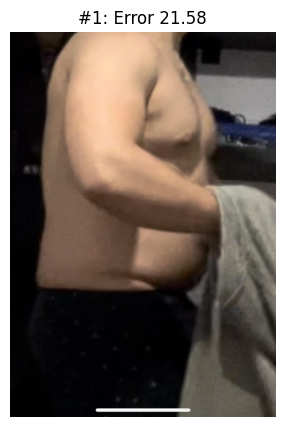

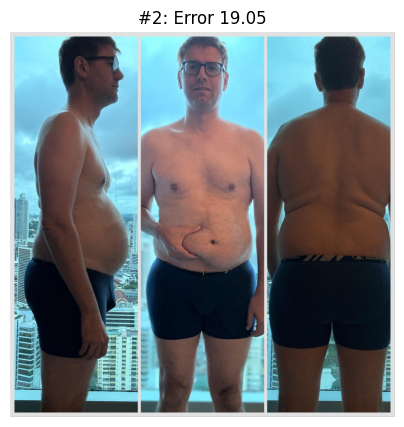

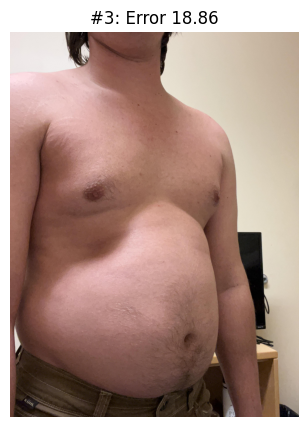

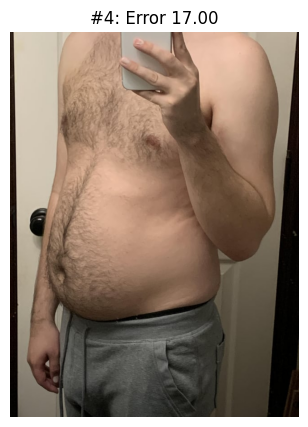

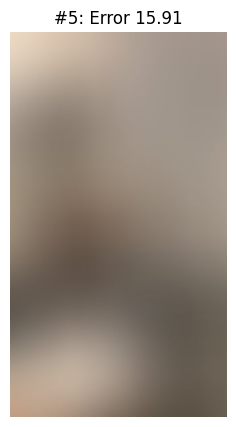

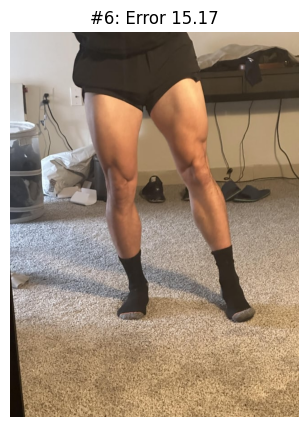

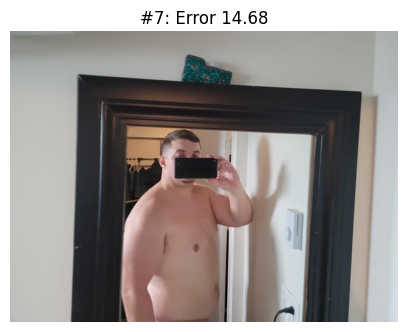

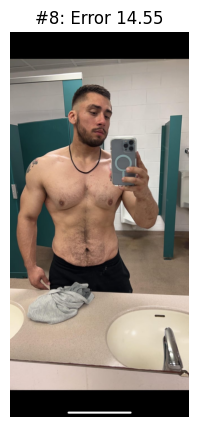

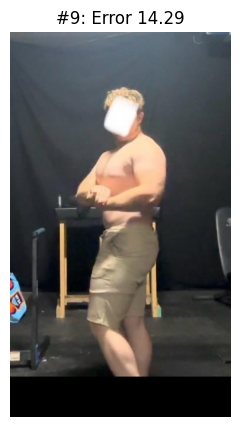

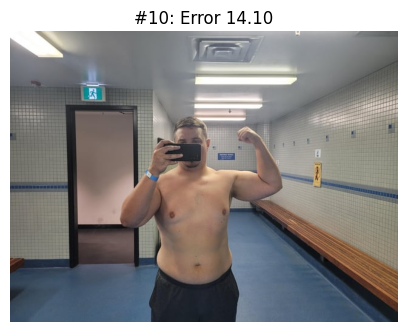

In [91]:
errors = []

pbar = tqdm(df.iterrows(), total=len(df), desc="Processing images", leave=True)

for i, row in pbar:
    try:
        img_path = f"{row['filename']}"  # change if your image path differs
        img = PILImage.create('images/' + img_path)
        bf, _, probs = learn.predict(img)
        pred = float(probs[0])
        actual = float(row['target'])
        error = abs(pred - actual)

        errors.append({
            "img_path": img_path,
            "img": img,
            "actual": actual,
            "pred": pred,
            "error": error
        })

        # Optionally update progress bar postfix
        pbar.set_postfix({"last_error": f"{error:.2f}"})

    except Exception as e:
        pbar.write(f"Skipping {row['filename']} due to error: {e}")

# Sort and show top 10 worst predictions
top_errors = sorted(errors, key=lambda x: x['error'], reverse=True)[:10]

for idx, item in enumerate(top_errors):
    print(f"\n#{idx+1}")
    print(f"File: {item['img_path']}")
    print(f"Predicted: {item['pred']:.2f}")
    print(f"Actual: {item['actual']:.2f}")
    print(f"Error: {item['error']:.2f}")
    show_image(item['img'], title=f"#{idx+1}: Error {item['error']:.2f}")
